# Importing Libraries

In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Datasets

In [250]:
df=pd.read_excel("Data_Train.xlsx")
df1=pd.read_excel("Data_Test.xlsx")

# Analysis, Data Cleaning and Feature Engineering

In [252]:
#Preliminary Analysis
df1.head()
df.isna().sum()

In [253]:
#Splitting the name of the car
lol=df["Name"].str.split(" ",n=2,expand=True)
lol1=df1["Name"].str.split(" ",n=2,expand=True)

In [254]:
#Splitting the name of the company
df["Company"]=lol[0]
df1["Company"]=lol1[0]

In [255]:
df["Car"]=lol[1]
df1["Car"]=lol1[1]

In [215]:
#Cleaning mileage column
import re
mileage=[]
for i, row in df.iterrows():
    mileage.append(float(re.sub('[km/kgpl]', '', str(row["Mileage"]))))
    
mileage1=[]
for i, row in df1.iterrows():
    mileage1.append(float(re.sub('[km/kgpl]', '', str(row["Mileage"]))))

In [216]:
df["Mileage"]=mileage
df1["Mileage"]=mileage1

In [217]:
#Cleaning engine column
import re
engine=[]
for i, row in df.iterrows():
    engine.append(float(re.sub('[CC]', '', str(row["Engine"]))))
    
engine1=[]
for i, row in df1.iterrows():
    engine1.append(float(re.sub('[CC]', '', str(row["Engine"]))))

In [218]:
df["Engine"]=engine
df1["Engine"]=engine1

In [219]:
df.drop("New_Price",axis=1,inplace=True)
df1.drop("New_Price",axis=1,inplace=True)

In [220]:
df["Power"].replace("null bhp",np.nan,inplace=True)
df1["Power"].replace("null bhp",np.nan,inplace=True)

In [221]:
#Cleaning power column
import re
power=[]
for i, row in df.iterrows():
    power.append(float(re.sub('[bhp]', '', str(row["Power"]))))
    
power1=[]
for i, row in df1.iterrows():
    power1.append(float(re.sub('[bhp]', '', str(row["Power"]))))

In [222]:
df["Power"]=power
df1["Power"]=power1

In [223]:
df.drop(["Name"],axis=1,inplace=True)
df1.drop(["Name"],axis=1,inplace=True)

In [224]:
columns=[cols for cols in df.select_dtypes(include=['O']).columns]

In [225]:
#Creating seperate columns to indicate missing values
df["EngineNA"]=df["Engine"].isna()
df["PowerNA"]=df["Power"].isna()
df['SeatsNA']=df["Seats"].isna()

df1["EngineNA"]=df1["Engine"].isna()
df1["PowerNA"]=df1["Power"].isna()
df1['SeatsNA']=df1["Seats"].isna()

In [227]:
# Analysis
df1.loc[(df1.Company=="Hindustan"),"Company"]="Hyundai"
df1.loc[(df1.Company=="OpelCorsa"),"Company"]="Maruti"

In [229]:
df1.loc[(df1.Car=='1.4Gsi') | (df1.Car=='370Z') | (df1.Car=='Abarth') | (df1.Car=='Flying') | (df1.Car=='Land') | (df1.Car=='MU') | (df1.Car=='Motors'),"Car"]="i20"

In [230]:
# Encoding Car column
groupbycarmean=df.groupby('Car')['Price'].mean()
df['Carmean']=df['Car'].map(groupbycarmean)
df1['Carmean']=df1['Car'].map(groupbycarmean)

groupbycarmax=df.groupby('Car')['Price'].max()
df['Carmax']=df['Car'].map(groupbycarmax)
df1['Carmax']=df1['Car'].map(groupbycarmax)

groupbycarmin=df.groupby('Car')['Price'].min()
df['Carmin']=df['Car'].map(groupbycarmin)
df1['Carmin']=df1['Car'].map(groupbycarmin)

groupbycarstd=df.groupby('Car')['Price'].std()
df['Carstd']=df['Car'].map(groupbycarstd)
df1['Carstd']=df1['Car'].map(groupbycarstd)

In [231]:
#Encoding company column
groupbycompanymean=df.groupby('Company')['Price'].mean()
df['Companymean']=df['Company'].map(groupbycompanymean)
df1['Companymean']=df1['Company'].map(groupbycompanymean)

groupbycompanymax=df.groupby('Company')['Price'].max()
df['Companymax']=df['Company'].map(groupbycompanymax)
df1['Companymax']=df1['Company'].map(groupbycompanymax)

groupbycompanymin=df.groupby('Car')['Price'].min()
df['Companymin']=df['Car'].map(groupbycompanymin)
df1['Companymin']=df1['Car'].map(groupbycompanymin)

groupbycompanystd=df.groupby('Car')['Price'].std()
df['Companystd']=df['Car'].map(groupbycompanystd)
df1['Companystd']=df1['Car'].map(groupbycompanystd)

In [232]:
#Encoding company column, not used in final
#groupbycompanymean=df.groupby('Power')['Price'].mean()
#df['Powermean']=df['Power'].map(groupbycompanymean)
#df1['Powermean']=df1['Power'].map(groupbycompanymean)

#groupbycompanymax=df.groupby('Power')['Price'].max()
#df['Powermax']=df['Power'].map(groupbycompanymax)
#df1['Powermax']=df1['Power'].map(groupbycompanymax)

#groupbycompanymin=df.groupby('Power')['Price'].min()
#df['Powermin']=df['Power'].map(groupbycompanymin)
#df1['Powermin']=df1['Power'].map(groupbycompanymin)

#groupbycompanystd=df.groupby('Power')['Price'].std()
#df['Powerstd']=df['Power'].map(groupbycompanystd)
#df1['Powerstd']=df1['Power'].map(groupbycompanystd)

In [233]:
#Calculating age of the car
df["Age"]=2019-df["Year"]
df1["Age"]=2019-df1["Year"]

In [234]:
#Feature Engineering
df["AgeDis"]=df["Kilometers_Driven"]/df["Age"]
df1['AgeDis']=df1["Kilometers_Driven"]/df1["Age"]

In [235]:
#lol=df.groupby(["Car","Company",'Location',"Year"])["Price"].count()
#lol1=pd.DataFrame(lol).reset_index()
#lol1.rename(columns={'Price': 'Demand'}, inplace=True)

In [236]:
#lol2=df.groupby(["Car","Company",'Location',"Year"])["Price"].mean()
#lol3=pd.DataFrame(lol2).reset_index()
#lol3.rename(columns={'Price': 'Pricedemand'}, inplace=True)

In [237]:
#df=pd.merge(df,lol1,on=["Car","Company",'Location',"Year"],how="left")
#df1=pd.merge(df1,lol1,on=["Car","Company",'Location',"Year"],how="left")

#df=pd.merge(df,lol3,on=["Car","Company",'Location',"Year"],how="left")
#df1=pd.merge(df1,lol3,on=["Car","Company",'Location',"Year"],how="left")

In [238]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
for c in columns:
    lbl=LabelEncoder()
    lbl.fit(list(df[c].values))
    df[c]=lbl.transform(list(df[c].values))
    df1[c]=lbl.transform(list(df1[c].values))

# Hyperparameter tuning and Modelling

In [239]:
#Splitting the dataset
X=df.drop("Price",axis=1)
y=df["Price"]

In [240]:
#Hyperparameter tuning for LightGBM
import lightgbm as lgb
import gc
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, StratifiedKFold

roc_auc_mean = []
roc_auc_std = []
dict_list = []

from random import choice
skf = KFold(n_splits=5)
skf.get_n_splits(X, y)
n_iterations=7

for i in range(0, n_iterations):
    skf_split = skf.split(X, y)
    param_dist = {'num_leaves': choice([5, 15, 27, 31, 61, 81, 127, 197, 231]),
              'bagging_fraction': choice([0.5, 0.7, 0.8, 0.9]),
              'learning_rate': choice([0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5]),
              'min_data': choice([300, 400, 450, 500, 550, 650]),
              'is_unbalance': choice([True, False]),
              'max_bin': choice([3, 5, 10, 12, 18, 20, 22]),
              'boosting_type' : choice(['gbdt', 'dart']),
              'bagging_freq': choice([3, 9, 11, 15, 17, 23, 31]),
              'max_depth': choice([3, 4, 5, 6, 7, 9, 11]),       
              'feature_fraction': choice([0.5, 0.7, 0.8, 0.9]),
              'lambda_l1': choice([0, 10, 20, 30, 40]),
              'objective': 'regression_l2', 
              'metric': 'l2'} 
    
    
    
    roc_l = []
    print ("Cycle {}...".format(i+1))
    for train_index, test_index in skf_split:
    
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]
    
        X_val = X.iloc[test_index]
        y_val = y.iloc[test_index]
    
        # training
        lgb_train = lgb.Dataset(X_train, y_train, free_raw_data=True)
        lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train, free_raw_data=True)
    
        gbm = lgb.train(param_dist,
                        lgb_train,
                        num_boost_round = 15000,
                        valid_sets = lgb_val,
                        early_stopping_rounds=400,
                        verbose_eval=5)
        # predicting
        y_pred = gbm.predict(X_val, num_iteration=gbm.best_iteration)
        
        roc = mean_squared_error(y_val, y_pred)
        roc_l.append(roc)

    
    roc_array = np.asarray(roc_l)
    
    roc_auc_mean.append(roc_array.mean())
    roc_auc_std.append(roc_array.std())
    dict_list.append(param_dist)
    gc.collect()

results_pd = pd.DataFrame({
                           "roc_auc_mean": roc_auc_mean,
                           "roc_auc_std": roc_auc_std,
                           "parameters": dict_list})

Cycle 1...
Training until validation scores don't improve for 400 rounds.
[5]	valid_0's l2: 91.6944
[10]	valid_0's l2: 77.4727
[15]	valid_0's l2: 68.189
[20]	valid_0's l2: 60.9425
[25]	valid_0's l2: 57.5939
[30]	valid_0's l2: 54.8271
[35]	valid_0's l2: 53.519
[40]	valid_0's l2: 52.6377
[45]	valid_0's l2: 51.9181
[50]	valid_0's l2: 54.5807
[55]	valid_0's l2: 52.3014
[60]	valid_0's l2: 55.2005
[65]	valid_0's l2: 57.0404
[70]	valid_0's l2: 53.8631
[75]	valid_0's l2: 51.8081
[80]	valid_0's l2: 51.355
[85]	valid_0's l2: 52.2788
[90]	valid_0's l2: 52.13
[95]	valid_0's l2: 53.5571
[100]	valid_0's l2: 51.8035
[105]	valid_0's l2: 54.6722
[110]	valid_0's l2: 55.0763
[115]	valid_0's l2: 50.5532
[120]	valid_0's l2: 50.3287
[125]	valid_0's l2: 50.0978
[130]	valid_0's l2: 49.039
[135]	valid_0's l2: 48.7846
[140]	valid_0's l2: 49.4837
[145]	valid_0's l2: 49.1572
[150]	valid_0's l2: 48.3861
[155]	valid_0's l2: 48.9415
[160]	valid_0's l2: 50.475
[165]	valid_0's l2: 48.1502
[170]	valid_0's l2: 46.1578
[

[1450]	valid_0's l2: 29.5712
[1455]	valid_0's l2: 29.5769
[1460]	valid_0's l2: 29.5344
[1465]	valid_0's l2: 29.5313
[1470]	valid_0's l2: 29.5353
[1475]	valid_0's l2: 29.6075
[1480]	valid_0's l2: 29.5211
[1485]	valid_0's l2: 29.4285
[1490]	valid_0's l2: 29.5143
[1495]	valid_0's l2: 29.5239
[1500]	valid_0's l2: 29.5393
[1505]	valid_0's l2: 29.5887
[1510]	valid_0's l2: 29.6334
[1515]	valid_0's l2: 29.5841
[1520]	valid_0's l2: 29.5829
[1525]	valid_0's l2: 29.5463
[1530]	valid_0's l2: 29.5259
[1535]	valid_0's l2: 29.4892
[1540]	valid_0's l2: 29.5133
[1545]	valid_0's l2: 29.4314
[1550]	valid_0's l2: 29.3761
[1555]	valid_0's l2: 29.3714
[1560]	valid_0's l2: 29.4308
[1565]	valid_0's l2: 29.4784
[1570]	valid_0's l2: 29.5259
[1575]	valid_0's l2: 29.4623
[1580]	valid_0's l2: 29.407
[1585]	valid_0's l2: 29.3094
[1590]	valid_0's l2: 29.2626
[1595]	valid_0's l2: 29.2634
[1600]	valid_0's l2: 29.0971
[1605]	valid_0's l2: 29.0208
[1610]	valid_0's l2: 28.9935
[1615]	valid_0's l2: 28.9817
[1620]	valid_0'

[155]	valid_0's l2: 55.583
[160]	valid_0's l2: 56.9906
[165]	valid_0's l2: 55.1037
[170]	valid_0's l2: 53.7564
[175]	valid_0's l2: 52.5382
[180]	valid_0's l2: 52.9841
[185]	valid_0's l2: 51.7861
[190]	valid_0's l2: 51.5205
[195]	valid_0's l2: 50.9732
[200]	valid_0's l2: 50.9488
[205]	valid_0's l2: 51.5803
[210]	valid_0's l2: 51.6157
[215]	valid_0's l2: 50.9188
[220]	valid_0's l2: 50.833
[225]	valid_0's l2: 50.9559
[230]	valid_0's l2: 50.9312
[235]	valid_0's l2: 50.6669
[240]	valid_0's l2: 50.012
[245]	valid_0's l2: 50.1786
[250]	valid_0's l2: 49.2975
[255]	valid_0's l2: 48.8846
[260]	valid_0's l2: 48.6697
[265]	valid_0's l2: 48.2381
[270]	valid_0's l2: 48.1094
[275]	valid_0's l2: 47.9562
[280]	valid_0's l2: 47.9875
[285]	valid_0's l2: 47.6195
[290]	valid_0's l2: 47.0805
[295]	valid_0's l2: 47.1747
[300]	valid_0's l2: 47.2022
[305]	valid_0's l2: 47.5445
[310]	valid_0's l2: 47.5821
[315]	valid_0's l2: 47.3563
[320]	valid_0's l2: 46.7901
[325]	valid_0's l2: 46.4961
[330]	valid_0's l2: 46.

[1620]	valid_0's l2: 35.9026
[1625]	valid_0's l2: 35.8126
[1630]	valid_0's l2: 35.7675
[1635]	valid_0's l2: 35.7732
[1640]	valid_0's l2: 35.6083
[1645]	valid_0's l2: 35.6718
[1650]	valid_0's l2: 35.6901
[1655]	valid_0's l2: 35.6891
[1660]	valid_0's l2: 35.6779
[1665]	valid_0's l2: 35.6094
[1670]	valid_0's l2: 35.6145
[1675]	valid_0's l2: 35.6093
[1680]	valid_0's l2: 35.5432
[1685]	valid_0's l2: 35.5734
[1690]	valid_0's l2: 35.5078
[1695]	valid_0's l2: 35.4709
[1700]	valid_0's l2: 35.5304
[1705]	valid_0's l2: 35.5089
[1710]	valid_0's l2: 35.5203
[1715]	valid_0's l2: 35.4619
[1720]	valid_0's l2: 35.437
[1725]	valid_0's l2: 35.3841
[1730]	valid_0's l2: 35.3528
[1735]	valid_0's l2: 35.3871
[1740]	valid_0's l2: 35.3347
[1745]	valid_0's l2: 35.2667
[1750]	valid_0's l2: 35.2563
[1755]	valid_0's l2: 35.2468
[1760]	valid_0's l2: 35.2883
[1765]	valid_0's l2: 35.325
[1770]	valid_0's l2: 35.3166
[1775]	valid_0's l2: 35.3516
[1780]	valid_0's l2: 35.3217
[1785]	valid_0's l2: 35.3158
[1790]	valid_0's

[3085]	valid_0's l2: 32.778
[3090]	valid_0's l2: 32.7645
[3095]	valid_0's l2: 32.7649
[3100]	valid_0's l2: 32.7431
[3105]	valid_0's l2: 32.7166
[3110]	valid_0's l2: 32.72
[3115]	valid_0's l2: 32.7391
[3120]	valid_0's l2: 32.7582
[3125]	valid_0's l2: 32.7376
[3130]	valid_0's l2: 32.7258
[3135]	valid_0's l2: 32.6893
[3140]	valid_0's l2: 32.6817
[3145]	valid_0's l2: 32.6749
[3150]	valid_0's l2: 32.647
[3155]	valid_0's l2: 32.6501
[3160]	valid_0's l2: 32.6705
[3165]	valid_0's l2: 32.7079
[3170]	valid_0's l2: 32.7379
[3175]	valid_0's l2: 32.7331
[3180]	valid_0's l2: 32.7447
[3185]	valid_0's l2: 32.7207
[3190]	valid_0's l2: 32.6905
[3195]	valid_0's l2: 32.6846
[3200]	valid_0's l2: 32.6798
[3205]	valid_0's l2: 32.6559
[3210]	valid_0's l2: 32.6437
[3215]	valid_0's l2: 32.6598
[3220]	valid_0's l2: 32.6767
[3225]	valid_0's l2: 32.6374
[3230]	valid_0's l2: 32.6497
[3235]	valid_0's l2: 32.6257
[3240]	valid_0's l2: 32.6275
[3245]	valid_0's l2: 32.5998
[3250]	valid_0's l2: 32.5923
[3255]	valid_0's l

[460]	valid_0's l2: 31.2829
[465]	valid_0's l2: 31.0417
[470]	valid_0's l2: 30.9945
[475]	valid_0's l2: 30.7668
[480]	valid_0's l2: 30.8141
[485]	valid_0's l2: 30.6936
[490]	valid_0's l2: 30.595
[495]	valid_0's l2: 30.5882
[500]	valid_0's l2: 30.5148
[505]	valid_0's l2: 30.5349
[510]	valid_0's l2: 30.2564
[515]	valid_0's l2: 30.1083
[520]	valid_0's l2: 30.195
[525]	valid_0's l2: 30.2918
[530]	valid_0's l2: 30.1943
[535]	valid_0's l2: 30.1702
[540]	valid_0's l2: 30.1995
[545]	valid_0's l2: 30.2483
[550]	valid_0's l2: 30.1294
[555]	valid_0's l2: 30.0616
[560]	valid_0's l2: 30.0094
[565]	valid_0's l2: 30.0724
[570]	valid_0's l2: 30.0569
[575]	valid_0's l2: 29.9313
[580]	valid_0's l2: 30.054
[585]	valid_0's l2: 29.9425
[590]	valid_0's l2: 29.9479
[595]	valid_0's l2: 29.9846
[600]	valid_0's l2: 29.8886
[605]	valid_0's l2: 29.8925
[610]	valid_0's l2: 29.8306
[615]	valid_0's l2: 29.6993
[620]	valid_0's l2: 29.5764
[625]	valid_0's l2: 29.6092
[630]	valid_0's l2: 29.549
[635]	valid_0's l2: 29.4

[1925]	valid_0's l2: 24.9904
[1930]	valid_0's l2: 24.9633
[1935]	valid_0's l2: 24.9767
[1940]	valid_0's l2: 24.9289
[1945]	valid_0's l2: 24.9333
[1950]	valid_0's l2: 24.9035
[1955]	valid_0's l2: 24.8261
[1960]	valid_0's l2: 24.8325
[1965]	valid_0's l2: 24.8211
[1970]	valid_0's l2: 24.8165
[1975]	valid_0's l2: 24.7758
[1980]	valid_0's l2: 24.7545
[1985]	valid_0's l2: 24.7271
[1990]	valid_0's l2: 24.7108
[1995]	valid_0's l2: 24.6692
[2000]	valid_0's l2: 24.6639
[2005]	valid_0's l2: 24.6807
[2010]	valid_0's l2: 24.6723
[2015]	valid_0's l2: 24.6381
[2020]	valid_0's l2: 24.6015
[2025]	valid_0's l2: 24.5999
[2030]	valid_0's l2: 24.6083
[2035]	valid_0's l2: 24.5945
[2040]	valid_0's l2: 24.575
[2045]	valid_0's l2: 24.5918
[2050]	valid_0's l2: 24.6113
[2055]	valid_0's l2: 24.6792
[2060]	valid_0's l2: 24.6725
[2065]	valid_0's l2: 24.6836
[2070]	valid_0's l2: 24.6817
[2075]	valid_0's l2: 24.6382
[2080]	valid_0's l2: 24.5752
[2085]	valid_0's l2: 24.5499
[2090]	valid_0's l2: 24.5498
[2095]	valid_0'

[3405]	valid_0's l2: 23.3715
[3410]	valid_0's l2: 23.3677
[3415]	valid_0's l2: 23.3628
[3420]	valid_0's l2: 23.3595
[3425]	valid_0's l2: 23.3124
[3430]	valid_0's l2: 23.3033
[3435]	valid_0's l2: 23.3118
[3440]	valid_0's l2: 23.3068
[3445]	valid_0's l2: 23.3312
[3450]	valid_0's l2: 23.3421
[3455]	valid_0's l2: 23.3573
[3460]	valid_0's l2: 23.3709
[3465]	valid_0's l2: 23.3831
[3470]	valid_0's l2: 23.3637
[3475]	valid_0's l2: 23.3459
[3480]	valid_0's l2: 23.337
[3485]	valid_0's l2: 23.3217
[3490]	valid_0's l2: 23.3414
[3495]	valid_0's l2: 23.338
[3500]	valid_0's l2: 23.3446
[3505]	valid_0's l2: 23.3347
[3510]	valid_0's l2: 23.3182
[3515]	valid_0's l2: 23.3162
[3520]	valid_0's l2: 23.3316
[3525]	valid_0's l2: 23.2661
[3530]	valid_0's l2: 23.2668
[3535]	valid_0's l2: 23.279
[3540]	valid_0's l2: 23.2829
[3545]	valid_0's l2: 23.2637
[3550]	valid_0's l2: 23.2444
[3555]	valid_0's l2: 23.216
[3560]	valid_0's l2: 23.1954
[3565]	valid_0's l2: 23.1788
[3570]	valid_0's l2: 23.1795
[3575]	valid_0's l

[4835]	valid_0's l2: 22.7719
[4840]	valid_0's l2: 22.7834
[4845]	valid_0's l2: 22.7949
[4850]	valid_0's l2: 22.8446
[4855]	valid_0's l2: 22.8447
[4860]	valid_0's l2: 22.9876
[4865]	valid_0's l2: 23.0476
[4870]	valid_0's l2: 23.0713
[4875]	valid_0's l2: 23.1387
[4880]	valid_0's l2: 23.1665
[4885]	valid_0's l2: 23.1968
[4890]	valid_0's l2: 23.2404
[4895]	valid_0's l2: 23.3489
[4900]	valid_0's l2: 23.3712
[4905]	valid_0's l2: 23.3826
[4910]	valid_0's l2: 23.4031
[4915]	valid_0's l2: 23.4085
[4920]	valid_0's l2: 23.4253
[4925]	valid_0's l2: 23.4411
[4930]	valid_0's l2: 23.4334
[4935]	valid_0's l2: 23.464
[4940]	valid_0's l2: 23.4782
[4945]	valid_0's l2: 23.503
[4950]	valid_0's l2: 23.5341
[4955]	valid_0's l2: 23.5094
[4960]	valid_0's l2: 23.474
[4965]	valid_0's l2: 23.444
[4970]	valid_0's l2: 23.4377
[4975]	valid_0's l2: 23.3979
[4980]	valid_0's l2: 23.3325
[4985]	valid_0's l2: 23.2925
[4990]	valid_0's l2: 23.2661
[4995]	valid_0's l2: 23.2555
[5000]	valid_0's l2: 23.266
[5005]	valid_0's l2

[1280]	valid_0's l2: 36.0926
[1285]	valid_0's l2: 36.0659
[1290]	valid_0's l2: 36.1083
[1295]	valid_0's l2: 36.1259
[1300]	valid_0's l2: 36.1498
[1305]	valid_0's l2: 36.0991
[1310]	valid_0's l2: 36.0771
[1315]	valid_0's l2: 36.0809
[1320]	valid_0's l2: 36.0595
[1325]	valid_0's l2: 36.0307
[1330]	valid_0's l2: 36.0681
[1335]	valid_0's l2: 36.0126
[1340]	valid_0's l2: 36.0093
[1345]	valid_0's l2: 35.9991
[1350]	valid_0's l2: 35.9747
[1355]	valid_0's l2: 36.0052
[1360]	valid_0's l2: 36.0013
[1365]	valid_0's l2: 35.9911
[1370]	valid_0's l2: 35.8516
[1375]	valid_0's l2: 35.8041
[1380]	valid_0's l2: 35.7417
[1385]	valid_0's l2: 35.7449
[1390]	valid_0's l2: 35.7306
[1395]	valid_0's l2: 35.749
[1400]	valid_0's l2: 35.7308
[1405]	valid_0's l2: 35.6794
[1410]	valid_0's l2: 35.6468
[1415]	valid_0's l2: 35.6413
[1420]	valid_0's l2: 35.6405
[1425]	valid_0's l2: 35.6603
[1430]	valid_0's l2: 35.685
[1435]	valid_0's l2: 35.7118
[1440]	valid_0's l2: 35.7457
[1445]	valid_0's l2: 35.6765
[1450]	valid_0's

[2710]	valid_0's l2: 32.6425
[2715]	valid_0's l2: 32.6178
[2720]	valid_0's l2: 32.5792
[2725]	valid_0's l2: 32.558
[2730]	valid_0's l2: 32.5232
[2735]	valid_0's l2: 32.4864
[2740]	valid_0's l2: 32.4827
[2745]	valid_0's l2: 32.5173
[2750]	valid_0's l2: 32.4977
[2755]	valid_0's l2: 32.4993
[2760]	valid_0's l2: 32.5139
[2765]	valid_0's l2: 32.515
[2770]	valid_0's l2: 32.5166
[2775]	valid_0's l2: 32.4994
[2780]	valid_0's l2: 32.4783
[2785]	valid_0's l2: 32.46
[2790]	valid_0's l2: 32.4178
[2795]	valid_0's l2: 32.3332
[2800]	valid_0's l2: 32.3335
[2805]	valid_0's l2: 32.3329
[2810]	valid_0's l2: 32.3589
[2815]	valid_0's l2: 32.3721
[2820]	valid_0's l2: 32.36
[2825]	valid_0's l2: 32.36
[2830]	valid_0's l2: 32.3677
[2835]	valid_0's l2: 32.3464
[2840]	valid_0's l2: 32.3455
[2845]	valid_0's l2: 32.3767
[2850]	valid_0's l2: 32.3202
[2855]	valid_0's l2: 32.2081
[2860]	valid_0's l2: 32.1837
[2865]	valid_0's l2: 32.121
[2870]	valid_0's l2: 32.0941
[2875]	valid_0's l2: 32.1351
[2880]	valid_0's l2: 32

[4155]	valid_0's l2: 30.9306
[4160]	valid_0's l2: 30.8979
[4165]	valid_0's l2: 30.8627
[4170]	valid_0's l2: 30.8683
[4175]	valid_0's l2: 30.8743
[4180]	valid_0's l2: 30.8886
[4185]	valid_0's l2: 30.8659
[4190]	valid_0's l2: 30.8546
[4195]	valid_0's l2: 30.8633
[4200]	valid_0's l2: 30.8627
[4205]	valid_0's l2: 30.8447
[4210]	valid_0's l2: 30.8332
[4215]	valid_0's l2: 30.8088
[4220]	valid_0's l2: 30.7863
[4225]	valid_0's l2: 30.7763
[4230]	valid_0's l2: 30.7993
[4235]	valid_0's l2: 30.8058
[4240]	valid_0's l2: 30.7633
[4245]	valid_0's l2: 30.7475
[4250]	valid_0's l2: 30.7315
[4255]	valid_0's l2: 30.7388
[4260]	valid_0's l2: 30.6687
[4265]	valid_0's l2: 30.6219
[4270]	valid_0's l2: 30.6516
[4275]	valid_0's l2: 30.6514
[4280]	valid_0's l2: 30.7355
[4285]	valid_0's l2: 30.7996
[4290]	valid_0's l2: 30.7783
[4295]	valid_0's l2: 30.7825
[4300]	valid_0's l2: 30.8045
[4305]	valid_0's l2: 30.7642
[4310]	valid_0's l2: 30.7455
[4315]	valid_0's l2: 30.7303
[4320]	valid_0's l2: 30.7092
[4325]	valid_0

[155]	valid_0's l2: 56.3252
[160]	valid_0's l2: 57.7365
[165]	valid_0's l2: 56.2425
[170]	valid_0's l2: 54.8621
[175]	valid_0's l2: 53.3735
[180]	valid_0's l2: 53.7619
[185]	valid_0's l2: 52.7706
[190]	valid_0's l2: 52.4932
[195]	valid_0's l2: 51.8977
[200]	valid_0's l2: 52.0818
[205]	valid_0's l2: 52.6896
[210]	valid_0's l2: 52.646
[215]	valid_0's l2: 51.7098
[220]	valid_0's l2: 51.4706
[225]	valid_0's l2: 51.5912
[230]	valid_0's l2: 51.534
[235]	valid_0's l2: 51.3795
[240]	valid_0's l2: 50.5092
[245]	valid_0's l2: 50.5388
[250]	valid_0's l2: 50.1683
[255]	valid_0's l2: 49.99
[260]	valid_0's l2: 49.936
[265]	valid_0's l2: 49.47
[270]	valid_0's l2: 49.3178
[275]	valid_0's l2: 49.1357
[280]	valid_0's l2: 49.1519
[285]	valid_0's l2: 49.0245
[290]	valid_0's l2: 48.0908
[295]	valid_0's l2: 48.156
[300]	valid_0's l2: 48.1019
[305]	valid_0's l2: 48.4999
[310]	valid_0's l2: 48.6484
[315]	valid_0's l2: 48.7694
[320]	valid_0's l2: 48.0572
[325]	valid_0's l2: 47.7372
[330]	valid_0's l2: 47.6638


[1615]	valid_0's l2: 39.1376
[1620]	valid_0's l2: 39.1497
[1625]	valid_0's l2: 39.0394
[1630]	valid_0's l2: 39.0826
[1635]	valid_0's l2: 39.1468
[1640]	valid_0's l2: 39.0888
[1645]	valid_0's l2: 39.1715
[1650]	valid_0's l2: 39.1576
[1655]	valid_0's l2: 39.1937
[1660]	valid_0's l2: 39.1583
[1665]	valid_0's l2: 38.9446
[1670]	valid_0's l2: 38.8765
[1675]	valid_0's l2: 38.8557
[1680]	valid_0's l2: 38.8838
[1685]	valid_0's l2: 38.8921
[1690]	valid_0's l2: 38.8195
[1695]	valid_0's l2: 38.7923
[1700]	valid_0's l2: 38.8422
[1705]	valid_0's l2: 38.83
[1710]	valid_0's l2: 38.8584
[1715]	valid_0's l2: 38.86
[1720]	valid_0's l2: 38.8625
[1725]	valid_0's l2: 38.884
[1730]	valid_0's l2: 38.8968
[1735]	valid_0's l2: 38.8833
[1740]	valid_0's l2: 38.8296
[1745]	valid_0's l2: 38.7087
[1750]	valid_0's l2: 38.712
[1755]	valid_0's l2: 38.7531
[1760]	valid_0's l2: 38.7929
[1765]	valid_0's l2: 38.8308
[1770]	valid_0's l2: 38.7584
[1775]	valid_0's l2: 38.7383
[1780]	valid_0's l2: 38.6404
[1785]	valid_0's l2:

[3060]	valid_0's l2: 36.5892
[3065]	valid_0's l2: 36.6126
[3070]	valid_0's l2: 36.6512
[3075]	valid_0's l2: 36.6914
[3080]	valid_0's l2: 36.7462
[3085]	valid_0's l2: 36.6879
[3090]	valid_0's l2: 36.6717
[3095]	valid_0's l2: 36.6504
[3100]	valid_0's l2: 36.6283
[3105]	valid_0's l2: 36.5883
[3110]	valid_0's l2: 36.5788
[3115]	valid_0's l2: 36.613
[3120]	valid_0's l2: 36.6377
[3125]	valid_0's l2: 36.6336
[3130]	valid_0's l2: 36.6401
[3135]	valid_0's l2: 36.6206
[3140]	valid_0's l2: 36.642
[3145]	valid_0's l2: 36.6682
[3150]	valid_0's l2: 36.6296
[3155]	valid_0's l2: 36.6208
[3160]	valid_0's l2: 36.6215
[3165]	valid_0's l2: 36.6191
[3170]	valid_0's l2: 36.6549
[3175]	valid_0's l2: 36.7033
[3180]	valid_0's l2: 36.7357
[3185]	valid_0's l2: 36.6555
[3190]	valid_0's l2: 36.552
[3195]	valid_0's l2: 36.5807
[3200]	valid_0's l2: 36.5991
[3205]	valid_0's l2: 36.6131
[3210]	valid_0's l2: 36.5634
[3215]	valid_0's l2: 36.5529
[3220]	valid_0's l2: 36.5539
[3225]	valid_0's l2: 36.5112
[3230]	valid_0's 

[4515]	valid_0's l2: 35.3533
[4520]	valid_0's l2: 35.3847
[4525]	valid_0's l2: 35.4107
[4530]	valid_0's l2: 35.4424
[4535]	valid_0's l2: 35.423
[4540]	valid_0's l2: 35.3801
[4545]	valid_0's l2: 35.3546
[4550]	valid_0's l2: 35.3699
[4555]	valid_0's l2: 35.3768
[4560]	valid_0's l2: 35.3696
[4565]	valid_0's l2: 35.3963
[4570]	valid_0's l2: 35.4114
[4575]	valid_0's l2: 35.4169
[4580]	valid_0's l2: 35.4367
[4585]	valid_0's l2: 35.3271
[4590]	valid_0's l2: 35.2824
[4595]	valid_0's l2: 35.3073
[4600]	valid_0's l2: 35.3034
[4605]	valid_0's l2: 35.3134
[4610]	valid_0's l2: 35.2837
[4615]	valid_0's l2: 35.2345
[4620]	valid_0's l2: 35.1594
[4625]	valid_0's l2: 35.1822
[4630]	valid_0's l2: 35.2304
[4635]	valid_0's l2: 35.1096
[4640]	valid_0's l2: 35.0546
[4645]	valid_0's l2: 35.0351
[4650]	valid_0's l2: 35.0178
[4655]	valid_0's l2: 34.9903
[4660]	valid_0's l2: 35.0074
[4665]	valid_0's l2: 35.0153
[4670]	valid_0's l2: 35.0338
[4675]	valid_0's l2: 35.0556
[4680]	valid_0's l2: 35.1168
[4685]	valid_0'

[5980]	valid_0's l2: 34.3724
[5985]	valid_0's l2: 34.3666
[5990]	valid_0's l2: 34.3775
[5995]	valid_0's l2: 34.3213
[6000]	valid_0's l2: 34.3667
[6005]	valid_0's l2: 34.3964
[6010]	valid_0's l2: 34.4012
[6015]	valid_0's l2: 34.4125
[6020]	valid_0's l2: 34.4231
[6025]	valid_0's l2: 34.4318
[6030]	valid_0's l2: 34.3398
[6035]	valid_0's l2: 34.2803
[6040]	valid_0's l2: 34.2472
[6045]	valid_0's l2: 34.2417
[6050]	valid_0's l2: 34.231
[6055]	valid_0's l2: 34.2706
[6060]	valid_0's l2: 34.2856
[6065]	valid_0's l2: 34.2828
[6070]	valid_0's l2: 34.2826
[6075]	valid_0's l2: 34.2915
[6080]	valid_0's l2: 34.323
[6085]	valid_0's l2: 34.3282
[6090]	valid_0's l2: 34.3297
[6095]	valid_0's l2: 34.3312
[6100]	valid_0's l2: 34.3332
[6105]	valid_0's l2: 34.3363
[6110]	valid_0's l2: 34.3376
[6115]	valid_0's l2: 34.3382
[6120]	valid_0's l2: 34.3019
[6125]	valid_0's l2: 34.2417
[6130]	valid_0's l2: 34.199
[6135]	valid_0's l2: 34.1779
[6140]	valid_0's l2: 34.1714
[6145]	valid_0's l2: 34.2054
[6150]	valid_0's 

[465]	valid_0's l2: 81.3639
[470]	valid_0's l2: 81.6316
[475]	valid_0's l2: 80.6889
[480]	valid_0's l2: 80.6311
[485]	valid_0's l2: 79.7432
[490]	valid_0's l2: 78.9066
[495]	valid_0's l2: 79.0409
[500]	valid_0's l2: 78.2103
[505]	valid_0's l2: 78.3501
[510]	valid_0's l2: 77.0853
[515]	valid_0's l2: 76.3874
[520]	valid_0's l2: 76.896
[525]	valid_0's l2: 77.4245
[530]	valid_0's l2: 76.8369
[535]	valid_0's l2: 76.2155
[540]	valid_0's l2: 76.191
[545]	valid_0's l2: 76.1911
[550]	valid_0's l2: 75.3753
[555]	valid_0's l2: 74.8226
[560]	valid_0's l2: 74.5603
[565]	valid_0's l2: 75.0367
[570]	valid_0's l2: 75.1327
[575]	valid_0's l2: 74.7061
[580]	valid_0's l2: 75.557
[585]	valid_0's l2: 75.1989
[590]	valid_0's l2: 75.6315
[595]	valid_0's l2: 76.0769
[600]	valid_0's l2: 75.7186
[605]	valid_0's l2: 75.6193
[610]	valid_0's l2: 75.2238
[615]	valid_0's l2: 74.4255
[620]	valid_0's l2: 73.7395
[625]	valid_0's l2: 73.9609
[630]	valid_0's l2: 73.6066
[635]	valid_0's l2: 73.2779
[640]	valid_0's l2: 72.

[1935]	valid_0's l2: 53.9396
[1940]	valid_0's l2: 53.8218
[1945]	valid_0's l2: 53.6771
[1950]	valid_0's l2: 53.6232
[1955]	valid_0's l2: 53.6504
[1960]	valid_0's l2: 53.7316
[1965]	valid_0's l2: 53.5667
[1970]	valid_0's l2: 53.5453
[1975]	valid_0's l2: 53.3746
[1980]	valid_0's l2: 53.3434
[1985]	valid_0's l2: 53.3384
[1990]	valid_0's l2: 53.3863
[1995]	valid_0's l2: 53.2494
[2000]	valid_0's l2: 53.1802
[2005]	valid_0's l2: 53.2565
[2010]	valid_0's l2: 53.1499
[2015]	valid_0's l2: 53.0075
[2020]	valid_0's l2: 52.7712
[2025]	valid_0's l2: 52.7203
[2030]	valid_0's l2: 52.7162
[2035]	valid_0's l2: 52.7576
[2040]	valid_0's l2: 52.6555
[2045]	valid_0's l2: 52.6033
[2050]	valid_0's l2: 52.6695
[2055]	valid_0's l2: 52.4453
[2060]	valid_0's l2: 52.5324
[2065]	valid_0's l2: 52.653
[2070]	valid_0's l2: 52.7033
[2075]	valid_0's l2: 52.6187
[2080]	valid_0's l2: 52.4774
[2085]	valid_0's l2: 52.3694
[2090]	valid_0's l2: 52.3019
[2095]	valid_0's l2: 52.3208
[2100]	valid_0's l2: 52.1274
[2105]	valid_0'

[3360]	valid_0's l2: 46.8609
[3365]	valid_0's l2: 46.8451
[3370]	valid_0's l2: 46.8417
[3375]	valid_0's l2: 46.8087
[3380]	valid_0's l2: 46.8007
[3385]	valid_0's l2: 46.8133
[3390]	valid_0's l2: 46.7468
[3395]	valid_0's l2: 46.7583
[3400]	valid_0's l2: 46.7147
[3405]	valid_0's l2: 46.6796
[3410]	valid_0's l2: 46.6838
[3415]	valid_0's l2: 46.6559
[3420]	valid_0's l2: 46.7085
[3425]	valid_0's l2: 46.6936
[3430]	valid_0's l2: 46.717
[3435]	valid_0's l2: 46.7372
[3440]	valid_0's l2: 46.7238
[3445]	valid_0's l2: 46.6814
[3450]	valid_0's l2: 46.6955
[3455]	valid_0's l2: 46.7456
[3460]	valid_0's l2: 46.7393
[3465]	valid_0's l2: 46.733
[3470]	valid_0's l2: 46.7295
[3475]	valid_0's l2: 46.6884
[3480]	valid_0's l2: 46.6926
[3485]	valid_0's l2: 46.6611
[3490]	valid_0's l2: 46.6634
[3495]	valid_0's l2: 46.7014
[3500]	valid_0's l2: 46.7049
[3505]	valid_0's l2: 46.7325
[3510]	valid_0's l2: 46.7171
[3515]	valid_0's l2: 46.6958
[3520]	valid_0's l2: 46.6668
[3525]	valid_0's l2: 46.6156
[3530]	valid_0's

[4795]	valid_0's l2: 44.4009
[4800]	valid_0's l2: 44.3491
[4805]	valid_0's l2: 44.3262
[4810]	valid_0's l2: 44.3618
[4815]	valid_0's l2: 44.355
[4820]	valid_0's l2: 44.3597
[4825]	valid_0's l2: 44.4115
[4830]	valid_0's l2: 44.4292
[4835]	valid_0's l2: 44.4305
[4840]	valid_0's l2: 44.4527
[4845]	valid_0's l2: 44.4287
[4850]	valid_0's l2: 44.4356
[4855]	valid_0's l2: 44.4381
[4860]	valid_0's l2: 44.4283
[4865]	valid_0's l2: 44.4273
[4870]	valid_0's l2: 44.3861
[4875]	valid_0's l2: 44.365
[4880]	valid_0's l2: 44.3439
[4885]	valid_0's l2: 44.3491
[4890]	valid_0's l2: 44.3202
[4895]	valid_0's l2: 44.329
[4900]	valid_0's l2: 44.3122
[4905]	valid_0's l2: 44.2598
[4910]	valid_0's l2: 44.2418
[4915]	valid_0's l2: 44.1933
[4920]	valid_0's l2: 44.183
[4925]	valid_0's l2: 44.1627
[4930]	valid_0's l2: 44.1683
[4935]	valid_0's l2: 44.1737
[4940]	valid_0's l2: 44.175
[4945]	valid_0's l2: 44.1663
[4950]	valid_0's l2: 44.1314
[4955]	valid_0's l2: 44.1615
[4960]	valid_0's l2: 44.143
[4965]	valid_0's l2:

[6270]	valid_0's l2: 42.9385
[6275]	valid_0's l2: 42.9317
[6280]	valid_0's l2: 42.9226
[6285]	valid_0's l2: 42.9154
[6290]	valid_0's l2: 42.9368
[6295]	valid_0's l2: 42.9251
[6300]	valid_0's l2: 42.9319
[6305]	valid_0's l2: 42.935
[6310]	valid_0's l2: 42.9441
[6315]	valid_0's l2: 42.9202
[6320]	valid_0's l2: 42.9188
[6325]	valid_0's l2: 42.8992
[6330]	valid_0's l2: 42.8896
[6335]	valid_0's l2: 42.8865
[6340]	valid_0's l2: 42.8643
[6345]	valid_0's l2: 42.8386
[6350]	valid_0's l2: 42.8316
[6355]	valid_0's l2: 42.8382
[6360]	valid_0's l2: 42.8434
[6365]	valid_0's l2: 42.8385
[6370]	valid_0's l2: 42.85
[6375]	valid_0's l2: 42.8349
[6380]	valid_0's l2: 42.8298
[6385]	valid_0's l2: 42.8238
[6390]	valid_0's l2: 42.8211
[6395]	valid_0's l2: 42.8177
[6400]	valid_0's l2: 42.8066
[6405]	valid_0's l2: 42.8144
[6410]	valid_0's l2: 42.8048
[6415]	valid_0's l2: 42.8023
[6420]	valid_0's l2: 42.782
[6425]	valid_0's l2: 42.7869
[6430]	valid_0's l2: 42.8006
[6435]	valid_0's l2: 42.7988
[6440]	valid_0's l

[7720]	valid_0's l2: 42.3278
[7725]	valid_0's l2: 42.3342
[7730]	valid_0's l2: 42.3356
[7735]	valid_0's l2: 42.3241
[7740]	valid_0's l2: 42.3236
[7745]	valid_0's l2: 42.3289
[7750]	valid_0's l2: 42.3445
[7755]	valid_0's l2: 42.3314
[7760]	valid_0's l2: 42.3201
[7765]	valid_0's l2: 42.3187
[7770]	valid_0's l2: 42.2981
[7775]	valid_0's l2: 42.3033
[7780]	valid_0's l2: 42.2903
[7785]	valid_0's l2: 42.292
[7790]	valid_0's l2: 42.2789
[7795]	valid_0's l2: 42.2907
[7800]	valid_0's l2: 42.2815
[7805]	valid_0's l2: 42.284
[7810]	valid_0's l2: 42.2977
[7815]	valid_0's l2: 42.2975
[7820]	valid_0's l2: 42.3132
[7825]	valid_0's l2: 42.3213
[7830]	valid_0's l2: 42.3321
[7835]	valid_0's l2: 42.3371
[7840]	valid_0's l2: 42.3387
[7845]	valid_0's l2: 42.3337
[7850]	valid_0's l2: 42.3274
[7855]	valid_0's l2: 42.3228
[7860]	valid_0's l2: 42.3265
[7865]	valid_0's l2: 42.3159
[7870]	valid_0's l2: 42.3176
[7875]	valid_0's l2: 42.3171
[7880]	valid_0's l2: 42.3116
[7885]	valid_0's l2: 42.3162
[7890]	valid_0's

[9155]	valid_0's l2: 41.7997
[9160]	valid_0's l2: 41.7987
[9165]	valid_0's l2: 41.7969
[9170]	valid_0's l2: 41.7989
[9175]	valid_0's l2: 41.787
[9180]	valid_0's l2: 41.7769
[9185]	valid_0's l2: 41.7769
[9190]	valid_0's l2: 41.7751
[9195]	valid_0's l2: 41.765
[9200]	valid_0's l2: 41.7613
[9205]	valid_0's l2: 41.7541
[9210]	valid_0's l2: 41.7622
[9215]	valid_0's l2: 41.7556
[9220]	valid_0's l2: 41.7498
[9225]	valid_0's l2: 41.7495
[9230]	valid_0's l2: 41.7584
[9235]	valid_0's l2: 41.7599
[9240]	valid_0's l2: 41.76
[9245]	valid_0's l2: 41.7586
[9250]	valid_0's l2: 41.7531
[9255]	valid_0's l2: 41.7533
[9260]	valid_0's l2: 41.757
[9265]	valid_0's l2: 41.7601
[9270]	valid_0's l2: 41.7562
[9275]	valid_0's l2: 41.7665
[9280]	valid_0's l2: 41.7738
[9285]	valid_0's l2: 41.7829
[9290]	valid_0's l2: 41.7895
[9295]	valid_0's l2: 41.7923
[9300]	valid_0's l2: 41.7948
[9305]	valid_0's l2: 41.7969
[9310]	valid_0's l2: 41.7962
[9315]	valid_0's l2: 41.7849
[9320]	valid_0's l2: 41.7908
[9325]	valid_0's l2

[1185]	valid_0's l2: 67.5314
[1190]	valid_0's l2: 67.5944
[1195]	valid_0's l2: 67.5583
[1200]	valid_0's l2: 67.4467
[1205]	valid_0's l2: 67.2358
[1210]	valid_0's l2: 66.8027
[1215]	valid_0's l2: 66.6062
[1220]	valid_0's l2: 66.3843
[1225]	valid_0's l2: 66.3593
[1230]	valid_0's l2: 66.209
[1235]	valid_0's l2: 66.4628
[1240]	valid_0's l2: 66.3992
[1245]	valid_0's l2: 66.2204
[1250]	valid_0's l2: 66.2246
[1255]	valid_0's l2: 66.084
[1260]	valid_0's l2: 66.0807
[1265]	valid_0's l2: 66.0577
[1270]	valid_0's l2: 66.0896
[1275]	valid_0's l2: 66.0811
[1280]	valid_0's l2: 66.1784
[1285]	valid_0's l2: 66.1958
[1290]	valid_0's l2: 66.4568
[1295]	valid_0's l2: 66.2309
[1300]	valid_0's l2: 65.8531
[1305]	valid_0's l2: 65.7817
[1310]	valid_0's l2: 65.4997
[1315]	valid_0's l2: 65.4638
[1320]	valid_0's l2: 65.5806
[1325]	valid_0's l2: 65.3759
[1330]	valid_0's l2: 65.1204
[1335]	valid_0's l2: 65.0391
[1340]	valid_0's l2: 65.2792
[1345]	valid_0's l2: 65.3877
[1350]	valid_0's l2: 65.315
[1355]	valid_0's 

[2605]	valid_0's l2: 55.7106
[2610]	valid_0's l2: 55.6539
[2615]	valid_0's l2: 55.6739
[2620]	valid_0's l2: 55.655
[2625]	valid_0's l2: 55.604
[2630]	valid_0's l2: 55.5714
[2635]	valid_0's l2: 55.5929
[2640]	valid_0's l2: 55.4998
[2645]	valid_0's l2: 55.4679
[2650]	valid_0's l2: 55.5392
[2655]	valid_0's l2: 55.5404
[2660]	valid_0's l2: 55.4807
[2665]	valid_0's l2: 55.4846
[2670]	valid_0's l2: 55.5851
[2675]	valid_0's l2: 55.5604
[2680]	valid_0's l2: 55.5142
[2685]	valid_0's l2: 55.5036
[2690]	valid_0's l2: 55.4375
[2695]	valid_0's l2: 55.3293
[2700]	valid_0's l2: 55.32
[2705]	valid_0's l2: 55.2805
[2710]	valid_0's l2: 55.2827
[2715]	valid_0's l2: 55.3167
[2720]	valid_0's l2: 55.3113
[2725]	valid_0's l2: 55.3537
[2730]	valid_0's l2: 55.4157
[2735]	valid_0's l2: 55.3717
[2740]	valid_0's l2: 55.443
[2745]	valid_0's l2: 55.3564
[2750]	valid_0's l2: 55.3199
[2755]	valid_0's l2: 55.361
[2760]	valid_0's l2: 55.3789
[2765]	valid_0's l2: 55.4145
[2770]	valid_0's l2: 55.4071
[2775]	valid_0's l2:

[4050]	valid_0's l2: 51.7438
[4055]	valid_0's l2: 51.7584
[4060]	valid_0's l2: 51.7618
[4065]	valid_0's l2: 51.7885
[4070]	valid_0's l2: 51.8196
[4075]	valid_0's l2: 51.7768
[4080]	valid_0's l2: 51.7485
[4085]	valid_0's l2: 51.7572
[4090]	valid_0's l2: 51.7784
[4095]	valid_0's l2: 51.7309
[4100]	valid_0's l2: 51.7538
[4105]	valid_0's l2: 51.7437
[4110]	valid_0's l2: 51.7227
[4115]	valid_0's l2: 51.702
[4120]	valid_0's l2: 51.6881
[4125]	valid_0's l2: 51.6533
[4130]	valid_0's l2: 51.6131
[4135]	valid_0's l2: 51.569
[4140]	valid_0's l2: 51.6055
[4145]	valid_0's l2: 51.6017
[4150]	valid_0's l2: 51.602
[4155]	valid_0's l2: 51.6032
[4160]	valid_0's l2: 51.5948
[4165]	valid_0's l2: 51.5779
[4170]	valid_0's l2: 51.5794
[4175]	valid_0's l2: 51.6015
[4180]	valid_0's l2: 51.5923
[4185]	valid_0's l2: 51.5988
[4190]	valid_0's l2: 51.5974
[4195]	valid_0's l2: 51.5461
[4200]	valid_0's l2: 51.549
[4205]	valid_0's l2: 51.5482
[4210]	valid_0's l2: 51.5647
[4215]	valid_0's l2: 51.511
[4220]	valid_0's l2

[5485]	valid_0's l2: 49.8213
[5490]	valid_0's l2: 49.8072
[5495]	valid_0's l2: 49.8133
[5500]	valid_0's l2: 49.819
[5505]	valid_0's l2: 49.8125
[5510]	valid_0's l2: 49.8337
[5515]	valid_0's l2: 49.8279
[5520]	valid_0's l2: 49.8223
[5525]	valid_0's l2: 49.824
[5530]	valid_0's l2: 49.819
[5535]	valid_0's l2: 49.8318
[5540]	valid_0's l2: 49.8299
[5545]	valid_0's l2: 49.8305
[5550]	valid_0's l2: 49.8381
[5555]	valid_0's l2: 49.802
[5560]	valid_0's l2: 49.7898
[5565]	valid_0's l2: 49.7871
[5570]	valid_0's l2: 49.7805
[5575]	valid_0's l2: 49.7506
[5580]	valid_0's l2: 49.6926
[5585]	valid_0's l2: 49.6944
[5590]	valid_0's l2: 49.6722
[5595]	valid_0's l2: 49.651
[5600]	valid_0's l2: 49.6223
[5605]	valid_0's l2: 49.6139
[5610]	valid_0's l2: 49.6332
[5615]	valid_0's l2: 49.6504
[5620]	valid_0's l2: 49.6576
[5625]	valid_0's l2: 49.6539
[5630]	valid_0's l2: 49.6571
[5635]	valid_0's l2: 49.6612
[5640]	valid_0's l2: 49.6575
[5645]	valid_0's l2: 49.6426
[5650]	valid_0's l2: 49.6382
[5655]	valid_0's l2

[6915]	valid_0's l2: 48.8018
[6920]	valid_0's l2: 48.8123
[6925]	valid_0's l2: 48.8313
[6930]	valid_0's l2: 48.8411
[6935]	valid_0's l2: 48.8328
[6940]	valid_0's l2: 48.8245
[6945]	valid_0's l2: 48.8119
[6950]	valid_0's l2: 48.806
[6955]	valid_0's l2: 48.8118
[6960]	valid_0's l2: 48.8016
[6965]	valid_0's l2: 48.8081
[6970]	valid_0's l2: 48.8024
[6975]	valid_0's l2: 48.7994
[6980]	valid_0's l2: 48.7897
[6985]	valid_0's l2: 48.8056
[6990]	valid_0's l2: 48.7889
[6995]	valid_0's l2: 48.7938
[7000]	valid_0's l2: 48.797
[7005]	valid_0's l2: 48.7934
[7010]	valid_0's l2: 48.7979
[7015]	valid_0's l2: 48.8021
[7020]	valid_0's l2: 48.8144
[7025]	valid_0's l2: 48.8097
[7030]	valid_0's l2: 48.8007
[7035]	valid_0's l2: 48.8044
[7040]	valid_0's l2: 48.8092
[7045]	valid_0's l2: 48.8084
[7050]	valid_0's l2: 48.825
[7055]	valid_0's l2: 48.823
[7060]	valid_0's l2: 48.8248
[7065]	valid_0's l2: 48.8091
[7070]	valid_0's l2: 48.8097
[7075]	valid_0's l2: 48.807
[7080]	valid_0's l2: 48.8133
[7085]	valid_0's l2

[8355]	valid_0's l2: 48.2115
[8360]	valid_0's l2: 48.1927
[8365]	valid_0's l2: 48.1971
[8370]	valid_0's l2: 48.2027
[8375]	valid_0's l2: 48.201
[8380]	valid_0's l2: 48.2101
[8385]	valid_0's l2: 48.2136
[8390]	valid_0's l2: 48.2183
[8395]	valid_0's l2: 48.2093
[8400]	valid_0's l2: 48.2044
[8405]	valid_0's l2: 48.1952
[8410]	valid_0's l2: 48.1955
[8415]	valid_0's l2: 48.1825
[8420]	valid_0's l2: 48.1871
[8425]	valid_0's l2: 48.1973
[8430]	valid_0's l2: 48.2071
[8435]	valid_0's l2: 48.2085
[8440]	valid_0's l2: 48.2091
[8445]	valid_0's l2: 48.2123
[8450]	valid_0's l2: 48.2129
[8455]	valid_0's l2: 48.2079
[8460]	valid_0's l2: 48.2094
[8465]	valid_0's l2: 48.2141
[8470]	valid_0's l2: 48.1955
[8475]	valid_0's l2: 48.2063
[8480]	valid_0's l2: 48.2021
[8485]	valid_0's l2: 48.1971
[8490]	valid_0's l2: 48.2111
[8495]	valid_0's l2: 48.1953
[8500]	valid_0's l2: 48.19
[8505]	valid_0's l2: 48.1791
[8510]	valid_0's l2: 48.1599
[8515]	valid_0's l2: 48.146
[8520]	valid_0's l2: 48.1454
[8525]	valid_0's l

[9805]	valid_0's l2: 47.6366
[9810]	valid_0's l2: 47.6371
[9815]	valid_0's l2: 47.6374
[9820]	valid_0's l2: 47.6355
[9825]	valid_0's l2: 47.6378
[9830]	valid_0's l2: 47.6433
[9835]	valid_0's l2: 47.6468
[9840]	valid_0's l2: 47.6469
[9845]	valid_0's l2: 47.6498
[9850]	valid_0's l2: 47.6505
[9855]	valid_0's l2: 47.6517
[9860]	valid_0's l2: 47.6516
[9865]	valid_0's l2: 47.6512
[9870]	valid_0's l2: 47.6466
[9875]	valid_0's l2: 47.6438
[9880]	valid_0's l2: 47.6399
[9885]	valid_0's l2: 47.6443
[9890]	valid_0's l2: 47.6455
[9895]	valid_0's l2: 47.6362
[9900]	valid_0's l2: 47.6272
[9905]	valid_0's l2: 47.6115
[9910]	valid_0's l2: 47.6109
[9915]	valid_0's l2: 47.6129
[9920]	valid_0's l2: 47.6033
[9925]	valid_0's l2: 47.5827
[9930]	valid_0's l2: 47.5849
[9935]	valid_0's l2: 47.5925
[9940]	valid_0's l2: 47.5826
[9945]	valid_0's l2: 47.5865
[9950]	valid_0's l2: 47.5926
[9955]	valid_0's l2: 47.5881
[9960]	valid_0's l2: 47.5961
[9965]	valid_0's l2: 47.6041
[9970]	valid_0's l2: 47.6004
[9975]	valid_0

[11215]	valid_0's l2: 47.1315
[11220]	valid_0's l2: 47.1313
[11225]	valid_0's l2: 47.13
[11230]	valid_0's l2: 47.1262
[11235]	valid_0's l2: 47.1241
[11240]	valid_0's l2: 47.124
[11245]	valid_0's l2: 47.1258
[11250]	valid_0's l2: 47.1106
[11255]	valid_0's l2: 47.1023
[11260]	valid_0's l2: 47.0939
[11265]	valid_0's l2: 47.0873
[11270]	valid_0's l2: 47.0782
[11275]	valid_0's l2: 47.0806
[11280]	valid_0's l2: 47.0814
[11285]	valid_0's l2: 47.088
[11290]	valid_0's l2: 47.0891
[11295]	valid_0's l2: 47.0889
[11300]	valid_0's l2: 47.0934
[11305]	valid_0's l2: 47.0978
[11310]	valid_0's l2: 47.0937
[11315]	valid_0's l2: 47.097
[11320]	valid_0's l2: 47.0948
[11325]	valid_0's l2: 47.0981
[11330]	valid_0's l2: 47.1017
[11335]	valid_0's l2: 47.1039
[11340]	valid_0's l2: 47.105
[11345]	valid_0's l2: 47.1052
[11350]	valid_0's l2: 47.1098
[11355]	valid_0's l2: 47.1062
[11360]	valid_0's l2: 47.107
[11365]	valid_0's l2: 47.1116
[11370]	valid_0's l2: 47.1067
[11375]	valid_0's l2: 47.1008
[11380]	valid_0's

[12640]	valid_0's l2: 46.87
[12645]	valid_0's l2: 46.8608
[12650]	valid_0's l2: 46.8587
[12655]	valid_0's l2: 46.8625
[12660]	valid_0's l2: 46.8647
[12665]	valid_0's l2: 46.8674
[12670]	valid_0's l2: 46.8715
[12675]	valid_0's l2: 46.8754
[12680]	valid_0's l2: 46.8728
[12685]	valid_0's l2: 46.8772
[12690]	valid_0's l2: 46.8731
[12695]	valid_0's l2: 46.8745
[12700]	valid_0's l2: 46.8817
[12705]	valid_0's l2: 46.8832
[12710]	valid_0's l2: 46.8873
[12715]	valid_0's l2: 46.8902
[12720]	valid_0's l2: 46.8892
[12725]	valid_0's l2: 46.8909
[12730]	valid_0's l2: 46.8883
[12735]	valid_0's l2: 46.8951
[12740]	valid_0's l2: 46.889
[12745]	valid_0's l2: 46.8873
[12750]	valid_0's l2: 46.8909
[12755]	valid_0's l2: 46.8941
[12760]	valid_0's l2: 46.8965
[12765]	valid_0's l2: 46.8998
[12770]	valid_0's l2: 46.8863
[12775]	valid_0's l2: 46.8664
[12780]	valid_0's l2: 46.8604
[12785]	valid_0's l2: 46.8603
[12790]	valid_0's l2: 46.8608
[12795]	valid_0's l2: 46.8645
[12800]	valid_0's l2: 46.8608
[12805]	valid

[14030]	valid_0's l2: 46.4652
[14035]	valid_0's l2: 46.4567
[14040]	valid_0's l2: 46.4447
[14045]	valid_0's l2: 46.4323
[14050]	valid_0's l2: 46.4311
[14055]	valid_0's l2: 46.4275
[14060]	valid_0's l2: 46.4278
[14065]	valid_0's l2: 46.4321
[14070]	valid_0's l2: 46.4342
[14075]	valid_0's l2: 46.436
[14080]	valid_0's l2: 46.435
[14085]	valid_0's l2: 46.4361
[14090]	valid_0's l2: 46.4375
[14095]	valid_0's l2: 46.4369
[14100]	valid_0's l2: 46.4362
[14105]	valid_0's l2: 46.4344
[14110]	valid_0's l2: 46.4273
[14115]	valid_0's l2: 46.4296
[14120]	valid_0's l2: 46.4258
[14125]	valid_0's l2: 46.4239
[14130]	valid_0's l2: 46.425
[14135]	valid_0's l2: 46.4241
[14140]	valid_0's l2: 46.4269
[14145]	valid_0's l2: 46.4241
[14150]	valid_0's l2: 46.426
[14155]	valid_0's l2: 46.4199
[14160]	valid_0's l2: 46.4229
[14165]	valid_0's l2: 46.4261
[14170]	valid_0's l2: 46.427
[14175]	valid_0's l2: 46.4275
[14180]	valid_0's l2: 46.4277
[14185]	valid_0's l2: 46.4279
[14190]	valid_0's l2: 46.4276
[14195]	valid_0

[495]	valid_0's l2: 62.9496
[500]	valid_0's l2: 62.2693
[505]	valid_0's l2: 62.3578
[510]	valid_0's l2: 61.4005
[515]	valid_0's l2: 60.8898
[520]	valid_0's l2: 61.2794
[525]	valid_0's l2: 61.6696
[530]	valid_0's l2: 61.2514
[535]	valid_0's l2: 60.9277
[540]	valid_0's l2: 61.0234
[545]	valid_0's l2: 61.0482
[550]	valid_0's l2: 60.57
[555]	valid_0's l2: 60.2697
[560]	valid_0's l2: 60.0409
[565]	valid_0's l2: 60.428
[570]	valid_0's l2: 60.4934
[575]	valid_0's l2: 60.1358
[580]	valid_0's l2: 60.7748
[585]	valid_0's l2: 60.4645
[590]	valid_0's l2: 60.7872
[595]	valid_0's l2: 61.1182
[600]	valid_0's l2: 60.7692
[605]	valid_0's l2: 60.695
[610]	valid_0's l2: 60.3397
[615]	valid_0's l2: 59.7781
[620]	valid_0's l2: 59.2158
[625]	valid_0's l2: 59.3504
[630]	valid_0's l2: 59.081
[635]	valid_0's l2: 58.7633
[640]	valid_0's l2: 58.5126
[645]	valid_0's l2: 58.4994
[650]	valid_0's l2: 58.2867
[655]	valid_0's l2: 58.214
[660]	valid_0's l2: 57.9053
[665]	valid_0's l2: 58.26
[670]	valid_0's l2: 58.1739


[1970]	valid_0's l2: 43.1175
[1975]	valid_0's l2: 43.052
[1980]	valid_0's l2: 43.0403
[1985]	valid_0's l2: 43.0269
[1990]	valid_0's l2: 43.0554
[1995]	valid_0's l2: 42.9967
[2000]	valid_0's l2: 42.9572
[2005]	valid_0's l2: 42.975
[2010]	valid_0's l2: 42.9059
[2015]	valid_0's l2: 42.7926
[2020]	valid_0's l2: 42.6547
[2025]	valid_0's l2: 42.5997
[2030]	valid_0's l2: 42.5747
[2035]	valid_0's l2: 42.5898
[2040]	valid_0's l2: 42.4999
[2045]	valid_0's l2: 42.4545
[2050]	valid_0's l2: 42.4803
[2055]	valid_0's l2: 42.4061
[2060]	valid_0's l2: 42.4575
[2065]	valid_0's l2: 42.5142
[2070]	valid_0's l2: 42.5492
[2075]	valid_0's l2: 42.522
[2080]	valid_0's l2: 42.4416
[2085]	valid_0's l2: 42.3603
[2090]	valid_0's l2: 42.3114
[2095]	valid_0's l2: 42.3111
[2100]	valid_0's l2: 42.2021
[2105]	valid_0's l2: 42.2051
[2110]	valid_0's l2: 42.2383
[2115]	valid_0's l2: 42.2757
[2120]	valid_0's l2: 42.2378
[2125]	valid_0's l2: 42.252
[2130]	valid_0's l2: 42.2454
[2135]	valid_0's l2: 42.2377
[2140]	valid_0's l

[3425]	valid_0's l2: 38.6935
[3430]	valid_0's l2: 38.6977
[3435]	valid_0's l2: 38.7062
[3440]	valid_0's l2: 38.7026
[3445]	valid_0's l2: 38.6816
[3450]	valid_0's l2: 38.6814
[3455]	valid_0's l2: 38.6932
[3460]	valid_0's l2: 38.69
[3465]	valid_0's l2: 38.6804
[3470]	valid_0's l2: 38.6783
[3475]	valid_0's l2: 38.6593
[3480]	valid_0's l2: 38.6601
[3485]	valid_0's l2: 38.6501
[3490]	valid_0's l2: 38.6523
[3495]	valid_0's l2: 38.661
[3500]	valid_0's l2: 38.6534
[3505]	valid_0's l2: 38.6601
[3510]	valid_0's l2: 38.6482
[3515]	valid_0's l2: 38.6278
[3520]	valid_0's l2: 38.6088
[3525]	valid_0's l2: 38.5853
[3530]	valid_0's l2: 38.5708
[3535]	valid_0's l2: 38.562
[3540]	valid_0's l2: 38.5135
[3545]	valid_0's l2: 38.4996
[3550]	valid_0's l2: 38.4953
[3555]	valid_0's l2: 38.4803
[3560]	valid_0's l2: 38.48
[3565]	valid_0's l2: 38.4787
[3570]	valid_0's l2: 38.4581
[3575]	valid_0's l2: 38.4434
[3580]	valid_0's l2: 38.4391
[3585]	valid_0's l2: 38.4357
[3590]	valid_0's l2: 38.4322
[3595]	valid_0's l2:

[4875]	valid_0's l2: 37.3674
[4880]	valid_0's l2: 37.359
[4885]	valid_0's l2: 37.3574
[4890]	valid_0's l2: 37.3332
[4895]	valid_0's l2: 37.3372
[4900]	valid_0's l2: 37.3315
[4905]	valid_0's l2: 37.3204
[4910]	valid_0's l2: 37.3156
[4915]	valid_0's l2: 37.3064
[4920]	valid_0's l2: 37.3046
[4925]	valid_0's l2: 37.3
[4930]	valid_0's l2: 37.2871
[4935]	valid_0's l2: 37.2815
[4940]	valid_0's l2: 37.2703
[4945]	valid_0's l2: 37.2549
[4950]	valid_0's l2: 37.2473
[4955]	valid_0's l2: 37.2538
[4960]	valid_0's l2: 37.2477
[4965]	valid_0's l2: 37.2432
[4970]	valid_0's l2: 37.2452
[4975]	valid_0's l2: 37.2497
[4980]	valid_0's l2: 37.2334
[4985]	valid_0's l2: 37.2237
[4990]	valid_0's l2: 37.2087
[4995]	valid_0's l2: 37.2104
[5000]	valid_0's l2: 37.2048
[5005]	valid_0's l2: 37.2024
[5010]	valid_0's l2: 37.1985
[5015]	valid_0's l2: 37.2014
[5020]	valid_0's l2: 37.1901
[5025]	valid_0's l2: 37.1935
[5030]	valid_0's l2: 37.1962
[5035]	valid_0's l2: 37.1841
[5040]	valid_0's l2: 37.1858
[5045]	valid_0's l

[6295]	valid_0's l2: 36.4561
[6300]	valid_0's l2: 36.451
[6305]	valid_0's l2: 36.449
[6310]	valid_0's l2: 36.4488
[6315]	valid_0's l2: 36.4451
[6320]	valid_0's l2: 36.4443
[6325]	valid_0's l2: 36.4399
[6330]	valid_0's l2: 36.4435
[6335]	valid_0's l2: 36.4439
[6340]	valid_0's l2: 36.4454
[6345]	valid_0's l2: 36.45
[6350]	valid_0's l2: 36.4523
[6355]	valid_0's l2: 36.4537
[6360]	valid_0's l2: 36.4543
[6365]	valid_0's l2: 36.4564
[6370]	valid_0's l2: 36.4541
[6375]	valid_0's l2: 36.4514
[6380]	valid_0's l2: 36.4543
[6385]	valid_0's l2: 36.4531
[6390]	valid_0's l2: 36.4511
[6395]	valid_0's l2: 36.4502
[6400]	valid_0's l2: 36.4419
[6405]	valid_0's l2: 36.4383
[6410]	valid_0's l2: 36.433
[6415]	valid_0's l2: 36.4251
[6420]	valid_0's l2: 36.4182
[6425]	valid_0's l2: 36.4166
[6430]	valid_0's l2: 36.4172
[6435]	valid_0's l2: 36.4169
[6440]	valid_0's l2: 36.4121
[6445]	valid_0's l2: 36.4142
[6450]	valid_0's l2: 36.4118
[6455]	valid_0's l2: 36.4078
[6460]	valid_0's l2: 36.409
[6465]	valid_0's l2:

[7745]	valid_0's l2: 35.9595
[7750]	valid_0's l2: 35.9597
[7755]	valid_0's l2: 35.958
[7760]	valid_0's l2: 35.9576
[7765]	valid_0's l2: 35.9573
[7770]	valid_0's l2: 35.9571
[7775]	valid_0's l2: 35.9535
[7780]	valid_0's l2: 35.9484
[7785]	valid_0's l2: 35.9486
[7790]	valid_0's l2: 35.9427
[7795]	valid_0's l2: 35.9422
[7800]	valid_0's l2: 35.94
[7805]	valid_0's l2: 35.9334
[7810]	valid_0's l2: 35.9322
[7815]	valid_0's l2: 35.9279
[7820]	valid_0's l2: 35.9275
[7825]	valid_0's l2: 35.9282
[7830]	valid_0's l2: 35.9293
[7835]	valid_0's l2: 35.9309
[7840]	valid_0's l2: 35.9296
[7845]	valid_0's l2: 35.9258
[7850]	valid_0's l2: 35.9233
[7855]	valid_0's l2: 35.9219
[7860]	valid_0's l2: 35.9224
[7865]	valid_0's l2: 35.9238
[7870]	valid_0's l2: 35.9205
[7875]	valid_0's l2: 35.9153
[7880]	valid_0's l2: 35.9115
[7885]	valid_0's l2: 35.911
[7890]	valid_0's l2: 35.9048
[7895]	valid_0's l2: 35.9036
[7900]	valid_0's l2: 35.9004
[7905]	valid_0's l2: 35.8989
[7910]	valid_0's l2: 35.8992
[7915]	valid_0's l

[9175]	valid_0's l2: 35.5856
[9180]	valid_0's l2: 35.5855
[9185]	valid_0's l2: 35.5859
[9190]	valid_0's l2: 35.584
[9195]	valid_0's l2: 35.5812
[9200]	valid_0's l2: 35.5797
[9205]	valid_0's l2: 35.5797
[9210]	valid_0's l2: 35.5814
[9215]	valid_0's l2: 35.5781
[9220]	valid_0's l2: 35.5759
[9225]	valid_0's l2: 35.5746
[9230]	valid_0's l2: 35.5732
[9235]	valid_0's l2: 35.571
[9240]	valid_0's l2: 35.568
[9245]	valid_0's l2: 35.5651
[9250]	valid_0's l2: 35.5634
[9255]	valid_0's l2: 35.5598
[9260]	valid_0's l2: 35.5594
[9265]	valid_0's l2: 35.5599
[9270]	valid_0's l2: 35.5593
[9275]	valid_0's l2: 35.56
[9280]	valid_0's l2: 35.5604
[9285]	valid_0's l2: 35.5584
[9290]	valid_0's l2: 35.5584
[9295]	valid_0's l2: 35.5583
[9300]	valid_0's l2: 35.5571
[9305]	valid_0's l2: 35.5558
[9310]	valid_0's l2: 35.5538
[9315]	valid_0's l2: 35.5505
[9320]	valid_0's l2: 35.5499
[9325]	valid_0's l2: 35.5492
[9330]	valid_0's l2: 35.5478
[9335]	valid_0's l2: 35.5486
[9340]	valid_0's l2: 35.547
[9345]	valid_0's l2:

[10620]	valid_0's l2: 35.2775
[10625]	valid_0's l2: 35.2711
[10630]	valid_0's l2: 35.2649
[10635]	valid_0's l2: 35.2628
[10640]	valid_0's l2: 35.2571
[10645]	valid_0's l2: 35.2574
[10650]	valid_0's l2: 35.2554
[10655]	valid_0's l2: 35.2554
[10660]	valid_0's l2: 35.2539
[10665]	valid_0's l2: 35.2515
[10670]	valid_0's l2: 35.2511
[10675]	valid_0's l2: 35.2506
[10680]	valid_0's l2: 35.2524
[10685]	valid_0's l2: 35.254
[10690]	valid_0's l2: 35.253
[10695]	valid_0's l2: 35.2547
[10700]	valid_0's l2: 35.2534
[10705]	valid_0's l2: 35.2532
[10710]	valid_0's l2: 35.2527
[10715]	valid_0's l2: 35.2525
[10720]	valid_0's l2: 35.2512
[10725]	valid_0's l2: 35.2457
[10730]	valid_0's l2: 35.2391
[10735]	valid_0's l2: 35.2406
[10740]	valid_0's l2: 35.2405
[10745]	valid_0's l2: 35.239
[10750]	valid_0's l2: 35.2377
[10755]	valid_0's l2: 35.2373
[10760]	valid_0's l2: 35.2357
[10765]	valid_0's l2: 35.2339
[10770]	valid_0's l2: 35.2323
[10775]	valid_0's l2: 35.2299
[10780]	valid_0's l2: 35.2286
[10785]	valid

[12035]	valid_0's l2: 35.0159
[12040]	valid_0's l2: 35.0114
[12045]	valid_0's l2: 35.0057
[12050]	valid_0's l2: 34.9983
[12055]	valid_0's l2: 34.9923
[12060]	valid_0's l2: 34.9888
[12065]	valid_0's l2: 34.9873
[12070]	valid_0's l2: 34.983
[12075]	valid_0's l2: 34.9831
[12080]	valid_0's l2: 34.9829
[12085]	valid_0's l2: 34.9824
[12090]	valid_0's l2: 34.9828
[12095]	valid_0's l2: 34.9855
[12100]	valid_0's l2: 34.9863
[12105]	valid_0's l2: 34.9863
[12110]	valid_0's l2: 34.9872
[12115]	valid_0's l2: 34.9869
[12120]	valid_0's l2: 34.9872
[12125]	valid_0's l2: 34.9847
[12130]	valid_0's l2: 34.9809
[12135]	valid_0's l2: 34.9788
[12140]	valid_0's l2: 34.9783
[12145]	valid_0's l2: 34.9768
[12150]	valid_0's l2: 34.9751
[12155]	valid_0's l2: 34.9741
[12160]	valid_0's l2: 34.9749
[12165]	valid_0's l2: 34.9704
[12170]	valid_0's l2: 34.9682
[12175]	valid_0's l2: 34.9683
[12180]	valid_0's l2: 34.9676
[12185]	valid_0's l2: 34.9653
[12190]	valid_0's l2: 34.9624
[12195]	valid_0's l2: 34.9594
[12200]	val

[13430]	valid_0's l2: 34.7763
[13435]	valid_0's l2: 34.7749
[13440]	valid_0's l2: 34.7749
[13445]	valid_0's l2: 34.7709
[13450]	valid_0's l2: 34.7676
[13455]	valid_0's l2: 34.7661
[13460]	valid_0's l2: 34.7689
[13465]	valid_0's l2: 34.7695
[13470]	valid_0's l2: 34.7731
[13475]	valid_0's l2: 34.775
[13480]	valid_0's l2: 34.7731
[13485]	valid_0's l2: 34.7712
[13490]	valid_0's l2: 34.7697
[13495]	valid_0's l2: 34.7695
[13500]	valid_0's l2: 34.7695
[13505]	valid_0's l2: 34.7654
[13510]	valid_0's l2: 34.7605
[13515]	valid_0's l2: 34.7584
[13520]	valid_0's l2: 34.7539
[13525]	valid_0's l2: 34.7489
[13530]	valid_0's l2: 34.746
[13535]	valid_0's l2: 34.7444
[13540]	valid_0's l2: 34.7445
[13545]	valid_0's l2: 34.7443
[13550]	valid_0's l2: 34.7447
[13555]	valid_0's l2: 34.7446
[13560]	valid_0's l2: 34.7457
[13565]	valid_0's l2: 34.7459
[13570]	valid_0's l2: 34.7474
[13575]	valid_0's l2: 34.746
[13580]	valid_0's l2: 34.7444
[13585]	valid_0's l2: 34.7418
[13590]	valid_0's l2: 34.7405
[13595]	valid

[14855]	valid_0's l2: 34.5354
[14860]	valid_0's l2: 34.5349
[14865]	valid_0's l2: 34.5354
[14870]	valid_0's l2: 34.534
[14875]	valid_0's l2: 34.5346
[14880]	valid_0's l2: 34.5341
[14885]	valid_0's l2: 34.5331
[14890]	valid_0's l2: 34.5317
[14895]	valid_0's l2: 34.5306
[14900]	valid_0's l2: 34.529
[14905]	valid_0's l2: 34.5294
[14910]	valid_0's l2: 34.53
[14915]	valid_0's l2: 34.5318
[14920]	valid_0's l2: 34.5318
[14925]	valid_0's l2: 34.5348
[14930]	valid_0's l2: 34.5368
[14935]	valid_0's l2: 34.5369
[14940]	valid_0's l2: 34.5371
[14945]	valid_0's l2: 34.5376
[14950]	valid_0's l2: 34.5388
[14955]	valid_0's l2: 34.5361
[14960]	valid_0's l2: 34.5309
[14965]	valid_0's l2: 34.5236
[14970]	valid_0's l2: 34.5207
[14975]	valid_0's l2: 34.5167
[14980]	valid_0's l2: 34.5156
[14985]	valid_0's l2: 34.5142
[14990]	valid_0's l2: 34.5117
[14995]	valid_0's l2: 34.5088
[15000]	valid_0's l2: 34.5068
Did not meet early stopping. Best iteration is:
[15000]	valid_0's l2: 34.5068
Training until validation 

[1295]	valid_0's l2: 59.4613
[1300]	valid_0's l2: 59.2506
[1305]	valid_0's l2: 59.218
[1310]	valid_0's l2: 59.0415
[1315]	valid_0's l2: 58.9727
[1320]	valid_0's l2: 59.0293
[1325]	valid_0's l2: 58.7779
[1330]	valid_0's l2: 58.5569
[1335]	valid_0's l2: 58.4287
[1340]	valid_0's l2: 58.566
[1345]	valid_0's l2: 58.618
[1350]	valid_0's l2: 58.5839
[1355]	valid_0's l2: 58.4588
[1360]	valid_0's l2: 58.4048
[1365]	valid_0's l2: 58.1479
[1370]	valid_0's l2: 57.9975
[1375]	valid_0's l2: 57.9215
[1380]	valid_0's l2: 57.949
[1385]	valid_0's l2: 57.9806
[1390]	valid_0's l2: 57.8643
[1395]	valid_0's l2: 57.7626
[1400]	valid_0's l2: 57.6777
[1405]	valid_0's l2: 57.6409
[1410]	valid_0's l2: 57.6016
[1415]	valid_0's l2: 57.5983
[1420]	valid_0's l2: 57.59
[1425]	valid_0's l2: 57.5633
[1430]	valid_0's l2: 57.5005
[1435]	valid_0's l2: 57.5644
[1440]	valid_0's l2: 57.5726
[1445]	valid_0's l2: 57.527
[1450]	valid_0's l2: 57.5144
[1455]	valid_0's l2: 57.4517
[1460]	valid_0's l2: 57.3355
[1465]	valid_0's l2: 

[2745]	valid_0's l2: 50.8036
[2750]	valid_0's l2: 50.7945
[2755]	valid_0's l2: 50.7996
[2760]	valid_0's l2: 50.8023
[2765]	valid_0's l2: 50.807
[2770]	valid_0's l2: 50.7853
[2775]	valid_0's l2: 50.7473
[2780]	valid_0's l2: 50.7236
[2785]	valid_0's l2: 50.7329
[2790]	valid_0's l2: 50.7304
[2795]	valid_0's l2: 50.6883
[2800]	valid_0's l2: 50.6812
[2805]	valid_0's l2: 50.6689
[2810]	valid_0's l2: 50.6622
[2815]	valid_0's l2: 50.6552
[2820]	valid_0's l2: 50.6389
[2825]	valid_0's l2: 50.657
[2830]	valid_0's l2: 50.6427
[2835]	valid_0's l2: 50.6276
[2840]	valid_0's l2: 50.6124
[2845]	valid_0's l2: 50.574
[2850]	valid_0's l2: 50.5618
[2855]	valid_0's l2: 50.5291
[2860]	valid_0's l2: 50.5509
[2865]	valid_0's l2: 50.5347
[2870]	valid_0's l2: 50.5263
[2875]	valid_0's l2: 50.5114
[2880]	valid_0's l2: 50.5006
[2885]	valid_0's l2: 50.4958
[2890]	valid_0's l2: 50.4917
[2895]	valid_0's l2: 50.5035
[2900]	valid_0's l2: 50.4878
[2905]	valid_0's l2: 50.4638
[2910]	valid_0's l2: 50.4724
[2915]	valid_0's 

[4200]	valid_0's l2: 47.8419
[4205]	valid_0's l2: 47.8392
[4210]	valid_0's l2: 47.8455
[4215]	valid_0's l2: 47.8472
[4220]	valid_0's l2: 47.8523
[4225]	valid_0's l2: 47.8583
[4230]	valid_0's l2: 47.857
[4235]	valid_0's l2: 47.8455
[4240]	valid_0's l2: 47.8251
[4245]	valid_0's l2: 47.8074
[4250]	valid_0's l2: 47.7908
[4255]	valid_0's l2: 47.7749
[4260]	valid_0's l2: 47.7489
[4265]	valid_0's l2: 47.7337
[4270]	valid_0's l2: 47.7298
[4275]	valid_0's l2: 47.7307
[4280]	valid_0's l2: 47.7299
[4285]	valid_0's l2: 47.7289
[4290]	valid_0's l2: 47.7312
[4295]	valid_0's l2: 47.7289
[4300]	valid_0's l2: 47.7266
[4305]	valid_0's l2: 47.7192
[4310]	valid_0's l2: 47.7065
[4315]	valid_0's l2: 47.6961
[4320]	valid_0's l2: 47.6901
[4325]	valid_0's l2: 47.6924
[4330]	valid_0's l2: 47.6874
[4335]	valid_0's l2: 47.6764
[4340]	valid_0's l2: 47.6706
[4345]	valid_0's l2: 47.6687
[4350]	valid_0's l2: 47.6555
[4355]	valid_0's l2: 47.6462
[4360]	valid_0's l2: 47.6379
[4365]	valid_0's l2: 47.6301
[4370]	valid_0'

[5640]	valid_0's l2: 46.4782
[5645]	valid_0's l2: 46.4455
[5650]	valid_0's l2: 46.4264
[5655]	valid_0's l2: 46.4081
[5660]	valid_0's l2: 46.3977
[5665]	valid_0's l2: 46.3982
[5670]	valid_0's l2: 46.3997
[5675]	valid_0's l2: 46.4023
[5680]	valid_0's l2: 46.4074
[5685]	valid_0's l2: 46.4087
[5690]	valid_0's l2: 46.4083
[5695]	valid_0's l2: 46.412
[5700]	valid_0's l2: 46.4152
[5705]	valid_0's l2: 46.4097
[5710]	valid_0's l2: 46.4096
[5715]	valid_0's l2: 46.3997
[5720]	valid_0's l2: 46.3979
[5725]	valid_0's l2: 46.3969
[5730]	valid_0's l2: 46.4024
[5735]	valid_0's l2: 46.406
[5740]	valid_0's l2: 46.4103
[5745]	valid_0's l2: 46.4112
[5750]	valid_0's l2: 46.4108
[5755]	valid_0's l2: 46.4004
[5760]	valid_0's l2: 46.3951
[5765]	valid_0's l2: 46.3986
[5770]	valid_0's l2: 46.3873
[5775]	valid_0's l2: 46.3814
[5780]	valid_0's l2: 46.365
[5785]	valid_0's l2: 46.3569
[5790]	valid_0's l2: 46.3436
[5795]	valid_0's l2: 46.3394
[5800]	valid_0's l2: 46.3268
[5805]	valid_0's l2: 46.3236
[5810]	valid_0's 

[7080]	valid_0's l2: 45.4215
[7085]	valid_0's l2: 45.4245
[7090]	valid_0's l2: 45.4208
[7095]	valid_0's l2: 45.4186
[7100]	valid_0's l2: 45.421
[7105]	valid_0's l2: 45.4212
[7110]	valid_0's l2: 45.4182
[7115]	valid_0's l2: 45.42
[7120]	valid_0's l2: 45.4101
[7125]	valid_0's l2: 45.4109
[7130]	valid_0's l2: 45.4074
[7135]	valid_0's l2: 45.4046
[7140]	valid_0's l2: 45.4003
[7145]	valid_0's l2: 45.3973
[7150]	valid_0's l2: 45.393
[7155]	valid_0's l2: 45.3851
[7160]	valid_0's l2: 45.3788
[7165]	valid_0's l2: 45.3745
[7170]	valid_0's l2: 45.3675
[7175]	valid_0's l2: 45.3581
[7180]	valid_0's l2: 45.3555
[7185]	valid_0's l2: 45.3517
[7190]	valid_0's l2: 45.3492
[7195]	valid_0's l2: 45.3561
[7200]	valid_0's l2: 45.3543
[7205]	valid_0's l2: 45.3442
[7210]	valid_0's l2: 45.3416
[7215]	valid_0's l2: 45.3299
[7220]	valid_0's l2: 45.3258
[7225]	valid_0's l2: 45.3187
[7230]	valid_0's l2: 45.3225
[7235]	valid_0's l2: 45.3243
[7240]	valid_0's l2: 45.3319
[7245]	valid_0's l2: 45.3325
[7250]	valid_0's l

[8525]	valid_0's l2: 45.0107
[8530]	valid_0's l2: 45.0129
[8535]	valid_0's l2: 45.0113
[8540]	valid_0's l2: 45.0211
[8545]	valid_0's l2: 45.0261
[8550]	valid_0's l2: 45.0274
[8555]	valid_0's l2: 45.0369
[8560]	valid_0's l2: 45.037
[8565]	valid_0's l2: 45.0369
[8570]	valid_0's l2: 45.027
[8575]	valid_0's l2: 45.0254
[8580]	valid_0's l2: 45.022
[8585]	valid_0's l2: 45.0134
[8590]	valid_0's l2: 45.0075
[8595]	valid_0's l2: 45.0026
[8600]	valid_0's l2: 44.993
[8605]	valid_0's l2: 44.9962
[8610]	valid_0's l2: 44.9935
[8615]	valid_0's l2: 45.0025
[8620]	valid_0's l2: 45.0227
[8625]	valid_0's l2: 45.0356
[8630]	valid_0's l2: 45.0461
[8635]	valid_0's l2: 45.0643
[8640]	valid_0's l2: 45.0715
[8645]	valid_0's l2: 45.0937
[8650]	valid_0's l2: 45.0987
[8655]	valid_0's l2: 45.1111
[8660]	valid_0's l2: 45.1175
[8665]	valid_0's l2: 45.1144
[8670]	valid_0's l2: 45.1119
[8675]	valid_0's l2: 45.1084
[8680]	valid_0's l2: 45.0994
[8685]	valid_0's l2: 45.089
[8690]	valid_0's l2: 45.0862
[8695]	valid_0's l2

[9965]	valid_0's l2: 44.5604
[9970]	valid_0's l2: 44.5521
[9975]	valid_0's l2: 44.5372
[9980]	valid_0's l2: 44.5265
[9985]	valid_0's l2: 44.5252
[9990]	valid_0's l2: 44.5286
[9995]	valid_0's l2: 44.5324
[10000]	valid_0's l2: 44.5332
[10005]	valid_0's l2: 44.5381
[10010]	valid_0's l2: 44.5269
[10015]	valid_0's l2: 44.5116
[10020]	valid_0's l2: 44.5008
[10025]	valid_0's l2: 44.4937
[10030]	valid_0's l2: 44.4908
[10035]	valid_0's l2: 44.498
[10040]	valid_0's l2: 44.4985
[10045]	valid_0's l2: 44.4991
[10050]	valid_0's l2: 44.4905
[10055]	valid_0's l2: 44.4909
[10060]	valid_0's l2: 44.4922
[10065]	valid_0's l2: 44.506
[10070]	valid_0's l2: 44.4981
[10075]	valid_0's l2: 44.5021
[10080]	valid_0's l2: 44.5066
[10085]	valid_0's l2: 44.5119
[10090]	valid_0's l2: 44.52
[10095]	valid_0's l2: 44.5251
[10100]	valid_0's l2: 44.5172
[10105]	valid_0's l2: 44.5119
[10110]	valid_0's l2: 44.5033
[10115]	valid_0's l2: 44.4986
[10120]	valid_0's l2: 44.49
[10125]	valid_0's l2: 44.4843
[10130]	valid_0's l2: 4

[11370]	valid_0's l2: 44.1258
[11375]	valid_0's l2: 44.1365
[11380]	valid_0's l2: 44.1387
[11385]	valid_0's l2: 44.1425
[11390]	valid_0's l2: 44.1421
[11395]	valid_0's l2: 44.1385
[11400]	valid_0's l2: 44.1392
[11405]	valid_0's l2: 44.1419
[11410]	valid_0's l2: 44.1395
[11415]	valid_0's l2: 44.1338
[11420]	valid_0's l2: 44.1271
[11425]	valid_0's l2: 44.1213
[11430]	valid_0's l2: 44.1187
[11435]	valid_0's l2: 44.1102
[11440]	valid_0's l2: 44.1078
[11445]	valid_0's l2: 44.1016
[11450]	valid_0's l2: 44.0918
[11455]	valid_0's l2: 44.0879
[11460]	valid_0's l2: 44.0791
[11465]	valid_0's l2: 44.0694
[11470]	valid_0's l2: 44.0666
[11475]	valid_0's l2: 44.0567
[11480]	valid_0's l2: 44.0554
[11485]	valid_0's l2: 44.0511
[11490]	valid_0's l2: 44.0488
[11495]	valid_0's l2: 44.0465
[11500]	valid_0's l2: 44.054
[11505]	valid_0's l2: 44.051
[11510]	valid_0's l2: 44.0481
[11515]	valid_0's l2: 44.0578
[11520]	valid_0's l2: 44.0556
[11525]	valid_0's l2: 44.0652
[11530]	valid_0's l2: 44.0637
[11535]	vali

[12785]	valid_0's l2: 43.7515
[12790]	valid_0's l2: 43.7534
[12795]	valid_0's l2: 43.7496
[12800]	valid_0's l2: 43.7495
[12805]	valid_0's l2: 43.7463
[12810]	valid_0's l2: 43.7426
[12815]	valid_0's l2: 43.7432
[12820]	valid_0's l2: 43.7413
[12825]	valid_0's l2: 43.7377
[12830]	valid_0's l2: 43.7325
[12835]	valid_0's l2: 43.7308
[12840]	valid_0's l2: 43.7382
[12845]	valid_0's l2: 43.7408
[12850]	valid_0's l2: 43.7465
[12855]	valid_0's l2: 43.7435
[12860]	valid_0's l2: 43.7538
[12865]	valid_0's l2: 43.7519
[12870]	valid_0's l2: 43.7528
[12875]	valid_0's l2: 43.7543
[12880]	valid_0's l2: 43.7541
[12885]	valid_0's l2: 43.7458
[12890]	valid_0's l2: 43.7386
[12895]	valid_0's l2: 43.7332
[12900]	valid_0's l2: 43.7275
[12905]	valid_0's l2: 43.7242
[12910]	valid_0's l2: 43.7213
[12915]	valid_0's l2: 43.722
[12920]	valid_0's l2: 43.7238
[12925]	valid_0's l2: 43.7222
[12930]	valid_0's l2: 43.7176
[12935]	valid_0's l2: 43.7143
[12940]	valid_0's l2: 43.7105
[12945]	valid_0's l2: 43.6987
[12950]	val

[730]	valid_0's l2: 74.5878
[735]	valid_0's l2: 74.5927
[740]	valid_0's l2: 74.3457
[745]	valid_0's l2: 74.1003
[750]	valid_0's l2: 73.9698
[755]	valid_0's l2: 73.7309
[760]	valid_0's l2: 73.7286
[765]	valid_0's l2: 73.6384
[770]	valid_0's l2: 73.5885
[775]	valid_0's l2: 73.7962
[780]	valid_0's l2: 73.5554
[785]	valid_0's l2: 73.3726
[790]	valid_0's l2: 73.3675
[795]	valid_0's l2: 73.17
[800]	valid_0's l2: 73.4296
[805]	valid_0's l2: 73.6502
[810]	valid_0's l2: 73.4768
[815]	valid_0's l2: 73.2582
[820]	valid_0's l2: 73.2382
[825]	valid_0's l2: 72.8178
[830]	valid_0's l2: 72.6476
[835]	valid_0's l2: 72.3993
[840]	valid_0's l2: 71.9749
[845]	valid_0's l2: 71.8261
[850]	valid_0's l2: 71.8572
[855]	valid_0's l2: 71.7103
[860]	valid_0's l2: 71.7167
[865]	valid_0's l2: 71.5694
[870]	valid_0's l2: 71.4025
[875]	valid_0's l2: 71.7094
[880]	valid_0's l2: 71.6209
[885]	valid_0's l2: 71.3882
[890]	valid_0's l2: 70.9108
[895]	valid_0's l2: 70.7823
[900]	valid_0's l2: 70.8094
[905]	valid_0's l2: 70

[2185]	valid_0's l2: 58.2578
[2190]	valid_0's l2: 58.2753
[2195]	valid_0's l2: 58.2089
[2200]	valid_0's l2: 58.1942
[2205]	valid_0's l2: 58.2821
[2210]	valid_0's l2: 58.2994
[2215]	valid_0's l2: 58.2995
[2220]	valid_0's l2: 58.2891
[2225]	valid_0's l2: 58.3174
[2230]	valid_0's l2: 58.402
[2235]	valid_0's l2: 58.4717
[2240]	valid_0's l2: 58.4183
[2245]	valid_0's l2: 58.3618
[2250]	valid_0's l2: 58.3249
[2255]	valid_0's l2: 58.175
[2260]	valid_0's l2: 58.0715
[2265]	valid_0's l2: 58.0439
[2270]	valid_0's l2: 58.0964
[2275]	valid_0's l2: 58.1
[2280]	valid_0's l2: 58.1054
[2285]	valid_0's l2: 58.0672
[2290]	valid_0's l2: 57.9124
[2295]	valid_0's l2: 57.8863
[2300]	valid_0's l2: 57.8716
[2305]	valid_0's l2: 57.8653
[2310]	valid_0's l2: 57.867
[2315]	valid_0's l2: 57.8899
[2320]	valid_0's l2: 57.8125
[2325]	valid_0's l2: 57.7216
[2330]	valid_0's l2: 57.6898
[2335]	valid_0's l2: 57.7081
[2340]	valid_0's l2: 57.7122
[2345]	valid_0's l2: 57.6361
[2350]	valid_0's l2: 57.658
[2355]	valid_0's l2: 

[3650]	valid_0's l2: 53.4928
[3655]	valid_0's l2: 53.4818
[3660]	valid_0's l2: 53.5157
[3665]	valid_0's l2: 53.4988
[3670]	valid_0's l2: 53.4857
[3675]	valid_0's l2: 53.4935
[3680]	valid_0's l2: 53.5033
[3685]	valid_0's l2: 53.4681
[3690]	valid_0's l2: 53.4338
[3695]	valid_0's l2: 53.434
[3700]	valid_0's l2: 53.4163
[3705]	valid_0's l2: 53.3611
[3710]	valid_0's l2: 53.3398
[3715]	valid_0's l2: 53.3189
[3720]	valid_0's l2: 53.3311
[3725]	valid_0's l2: 53.3199
[3730]	valid_0's l2: 53.307
[3735]	valid_0's l2: 53.2634
[3740]	valid_0's l2: 53.274
[3745]	valid_0's l2: 53.2512
[3750]	valid_0's l2: 53.2604
[3755]	valid_0's l2: 53.2356
[3760]	valid_0's l2: 53.2438
[3765]	valid_0's l2: 53.2485
[3770]	valid_0's l2: 53.2314
[3775]	valid_0's l2: 53.2441
[3780]	valid_0's l2: 53.2608
[3785]	valid_0's l2: 53.2178
[3790]	valid_0's l2: 53.2361
[3795]	valid_0's l2: 53.2211
[3800]	valid_0's l2: 53.194
[3805]	valid_0's l2: 53.1623
[3810]	valid_0's l2: 53.1739
[3815]	valid_0's l2: 53.1573
[3820]	valid_0's l

[5075]	valid_0's l2: 51.76
[5080]	valid_0's l2: 51.7446
[5085]	valid_0's l2: 51.7369
[5090]	valid_0's l2: 51.7314
[5095]	valid_0's l2: 51.7267
[5100]	valid_0's l2: 51.7374
[5105]	valid_0's l2: 51.6866
[5110]	valid_0's l2: 51.6896
[5115]	valid_0's l2: 51.6906
[5120]	valid_0's l2: 51.6704
[5125]	valid_0's l2: 51.6438
[5130]	valid_0's l2: 51.6287
[5135]	valid_0's l2: 51.6375
[5140]	valid_0's l2: 51.6546
[5145]	valid_0's l2: 51.6561
[5150]	valid_0's l2: 51.6765
[5155]	valid_0's l2: 51.6548
[5160]	valid_0's l2: 51.671
[5165]	valid_0's l2: 51.6738
[5170]	valid_0's l2: 51.6921
[5175]	valid_0's l2: 51.7054
[5180]	valid_0's l2: 51.6769
[5185]	valid_0's l2: 51.6869
[5190]	valid_0's l2: 51.6985
[5195]	valid_0's l2: 51.6749
[5200]	valid_0's l2: 51.6321
[5205]	valid_0's l2: 51.6291
[5210]	valid_0's l2: 51.6139
[5215]	valid_0's l2: 51.6235
[5220]	valid_0's l2: 51.6038
[5225]	valid_0's l2: 51.5904
[5230]	valid_0's l2: 51.5993
[5235]	valid_0's l2: 51.5844
[5240]	valid_0's l2: 51.598
[5245]	valid_0's l

[6510]	valid_0's l2: 50.6395
[6515]	valid_0's l2: 50.6304
[6520]	valid_0's l2: 50.6054
[6525]	valid_0's l2: 50.6275
[6530]	valid_0's l2: 50.6309
[6535]	valid_0's l2: 50.6205
[6540]	valid_0's l2: 50.6258
[6545]	valid_0's l2: 50.6264
[6550]	valid_0's l2: 50.6149
[6555]	valid_0's l2: 50.6032
[6560]	valid_0's l2: 50.579
[6565]	valid_0's l2: 50.5583
[6570]	valid_0's l2: 50.5473
[6575]	valid_0's l2: 50.5373
[6580]	valid_0's l2: 50.5172
[6585]	valid_0's l2: 50.5103
[6590]	valid_0's l2: 50.5153
[6595]	valid_0's l2: 50.5126
[6600]	valid_0's l2: 50.5218
[6605]	valid_0's l2: 50.5217
[6610]	valid_0's l2: 50.5253
[6615]	valid_0's l2: 50.5068
[6620]	valid_0's l2: 50.5221
[6625]	valid_0's l2: 50.4985
[6630]	valid_0's l2: 50.4965
[6635]	valid_0's l2: 50.5042
[6640]	valid_0's l2: 50.508
[6645]	valid_0's l2: 50.5155
[6650]	valid_0's l2: 50.5019
[6655]	valid_0's l2: 50.5055
[6660]	valid_0's l2: 50.5051
[6665]	valid_0's l2: 50.4785
[6670]	valid_0's l2: 50.4893
[6675]	valid_0's l2: 50.4952
[6680]	valid_0's

[745]	valid_0's l2: 62.1511
[750]	valid_0's l2: 61.9229
[755]	valid_0's l2: 61.6967
[760]	valid_0's l2: 61.4753
[765]	valid_0's l2: 61.2531
[770]	valid_0's l2: 61.0326
[775]	valid_0's l2: 60.838
[780]	valid_0's l2: 60.6145
[785]	valid_0's l2: 60.3926
[790]	valid_0's l2: 60.1847
[795]	valid_0's l2: 59.9796
[800]	valid_0's l2: 59.7697
[805]	valid_0's l2: 59.5642
[810]	valid_0's l2: 59.3607
[815]	valid_0's l2: 59.1578
[820]	valid_0's l2: 58.9709
[825]	valid_0's l2: 58.7847
[830]	valid_0's l2: 58.5908
[835]	valid_0's l2: 58.3877
[840]	valid_0's l2: 58.1921
[845]	valid_0's l2: 58.0019
[850]	valid_0's l2: 57.8135
[855]	valid_0's l2: 57.6181
[860]	valid_0's l2: 57.4287
[865]	valid_0's l2: 57.2409
[870]	valid_0's l2: 57.0512
[875]	valid_0's l2: 56.865
[880]	valid_0's l2: 56.5943
[885]	valid_0's l2: 56.3456
[890]	valid_0's l2: 56.1092
[895]	valid_0's l2: 55.8951
[900]	valid_0's l2: 55.7148
[905]	valid_0's l2: 55.5496
[910]	valid_0's l2: 55.3863
[915]	valid_0's l2: 55.2188
[920]	valid_0's l2: 55

[2240]	valid_0's l2: 32.2529
[2245]	valid_0's l2: 32.2133
[2250]	valid_0's l2: 32.1734
[2255]	valid_0's l2: 32.1363
[2260]	valid_0's l2: 32.099
[2265]	valid_0's l2: 32.0595
[2270]	valid_0's l2: 32.0127
[2275]	valid_0's l2: 31.974
[2280]	valid_0's l2: 31.9416
[2285]	valid_0's l2: 31.912
[2290]	valid_0's l2: 31.8836
[2295]	valid_0's l2: 31.855
[2300]	valid_0's l2: 31.8267
[2305]	valid_0's l2: 31.7919
[2310]	valid_0's l2: 31.7598
[2315]	valid_0's l2: 31.7272
[2320]	valid_0's l2: 31.6974
[2325]	valid_0's l2: 31.6659
[2330]	valid_0's l2: 31.6382
[2335]	valid_0's l2: 31.6127
[2340]	valid_0's l2: 31.5854
[2345]	valid_0's l2: 31.5554
[2350]	valid_0's l2: 31.5275
[2355]	valid_0's l2: 31.4992
[2360]	valid_0's l2: 31.4715
[2365]	valid_0's l2: 31.4462
[2370]	valid_0's l2: 31.4203
[2375]	valid_0's l2: 31.3927
[2380]	valid_0's l2: 31.3663
[2385]	valid_0's l2: 31.3375
[2390]	valid_0's l2: 31.3085
[2395]	valid_0's l2: 31.2824
[2400]	valid_0's l2: 31.2559
[2405]	valid_0's l2: 31.2318
[2410]	valid_0's l

[3690]	valid_0's l2: 24.3433
[3695]	valid_0's l2: 24.3328
[3700]	valid_0's l2: 24.3224
[3705]	valid_0's l2: 24.3095
[3710]	valid_0's l2: 24.2774
[3715]	valid_0's l2: 24.2513
[3720]	valid_0's l2: 24.2312
[3725]	valid_0's l2: 24.2041
[3730]	valid_0's l2: 24.1899
[3735]	valid_0's l2: 24.1742
[3740]	valid_0's l2: 24.1581
[3745]	valid_0's l2: 24.142
[3750]	valid_0's l2: 24.1216
[3755]	valid_0's l2: 24.1107
[3760]	valid_0's l2: 24.1003
[3765]	valid_0's l2: 24.0889
[3770]	valid_0's l2: 24.078
[3775]	valid_0's l2: 24.0691
[3780]	valid_0's l2: 24.0609
[3785]	valid_0's l2: 24.0528
[3790]	valid_0's l2: 24.0448
[3795]	valid_0's l2: 24.0271
[3800]	valid_0's l2: 24.0243
[3805]	valid_0's l2: 24.0164
[3810]	valid_0's l2: 23.9884
[3815]	valid_0's l2: 23.9756
[3820]	valid_0's l2: 23.9472
[3825]	valid_0's l2: 23.9129
[3830]	valid_0's l2: 23.8718
[3835]	valid_0's l2: 23.8332
[3840]	valid_0's l2: 23.7918
[3845]	valid_0's l2: 23.7622
[3850]	valid_0's l2: 23.7344
[3855]	valid_0's l2: 23.7052
[3860]	valid_0's

[5375]	valid_0's l2: 19.8706
[5380]	valid_0's l2: 19.8593
[5385]	valid_0's l2: 19.8468
[5390]	valid_0's l2: 19.8344
[5395]	valid_0's l2: 19.8176
[5400]	valid_0's l2: 19.8081
[5405]	valid_0's l2: 19.7959
[5410]	valid_0's l2: 19.7743
[5415]	valid_0's l2: 19.7546
[5420]	valid_0's l2: 19.734
[5425]	valid_0's l2: 19.7135
[5430]	valid_0's l2: 19.6992
[5435]	valid_0's l2: 19.6935
[5440]	valid_0's l2: 19.6857
[5445]	valid_0's l2: 19.6771
[5450]	valid_0's l2: 19.6713
[5455]	valid_0's l2: 19.6652
[5460]	valid_0's l2: 19.6585
[5465]	valid_0's l2: 19.6491
[5470]	valid_0's l2: 19.6431
[5475]	valid_0's l2: 19.6352
[5480]	valid_0's l2: 19.6207
[5485]	valid_0's l2: 19.6094
[5490]	valid_0's l2: 19.5968
[5495]	valid_0's l2: 19.5837
[5500]	valid_0's l2: 19.5687
[5505]	valid_0's l2: 19.5586
[5510]	valid_0's l2: 19.5474
[5515]	valid_0's l2: 19.5345
[5520]	valid_0's l2: 19.5191
[5525]	valid_0's l2: 19.514
[5530]	valid_0's l2: 19.5085
[5535]	valid_0's l2: 19.5031
[5540]	valid_0's l2: 19.4981
[5545]	valid_0's

[6900]	valid_0's l2: 17.6195
[6905]	valid_0's l2: 17.6124
[6910]	valid_0's l2: 17.6041
[6915]	valid_0's l2: 17.5974
[6920]	valid_0's l2: 17.59
[6925]	valid_0's l2: 17.5829
[6930]	valid_0's l2: 17.5784
[6935]	valid_0's l2: 17.5739
[6940]	valid_0's l2: 17.5698
[6945]	valid_0's l2: 17.5655
[6950]	valid_0's l2: 17.558
[6955]	valid_0's l2: 17.5492
[6960]	valid_0's l2: 17.541
[6965]	valid_0's l2: 17.5319
[6970]	valid_0's l2: 17.5251
[6975]	valid_0's l2: 17.522
[6980]	valid_0's l2: 17.5154
[6985]	valid_0's l2: 17.512
[6990]	valid_0's l2: 17.5079
[6995]	valid_0's l2: 17.5021
[7000]	valid_0's l2: 17.4946
[7005]	valid_0's l2: 17.4868
[7010]	valid_0's l2: 17.4807
[7015]	valid_0's l2: 17.4751
[7020]	valid_0's l2: 17.4686
[7025]	valid_0's l2: 17.4615
[7030]	valid_0's l2: 17.4541
[7035]	valid_0's l2: 17.4466
[7040]	valid_0's l2: 17.4406
[7045]	valid_0's l2: 17.4374
[7050]	valid_0's l2: 17.4336
[7055]	valid_0's l2: 17.4291
[7060]	valid_0's l2: 17.4246
[7065]	valid_0's l2: 17.4183
[7070]	valid_0's l2:

[8435]	valid_0's l2: 16.1894
[8440]	valid_0's l2: 16.1821
[8445]	valid_0's l2: 16.1782
[8450]	valid_0's l2: 16.1769
[8455]	valid_0's l2: 16.175
[8460]	valid_0's l2: 16.1727
[8465]	valid_0's l2: 16.1711
[8470]	valid_0's l2: 16.1671
[8475]	valid_0's l2: 16.163
[8480]	valid_0's l2: 16.1592
[8485]	valid_0's l2: 16.155
[8490]	valid_0's l2: 16.1481
[8495]	valid_0's l2: 16.1392
[8500]	valid_0's l2: 16.1315
[8505]	valid_0's l2: 16.1236
[8510]	valid_0's l2: 16.1158
[8515]	valid_0's l2: 16.1128
[8520]	valid_0's l2: 16.1092
[8525]	valid_0's l2: 16.1069
[8530]	valid_0's l2: 16.1033
[8535]	valid_0's l2: 16.1014
[8540]	valid_0's l2: 16.1002
[8545]	valid_0's l2: 16.0975
[8550]	valid_0's l2: 16.0947
[8555]	valid_0's l2: 16.0913
[8560]	valid_0's l2: 16.087
[8565]	valid_0's l2: 16.0793
[8570]	valid_0's l2: 16.0739
[8575]	valid_0's l2: 16.0673
[8580]	valid_0's l2: 16.0603
[8585]	valid_0's l2: 16.0585
[8590]	valid_0's l2: 16.057
[8595]	valid_0's l2: 16.0553
[8600]	valid_0's l2: 16.0516
[8605]	valid_0's l2

[9950]	valid_0's l2: 15.0315
[9955]	valid_0's l2: 15.0261
[9960]	valid_0's l2: 15.0198
[9965]	valid_0's l2: 15.0204
[9970]	valid_0's l2: 15.0209
[9975]	valid_0's l2: 15.0184
[9980]	valid_0's l2: 15.0178
[9985]	valid_0's l2: 15.0162
[9990]	valid_0's l2: 15.0124
[9995]	valid_0's l2: 15.0079
[10000]	valid_0's l2: 15.0042
[10005]	valid_0's l2: 15.0006
[10010]	valid_0's l2: 14.993
[10015]	valid_0's l2: 14.9838
[10020]	valid_0's l2: 14.9726
[10025]	valid_0's l2: 14.9614
[10030]	valid_0's l2: 14.9543
[10035]	valid_0's l2: 14.9515
[10040]	valid_0's l2: 14.9489
[10045]	valid_0's l2: 14.9462
[10050]	valid_0's l2: 14.9438
[10055]	valid_0's l2: 14.9407
[10060]	valid_0's l2: 14.9374
[10065]	valid_0's l2: 14.9338
[10070]	valid_0's l2: 14.9315
[10075]	valid_0's l2: 14.9267
[10080]	valid_0's l2: 14.9162
[10085]	valid_0's l2: 14.9062
[10090]	valid_0's l2: 14.8961
[10095]	valid_0's l2: 14.8872
[10100]	valid_0's l2: 14.8811
[10105]	valid_0's l2: 14.8775
[10110]	valid_0's l2: 14.8734
[10115]	valid_0's l2:

[11460]	valid_0's l2: 14.1214
[11465]	valid_0's l2: 14.1212
[11470]	valid_0's l2: 14.1215
[11475]	valid_0's l2: 14.1213
[11480]	valid_0's l2: 14.1207
[11485]	valid_0's l2: 14.1189
[11490]	valid_0's l2: 14.1174
[11495]	valid_0's l2: 14.1154
[11500]	valid_0's l2: 14.1142
[11505]	valid_0's l2: 14.1105
[11510]	valid_0's l2: 14.107
[11515]	valid_0's l2: 14.1043
[11520]	valid_0's l2: 14.1009
[11525]	valid_0's l2: 14.0984
[11530]	valid_0's l2: 14.0964
[11535]	valid_0's l2: 14.0949
[11540]	valid_0's l2: 14.0936
[11545]	valid_0's l2: 14.0916
[11550]	valid_0's l2: 14.0901
[11555]	valid_0's l2: 14.0878
[11560]	valid_0's l2: 14.0866
[11565]	valid_0's l2: 14.0853
[11570]	valid_0's l2: 14.084
[11575]	valid_0's l2: 14.0814
[11580]	valid_0's l2: 14.0791
[11585]	valid_0's l2: 14.0765
[11590]	valid_0's l2: 14.074
[11595]	valid_0's l2: 14.0726
[11600]	valid_0's l2: 14.0712
[11605]	valid_0's l2: 14.07
[11610]	valid_0's l2: 14.0685
[11615]	valid_0's l2: 14.0669
[11620]	valid_0's l2: 14.0654
[11625]	valid_0

[13005]	valid_0's l2: 13.3897
[13010]	valid_0's l2: 13.3868
[13015]	valid_0's l2: 13.3839
[13020]	valid_0's l2: 13.382
[13025]	valid_0's l2: 13.3819
[13030]	valid_0's l2: 13.3818
[13035]	valid_0's l2: 13.3822
[13040]	valid_0's l2: 13.3817
[13045]	valid_0's l2: 13.378
[13050]	valid_0's l2: 13.3739
[13055]	valid_0's l2: 13.3691
[13060]	valid_0's l2: 13.3647
[13065]	valid_0's l2: 13.3604
[13070]	valid_0's l2: 13.3593
[13075]	valid_0's l2: 13.3578
[13080]	valid_0's l2: 13.3564
[13085]	valid_0's l2: 13.3549
[13090]	valid_0's l2: 13.354
[13095]	valid_0's l2: 13.3524
[13100]	valid_0's l2: 13.3507
[13105]	valid_0's l2: 13.3489
[13110]	valid_0's l2: 13.3477
[13115]	valid_0's l2: 13.3456
[13120]	valid_0's l2: 13.3411
[13125]	valid_0's l2: 13.3374
[13130]	valid_0's l2: 13.3351
[13135]	valid_0's l2: 13.3338
[13140]	valid_0's l2: 13.3315
[13145]	valid_0's l2: 13.3296
[13150]	valid_0's l2: 13.3277
[13155]	valid_0's l2: 13.3254
[13160]	valid_0's l2: 13.3241
[13165]	valid_0's l2: 13.323
[13170]	valid_

[14500]	valid_0's l2: 12.9218
[14505]	valid_0's l2: 12.9163
[14510]	valid_0's l2: 12.912
[14515]	valid_0's l2: 12.9076
[14520]	valid_0's l2: 12.9057
[14525]	valid_0's l2: 12.9043
[14530]	valid_0's l2: 12.9023
[14535]	valid_0's l2: 12.9017
[14540]	valid_0's l2: 12.8969
[14545]	valid_0's l2: 12.8915
[14550]	valid_0's l2: 12.887
[14555]	valid_0's l2: 12.8825
[14560]	valid_0's l2: 12.8782
[14565]	valid_0's l2: 12.8772
[14570]	valid_0's l2: 12.8763
[14575]	valid_0's l2: 12.8752
[14580]	valid_0's l2: 12.8743
[14585]	valid_0's l2: 12.8726
[14590]	valid_0's l2: 12.8713
[14595]	valid_0's l2: 12.8695
[14600]	valid_0's l2: 12.8682
[14605]	valid_0's l2: 12.8665
[14610]	valid_0's l2: 12.8596
[14615]	valid_0's l2: 12.8532
[14620]	valid_0's l2: 12.8467
[14625]	valid_0's l2: 12.8401
[14630]	valid_0's l2: 12.8357
[14635]	valid_0's l2: 12.8346
[14640]	valid_0's l2: 12.8335
[14645]	valid_0's l2: 12.8327
[14650]	valid_0's l2: 12.8316
[14655]	valid_0's l2: 12.83
[14660]	valid_0's l2: 12.8277
[14665]	valid_

[1020]	valid_0's l2: 56.3811
[1025]	valid_0's l2: 56.2493
[1030]	valid_0's l2: 56.1092
[1035]	valid_0's l2: 55.9802
[1040]	valid_0's l2: 55.8252
[1045]	valid_0's l2: 55.6675
[1050]	valid_0's l2: 55.5091
[1055]	valid_0's l2: 55.3535
[1060]	valid_0's l2: 55.2034
[1065]	valid_0's l2: 55.0493
[1070]	valid_0's l2: 54.9015
[1075]	valid_0's l2: 54.7544
[1080]	valid_0's l2: 54.6043
[1085]	valid_0's l2: 54.4509
[1090]	valid_0's l2: 54.3118
[1095]	valid_0's l2: 54.1865
[1100]	valid_0's l2: 54.0669
[1105]	valid_0's l2: 53.9408
[1110]	valid_0's l2: 53.7893
[1115]	valid_0's l2: 53.639
[1120]	valid_0's l2: 53.4904
[1125]	valid_0's l2: 53.3507
[1130]	valid_0's l2: 53.2116
[1135]	valid_0's l2: 53.072
[1140]	valid_0's l2: 52.9334
[1145]	valid_0's l2: 52.799
[1150]	valid_0's l2: 52.6644
[1155]	valid_0's l2: 52.5323
[1160]	valid_0's l2: 52.3987
[1165]	valid_0's l2: 52.2628
[1170]	valid_0's l2: 52.1219
[1175]	valid_0's l2: 51.9878
[1180]	valid_0's l2: 51.8618
[1185]	valid_0's l2: 51.7317
[1190]	valid_0's 

[2455]	valid_0's l2: 35.1039
[2460]	valid_0's l2: 35.0659
[2465]	valid_0's l2: 35.0344
[2470]	valid_0's l2: 35.0052
[2475]	valid_0's l2: 34.9749
[2480]	valid_0's l2: 34.9452
[2485]	valid_0's l2: 34.9157
[2490]	valid_0's l2: 34.8878
[2495]	valid_0's l2: 34.8594
[2500]	valid_0's l2: 34.8317
[2505]	valid_0's l2: 34.8037
[2510]	valid_0's l2: 34.7743
[2515]	valid_0's l2: 34.7364
[2520]	valid_0's l2: 34.6972
[2525]	valid_0's l2: 34.6589
[2530]	valid_0's l2: 34.6147
[2535]	valid_0's l2: 34.5854
[2540]	valid_0's l2: 34.5565
[2545]	valid_0's l2: 34.5277
[2550]	valid_0's l2: 34.4991
[2555]	valid_0's l2: 34.4715
[2560]	valid_0's l2: 34.4465
[2565]	valid_0's l2: 34.4222
[2570]	valid_0's l2: 34.398
[2575]	valid_0's l2: 34.3739
[2580]	valid_0's l2: 34.3484
[2585]	valid_0's l2: 34.3217
[2590]	valid_0's l2: 34.2988
[2595]	valid_0's l2: 34.2725
[2600]	valid_0's l2: 34.2474
[2605]	valid_0's l2: 34.2212
[2610]	valid_0's l2: 34.1928
[2615]	valid_0's l2: 34.1661
[2620]	valid_0's l2: 34.1404
[2625]	valid_0'

[3940]	valid_0's l2: 27.7669
[3945]	valid_0's l2: 27.7399
[3950]	valid_0's l2: 27.7134
[3955]	valid_0's l2: 27.6874
[3960]	valid_0's l2: 27.6615
[3965]	valid_0's l2: 27.6357
[3970]	valid_0's l2: 27.6102
[3975]	valid_0's l2: 27.5856
[3980]	valid_0's l2: 27.563
[3985]	valid_0's l2: 27.5526
[3990]	valid_0's l2: 27.542
[3995]	valid_0's l2: 27.5308
[4000]	valid_0's l2: 27.5197
[4005]	valid_0's l2: 27.5051
[4010]	valid_0's l2: 27.4912
[4015]	valid_0's l2: 27.4774
[4020]	valid_0's l2: 27.4637
[4025]	valid_0's l2: 27.4479
[4030]	valid_0's l2: 27.4407
[4035]	valid_0's l2: 27.433
[4040]	valid_0's l2: 27.4255
[4045]	valid_0's l2: 27.4179
[4050]	valid_0's l2: 27.4082
[4055]	valid_0's l2: 27.3924
[4060]	valid_0's l2: 27.3741
[4065]	valid_0's l2: 27.3586
[4070]	valid_0's l2: 27.3405
[4075]	valid_0's l2: 27.3223
[4080]	valid_0's l2: 27.3049
[4085]	valid_0's l2: 27.2859
[4090]	valid_0's l2: 27.2671
[4095]	valid_0's l2: 27.2501
[4100]	valid_0's l2: 27.2362
[4105]	valid_0's l2: 27.2227
[4110]	valid_0's 

[5415]	valid_0's l2: 24.4511
[5420]	valid_0's l2: 24.4466
[5425]	valid_0's l2: 24.4411
[5430]	valid_0's l2: 24.4326
[5435]	valid_0's l2: 24.4229
[5440]	valid_0's l2: 24.4151
[5445]	valid_0's l2: 24.4058
[5450]	valid_0's l2: 24.3945
[5455]	valid_0's l2: 24.3896
[5460]	valid_0's l2: 24.3833
[5465]	valid_0's l2: 24.3784
[5470]	valid_0's l2: 24.3759
[5475]	valid_0's l2: 24.3705
[5480]	valid_0's l2: 24.3531
[5485]	valid_0's l2: 24.3388
[5490]	valid_0's l2: 24.327
[5495]	valid_0's l2: 24.3145
[5500]	valid_0's l2: 24.3076
[5505]	valid_0's l2: 24.3031
[5510]	valid_0's l2: 24.2987
[5515]	valid_0's l2: 24.2943
[5520]	valid_0's l2: 24.2899
[5525]	valid_0's l2: 24.2824
[5530]	valid_0's l2: 24.2772
[5535]	valid_0's l2: 24.272
[5540]	valid_0's l2: 24.2647
[5545]	valid_0's l2: 24.2588
[5550]	valid_0's l2: 24.2513
[5555]	valid_0's l2: 24.2448
[5560]	valid_0's l2: 24.2377
[5565]	valid_0's l2: 24.2312
[5570]	valid_0's l2: 24.2224
[5575]	valid_0's l2: 24.2109
[5580]	valid_0's l2: 24.2022
[5585]	valid_0's

[6905]	valid_0's l2: 22.1901
[6910]	valid_0's l2: 22.185
[6915]	valid_0's l2: 22.1802
[6920]	valid_0's l2: 22.1754
[6925]	valid_0's l2: 22.1706
[6930]	valid_0's l2: 22.1659
[6935]	valid_0's l2: 22.1612
[6940]	valid_0's l2: 22.1564
[6945]	valid_0's l2: 22.1519
[6950]	valid_0's l2: 22.1455
[6955]	valid_0's l2: 22.1385
[6960]	valid_0's l2: 22.1313
[6965]	valid_0's l2: 22.1245
[6970]	valid_0's l2: 22.1177
[6975]	valid_0's l2: 22.1108
[6980]	valid_0's l2: 22.1028
[6985]	valid_0's l2: 22.0958
[6990]	valid_0's l2: 22.0893
[6995]	valid_0's l2: 22.0821
[7000]	valid_0's l2: 22.0728
[7005]	valid_0's l2: 22.0649
[7010]	valid_0's l2: 22.0579
[7015]	valid_0's l2: 22.0507
[7020]	valid_0's l2: 22.0423
[7025]	valid_0's l2: 22.0331
[7030]	valid_0's l2: 22.0243
[7035]	valid_0's l2: 22.0154
[7040]	valid_0's l2: 22.0081
[7045]	valid_0's l2: 22.0023
[7050]	valid_0's l2: 21.9965
[7055]	valid_0's l2: 21.9907
[7060]	valid_0's l2: 21.9854
[7065]	valid_0's l2: 21.9795
[7070]	valid_0's l2: 21.9738
[7075]	valid_0'

[8415]	valid_0's l2: 20.7562
[8420]	valid_0's l2: 20.7514
[8425]	valid_0's l2: 20.7453
[8430]	valid_0's l2: 20.7392
[8435]	valid_0's l2: 20.7323
[8440]	valid_0's l2: 20.7255
[8445]	valid_0's l2: 20.7203
[8450]	valid_0's l2: 20.7164
[8455]	valid_0's l2: 20.7131
[8460]	valid_0's l2: 20.7095
[8465]	valid_0's l2: 20.7057
[8470]	valid_0's l2: 20.6982
[8475]	valid_0's l2: 20.6924
[8480]	valid_0's l2: 20.685
[8485]	valid_0's l2: 20.6794
[8490]	valid_0's l2: 20.673
[8495]	valid_0's l2: 20.6675
[8500]	valid_0's l2: 20.6608
[8505]	valid_0's l2: 20.6553
[8510]	valid_0's l2: 20.648
[8515]	valid_0's l2: 20.6451
[8520]	valid_0's l2: 20.642
[8525]	valid_0's l2: 20.639
[8530]	valid_0's l2: 20.6359
[8535]	valid_0's l2: 20.6336
[8540]	valid_0's l2: 20.6321
[8545]	valid_0's l2: 20.6303
[8550]	valid_0's l2: 20.6288
[8555]	valid_0's l2: 20.6265
[8560]	valid_0's l2: 20.6222
[8565]	valid_0's l2: 20.6169
[8570]	valid_0's l2: 20.6119
[8575]	valid_0's l2: 20.6064
[8580]	valid_0's l2: 20.6012
[8585]	valid_0's l2

[9935]	valid_0's l2: 19.35
[9940]	valid_0's l2: 19.3439
[9945]	valid_0's l2: 19.3388
[9950]	valid_0's l2: 19.3329
[9955]	valid_0's l2: 19.3274
[9960]	valid_0's l2: 19.3225
[9965]	valid_0's l2: 19.3172
[9970]	valid_0's l2: 19.312
[9975]	valid_0's l2: 19.3067
[9980]	valid_0's l2: 19.3019
[9985]	valid_0's l2: 19.2981
[9990]	valid_0's l2: 19.295
[9995]	valid_0's l2: 19.2919
[10000]	valid_0's l2: 19.2889
[10005]	valid_0's l2: 19.286
[10010]	valid_0's l2: 19.2812
[10015]	valid_0's l2: 19.2751
[10020]	valid_0's l2: 19.2685
[10025]	valid_0's l2: 19.2617
[10030]	valid_0's l2: 19.2581
[10035]	valid_0's l2: 19.2562
[10040]	valid_0's l2: 19.2544
[10045]	valid_0's l2: 19.2515
[10050]	valid_0's l2: 19.2509
[10055]	valid_0's l2: 19.2477
[10060]	valid_0's l2: 19.2439
[10065]	valid_0's l2: 19.2399
[10070]	valid_0's l2: 19.2361
[10075]	valid_0's l2: 19.2315
[10080]	valid_0's l2: 19.2237
[10085]	valid_0's l2: 19.2164
[10090]	valid_0's l2: 19.2089
[10095]	valid_0's l2: 19.2022
[10100]	valid_0's l2: 19.195

[11415]	valid_0's l2: 18.3839
[11420]	valid_0's l2: 18.3787
[11425]	valid_0's l2: 18.3742
[11430]	valid_0's l2: 18.3692
[11435]	valid_0's l2: 18.3664
[11440]	valid_0's l2: 18.3641
[11445]	valid_0's l2: 18.3613
[11450]	valid_0's l2: 18.3597
[11455]	valid_0's l2: 18.3576
[11460]	valid_0's l2: 18.3557
[11465]	valid_0's l2: 18.3542
[11470]	valid_0's l2: 18.3525
[11475]	valid_0's l2: 18.3514
[11480]	valid_0's l2: 18.3487
[11485]	valid_0's l2: 18.3465
[11490]	valid_0's l2: 18.3423
[11495]	valid_0's l2: 18.3396
[11500]	valid_0's l2: 18.3358
[11505]	valid_0's l2: 18.3324
[11510]	valid_0's l2: 18.329
[11515]	valid_0's l2: 18.3256
[11520]	valid_0's l2: 18.3222
[11525]	valid_0's l2: 18.3189
[11530]	valid_0's l2: 18.3164
[11535]	valid_0's l2: 18.3135
[11540]	valid_0's l2: 18.3106
[11545]	valid_0's l2: 18.3078
[11550]	valid_0's l2: 18.304
[11555]	valid_0's l2: 18.2994
[11560]	valid_0's l2: 18.2951
[11565]	valid_0's l2: 18.2906
[11570]	valid_0's l2: 18.2863
[11575]	valid_0's l2: 18.2846
[11580]	vali

[12790]	valid_0's l2: 17.6959
[12795]	valid_0's l2: 17.6925
[12800]	valid_0's l2: 17.6894
[12805]	valid_0's l2: 17.6851
[12810]	valid_0's l2: 17.6819
[12815]	valid_0's l2: 17.6788
[12820]	valid_0's l2: 17.6759
[12825]	valid_0's l2: 17.6732
[12830]	valid_0's l2: 17.6703
[12835]	valid_0's l2: 17.6674
[12840]	valid_0's l2: 17.6651
[12845]	valid_0's l2: 17.6629
[12850]	valid_0's l2: 17.6607
[12855]	valid_0's l2: 17.6584
[12860]	valid_0's l2: 17.6561
[12865]	valid_0's l2: 17.6537
[12870]	valid_0's l2: 17.651
[12875]	valid_0's l2: 17.6483
[12880]	valid_0's l2: 17.6457
[12885]	valid_0's l2: 17.6424
[12890]	valid_0's l2: 17.6392
[12895]	valid_0's l2: 17.6361
[12900]	valid_0's l2: 17.6331
[12905]	valid_0's l2: 17.6315
[12910]	valid_0's l2: 17.6306
[12915]	valid_0's l2: 17.6298
[12920]	valid_0's l2: 17.6289
[12925]	valid_0's l2: 17.6281
[12930]	valid_0's l2: 17.6252
[12935]	valid_0's l2: 17.6204
[12940]	valid_0's l2: 17.6168
[12945]	valid_0's l2: 17.6122
[12950]	valid_0's l2: 17.6096
[12955]	val

[14365]	valid_0's l2: 17.0552
[14370]	valid_0's l2: 17.0526
[14375]	valid_0's l2: 17.0497
[14380]	valid_0's l2: 17.0485
[14385]	valid_0's l2: 17.0475
[14390]	valid_0's l2: 17.0465
[14395]	valid_0's l2: 17.0454
[14400]	valid_0's l2: 17.0449
[14405]	valid_0's l2: 17.0454
[14410]	valid_0's l2: 17.0457
[14415]	valid_0's l2: 17.0461
[14420]	valid_0's l2: 17.0467
[14425]	valid_0's l2: 17.0446
[14430]	valid_0's l2: 17.0427
[14435]	valid_0's l2: 17.04
[14440]	valid_0's l2: 17.0384
[14445]	valid_0's l2: 17.0359
[14450]	valid_0's l2: 17.0349
[14455]	valid_0's l2: 17.0336
[14460]	valid_0's l2: 17.0328
[14465]	valid_0's l2: 17.0316
[14470]	valid_0's l2: 17.0306
[14475]	valid_0's l2: 17.0306
[14480]	valid_0's l2: 17.0307
[14485]	valid_0's l2: 17.0287
[14490]	valid_0's l2: 17.0279
[14495]	valid_0's l2: 17.0256
[14500]	valid_0's l2: 17.0234
[14505]	valid_0's l2: 17.0214
[14510]	valid_0's l2: 17.0192
[14515]	valid_0's l2: 17.0167
[14520]	valid_0's l2: 17.0139
[14525]	valid_0's l2: 17.0115
[14530]	vali

[895]	valid_0's l2: 45.5371
[900]	valid_0's l2: 45.3905
[905]	valid_0's l2: 45.251
[910]	valid_0's l2: 45.1118
[915]	valid_0's l2: 44.9741
[920]	valid_0's l2: 44.8426
[925]	valid_0's l2: 44.6736
[930]	valid_0's l2: 44.5058
[935]	valid_0's l2: 44.3393
[940]	valid_0's l2: 44.1644
[945]	valid_0's l2: 44.0196
[950]	valid_0's l2: 43.9001
[955]	valid_0's l2: 43.7684
[960]	valid_0's l2: 43.6413
[965]	valid_0's l2: 43.5158
[970]	valid_0's l2: 43.3783
[975]	valid_0's l2: 43.2569
[980]	valid_0's l2: 43.141
[985]	valid_0's l2: 43.0247
[990]	valid_0's l2: 42.9008
[995]	valid_0's l2: 42.7649
[1000]	valid_0's l2: 42.6304
[1005]	valid_0's l2: 42.498
[1010]	valid_0's l2: 42.3666
[1015]	valid_0's l2: 42.2364
[1020]	valid_0's l2: 42.1265
[1025]	valid_0's l2: 42.0062
[1030]	valid_0's l2: 41.8781
[1035]	valid_0's l2: 41.741
[1040]	valid_0's l2: 41.6209
[1045]	valid_0's l2: 41.5029
[1050]	valid_0's l2: 41.3901
[1055]	valid_0's l2: 41.2761
[1060]	valid_0's l2: 41.1634
[1065]	valid_0's l2: 41.0411
[1070]	val

[2520]	valid_0's l2: 25.3863
[2525]	valid_0's l2: 25.3713
[2530]	valid_0's l2: 25.3551
[2535]	valid_0's l2: 25.326
[2540]	valid_0's l2: 25.3026
[2545]	valid_0's l2: 25.2706
[2550]	valid_0's l2: 25.2424
[2555]	valid_0's l2: 25.2179
[2560]	valid_0's l2: 25.2057
[2565]	valid_0's l2: 25.1932
[2570]	valid_0's l2: 25.1809
[2575]	valid_0's l2: 25.1687
[2580]	valid_0's l2: 25.155
[2585]	valid_0's l2: 25.1432
[2590]	valid_0's l2: 25.1329
[2595]	valid_0's l2: 25.1213
[2600]	valid_0's l2: 25.106
[2605]	valid_0's l2: 25.0796
[2610]	valid_0's l2: 25.0519
[2615]	valid_0's l2: 25.0261
[2620]	valid_0's l2: 24.9996
[2625]	valid_0's l2: 24.9624
[2630]	valid_0's l2: 24.9206
[2635]	valid_0's l2: 24.8786
[2640]	valid_0's l2: 24.8366
[2645]	valid_0's l2: 24.7955
[2650]	valid_0's l2: 24.783
[2655]	valid_0's l2: 24.7694
[2660]	valid_0's l2: 24.7538
[2665]	valid_0's l2: 24.7387
[2670]	valid_0's l2: 24.7235
[2675]	valid_0's l2: 24.7094
[2680]	valid_0's l2: 24.6985
[2685]	valid_0's l2: 24.6859
[2690]	valid_0's l

[4005]	valid_0's l2: 20.4964
[4010]	valid_0's l2: 20.4809
[4015]	valid_0's l2: 20.4638
[4020]	valid_0's l2: 20.4494
[4025]	valid_0's l2: 20.4353
[4030]	valid_0's l2: 20.4314
[4035]	valid_0's l2: 20.4271
[4040]	valid_0's l2: 20.4232
[4045]	valid_0's l2: 20.4177
[4050]	valid_0's l2: 20.4123
[4055]	valid_0's l2: 20.4046
[4060]	valid_0's l2: 20.397
[4065]	valid_0's l2: 20.3896
[4070]	valid_0's l2: 20.3818
[4075]	valid_0's l2: 20.3755
[4080]	valid_0's l2: 20.3693
[4085]	valid_0's l2: 20.3651
[4090]	valid_0's l2: 20.3594
[4095]	valid_0's l2: 20.3512
[4100]	valid_0's l2: 20.341
[4105]	valid_0's l2: 20.3321
[4110]	valid_0's l2: 20.323
[4115]	valid_0's l2: 20.3132
[4120]	valid_0's l2: 20.3067
[4125]	valid_0's l2: 20.3018
[4130]	valid_0's l2: 20.297
[4135]	valid_0's l2: 20.2925
[4140]	valid_0's l2: 20.2882
[4145]	valid_0's l2: 20.2846
[4150]	valid_0's l2: 20.281
[4155]	valid_0's l2: 20.2771
[4160]	valid_0's l2: 20.2735
[4165]	valid_0's l2: 20.2697
[4170]	valid_0's l2: 20.2677
[4175]	valid_0's l2

[5470]	valid_0's l2: 18.6858
[5475]	valid_0's l2: 18.6817
[5480]	valid_0's l2: 18.6801
[5485]	valid_0's l2: 18.6769
[5490]	valid_0's l2: 18.6756
[5495]	valid_0's l2: 18.6744
[5500]	valid_0's l2: 18.6692
[5505]	valid_0's l2: 18.6635
[5510]	valid_0's l2: 18.6575
[5515]	valid_0's l2: 18.6507
[5520]	valid_0's l2: 18.6428
[5525]	valid_0's l2: 18.6349
[5530]	valid_0's l2: 18.6283
[5535]	valid_0's l2: 18.6242
[5540]	valid_0's l2: 18.6172
[5545]	valid_0's l2: 18.6116
[5550]	valid_0's l2: 18.6084
[5555]	valid_0's l2: 18.6049
[5560]	valid_0's l2: 18.6015
[5565]	valid_0's l2: 18.5981
[5570]	valid_0's l2: 18.5908
[5575]	valid_0's l2: 18.5814
[5580]	valid_0's l2: 18.5727
[5585]	valid_0's l2: 18.5641
[5590]	valid_0's l2: 18.5559
[5595]	valid_0's l2: 18.5524
[5600]	valid_0's l2: 18.5485
[5605]	valid_0's l2: 18.5449
[5610]	valid_0's l2: 18.5416
[5615]	valid_0's l2: 18.5369
[5620]	valid_0's l2: 18.5313
[5625]	valid_0's l2: 18.5264
[5630]	valid_0's l2: 18.5206
[5635]	valid_0's l2: 18.5149
[5640]	valid_0

[7045]	valid_0's l2: 16.9803
[7050]	valid_0's l2: 16.9804
[7055]	valid_0's l2: 16.9807
[7060]	valid_0's l2: 16.9809
[7065]	valid_0's l2: 16.9756
[7070]	valid_0's l2: 16.968
[7075]	valid_0's l2: 16.9623
[7080]	valid_0's l2: 16.9559
[7085]	valid_0's l2: 16.9506
[7090]	valid_0's l2: 16.9469
[7095]	valid_0's l2: 16.943
[7100]	valid_0's l2: 16.9395
[7105]	valid_0's l2: 16.9359
[7110]	valid_0's l2: 16.9323
[7115]	valid_0's l2: 16.9281
[7120]	valid_0's l2: 16.9245
[7125]	valid_0's l2: 16.9217
[7130]	valid_0's l2: 16.9188
[7135]	valid_0's l2: 16.9169
[7140]	valid_0's l2: 16.9126
[7145]	valid_0's l2: 16.9076
[7150]	valid_0's l2: 16.9025
[7155]	valid_0's l2: 16.8997
[7160]	valid_0's l2: 16.8954
[7165]	valid_0's l2: 16.8909
[7170]	valid_0's l2: 16.887
[7175]	valid_0's l2: 16.8827
[7180]	valid_0's l2: 16.8749
[7185]	valid_0's l2: 16.8682
[7190]	valid_0's l2: 16.861
[7195]	valid_0's l2: 16.8539
[7200]	valid_0's l2: 16.847
[7205]	valid_0's l2: 16.8444
[7210]	valid_0's l2: 16.8416
[7215]	valid_0's l2

[8490]	valid_0's l2: 16.0556
[8495]	valid_0's l2: 16.0544
[8500]	valid_0's l2: 16.052
[8505]	valid_0's l2: 16.0509
[8510]	valid_0's l2: 16.0481
[8515]	valid_0's l2: 16.0419
[8520]	valid_0's l2: 16.0353
[8525]	valid_0's l2: 16.03
[8530]	valid_0's l2: 16.024
[8535]	valid_0's l2: 16.0191
[8540]	valid_0's l2: 16.0152
[8545]	valid_0's l2: 16.0107
[8550]	valid_0's l2: 16.0072
[8555]	valid_0's l2: 16.002
[8560]	valid_0's l2: 15.9976
[8565]	valid_0's l2: 15.9921
[8570]	valid_0's l2: 15.987
[8575]	valid_0's l2: 15.9812
[8580]	valid_0's l2: 15.9764
[8585]	valid_0's l2: 15.9724
[8590]	valid_0's l2: 15.9669
[8595]	valid_0's l2: 15.9621
[8600]	valid_0's l2: 15.9573
[8605]	valid_0's l2: 15.9537
[8610]	valid_0's l2: 15.9504
[8615]	valid_0's l2: 15.9462
[8620]	valid_0's l2: 15.9416
[8625]	valid_0's l2: 15.9384
[8630]	valid_0's l2: 15.938
[8635]	valid_0's l2: 15.9376
[8640]	valid_0's l2: 15.9358
[8645]	valid_0's l2: 15.9336
[8650]	valid_0's l2: 15.9314
[8655]	valid_0's l2: 15.9291
[8660]	valid_0's l2: 

[9920]	valid_0's l2: 15.3803
[9925]	valid_0's l2: 15.3813
[9930]	valid_0's l2: 15.3808
[9935]	valid_0's l2: 15.3815
[9940]	valid_0's l2: 15.3795
[9945]	valid_0's l2: 15.377
[9950]	valid_0's l2: 15.374
[9955]	valid_0's l2: 15.3715
[9960]	valid_0's l2: 15.3688
[9965]	valid_0's l2: 15.3667
[9970]	valid_0's l2: 15.3641
[9975]	valid_0's l2: 15.362
[9980]	valid_0's l2: 15.3597
[9985]	valid_0's l2: 15.3562
[9990]	valid_0's l2: 15.3515
[9995]	valid_0's l2: 15.3462
[10000]	valid_0's l2: 15.3425
[10005]	valid_0's l2: 15.3389
[10010]	valid_0's l2: 15.3358
[10015]	valid_0's l2: 15.3314
[10020]	valid_0's l2: 15.327
[10025]	valid_0's l2: 15.3226
[10030]	valid_0's l2: 15.3191
[10035]	valid_0's l2: 15.3156
[10040]	valid_0's l2: 15.3123
[10045]	valid_0's l2: 15.3083
[10050]	valid_0's l2: 15.3057
[10055]	valid_0's l2: 15.3043
[10060]	valid_0's l2: 15.3033
[10065]	valid_0's l2: 15.302
[10070]	valid_0's l2: 15.3009
[10075]	valid_0's l2: 15.3001
[10080]	valid_0's l2: 15.2998
[10085]	valid_0's l2: 15.2995
[

[11370]	valid_0's l2: 14.8331
[11375]	valid_0's l2: 14.8313
[11380]	valid_0's l2: 14.8296
[11385]	valid_0's l2: 14.828
[11390]	valid_0's l2: 14.8246
[11395]	valid_0's l2: 14.8213
[11400]	valid_0's l2: 14.8171
[11405]	valid_0's l2: 14.8137
[11410]	valid_0's l2: 14.8116
[11415]	valid_0's l2: 14.8113
[11420]	valid_0's l2: 14.811
[11425]	valid_0's l2: 14.8101
[11430]	valid_0's l2: 14.8099
[11435]	valid_0's l2: 14.8077
[11440]	valid_0's l2: 14.8048
[11445]	valid_0's l2: 14.8017
[11450]	valid_0's l2: 14.7984
[11455]	valid_0's l2: 14.7955
[11460]	valid_0's l2: 14.7952
[11465]	valid_0's l2: 14.7951
[11470]	valid_0's l2: 14.7948
[11475]	valid_0's l2: 14.7939
[11480]	valid_0's l2: 14.7912
[11485]	valid_0's l2: 14.7886
[11490]	valid_0's l2: 14.7847
[11495]	valid_0's l2: 14.7818
[11500]	valid_0's l2: 14.7783
[11505]	valid_0's l2: 14.7782
[11510]	valid_0's l2: 14.7782
[11515]	valid_0's l2: 14.7762
[11520]	valid_0's l2: 14.774
[11525]	valid_0's l2: 14.7727
[11530]	valid_0's l2: 14.7717
[11535]	valid

[12820]	valid_0's l2: 14.4732
[12825]	valid_0's l2: 14.4717
[12830]	valid_0's l2: 14.4704
[12835]	valid_0's l2: 14.4691
[12840]	valid_0's l2: 14.4674
[12845]	valid_0's l2: 14.4661
[12850]	valid_0's l2: 14.4648
[12855]	valid_0's l2: 14.4633
[12860]	valid_0's l2: 14.4632
[12865]	valid_0's l2: 14.4634
[12870]	valid_0's l2: 14.4642
[12875]	valid_0's l2: 14.465
[12880]	valid_0's l2: 14.4658
[12885]	valid_0's l2: 14.4654
[12890]	valid_0's l2: 14.4649
[12895]	valid_0's l2: 14.4644
[12900]	valid_0's l2: 14.4638
[12905]	valid_0's l2: 14.4633
[12910]	valid_0's l2: 14.4621
[12915]	valid_0's l2: 14.4607
[12920]	valid_0's l2: 14.4595
[12925]	valid_0's l2: 14.4579
[12930]	valid_0's l2: 14.4566
[12935]	valid_0's l2: 14.4548
[12940]	valid_0's l2: 14.453
[12945]	valid_0's l2: 14.4514
[12950]	valid_0's l2: 14.4502
[12955]	valid_0's l2: 14.4489
[12960]	valid_0's l2: 14.4478
[12965]	valid_0's l2: 14.4466
[12970]	valid_0's l2: 14.4455
[12975]	valid_0's l2: 14.4451
[12980]	valid_0's l2: 14.4449
[12985]	vali

[14255]	valid_0's l2: 14.1925
[14260]	valid_0's l2: 14.1919
[14265]	valid_0's l2: 14.1908
[14270]	valid_0's l2: 14.1898
[14275]	valid_0's l2: 14.1889
[14280]	valid_0's l2: 14.1879
[14285]	valid_0's l2: 14.1867
[14290]	valid_0's l2: 14.185
[14295]	valid_0's l2: 14.1842
[14300]	valid_0's l2: 14.1836
[14305]	valid_0's l2: 14.1823
[14310]	valid_0's l2: 14.1815
[14315]	valid_0's l2: 14.1804
[14320]	valid_0's l2: 14.1791
[14325]	valid_0's l2: 14.1777
[14330]	valid_0's l2: 14.1766
[14335]	valid_0's l2: 14.1767
[14340]	valid_0's l2: 14.1767
[14345]	valid_0's l2: 14.1766
[14350]	valid_0's l2: 14.1766
[14355]	valid_0's l2: 14.1758
[14360]	valid_0's l2: 14.1748
[14365]	valid_0's l2: 14.174
[14370]	valid_0's l2: 14.1733
[14375]	valid_0's l2: 14.1722
[14380]	valid_0's l2: 14.1701
[14385]	valid_0's l2: 14.1672
[14390]	valid_0's l2: 14.1643
[14395]	valid_0's l2: 14.1626
[14400]	valid_0's l2: 14.16
[14405]	valid_0's l2: 14.1584
[14410]	valid_0's l2: 14.1569
[14415]	valid_0's l2: 14.1554
[14420]	valid_

[730]	valid_0's l2: 61.856
[735]	valid_0's l2: 61.6783
[740]	valid_0's l2: 61.4835
[745]	valid_0's l2: 61.2975
[750]	valid_0's l2: 61.1079
[755]	valid_0's l2: 60.9198
[760]	valid_0's l2: 60.7336
[765]	valid_0's l2: 60.5392
[770]	valid_0's l2: 60.3565
[775]	valid_0's l2: 60.1582
[780]	valid_0's l2: 59.9622
[785]	valid_0's l2: 59.781
[790]	valid_0's l2: 59.6102
[795]	valid_0's l2: 59.4494
[800]	valid_0's l2: 59.2769
[805]	valid_0's l2: 59.114
[810]	valid_0's l2: 58.8635
[815]	valid_0's l2: 58.6158
[820]	valid_0's l2: 58.3805
[825]	valid_0's l2: 58.1769
[830]	valid_0's l2: 57.9697
[835]	valid_0's l2: 57.8101
[840]	valid_0's l2: 57.6618
[845]	valid_0's l2: 57.5174
[850]	valid_0's l2: 57.3673
[855]	valid_0's l2: 57.2328
[860]	valid_0's l2: 57.1007
[865]	valid_0's l2: 56.9727
[870]	valid_0's l2: 56.842
[875]	valid_0's l2: 56.7158
[880]	valid_0's l2: 56.5762
[885]	valid_0's l2: 56.4413
[890]	valid_0's l2: 56.3075
[895]	valid_0's l2: 56.1786
[900]	valid_0's l2: 56.0396
[905]	valid_0's l2: 55.9

[2205]	valid_0's l2: 37.9706
[2210]	valid_0's l2: 37.9517
[2215]	valid_0's l2: 37.9367
[2220]	valid_0's l2: 37.9214
[2225]	valid_0's l2: 37.907
[2230]	valid_0's l2: 37.8915
[2235]	valid_0's l2: 37.8614
[2240]	valid_0's l2: 37.8264
[2245]	valid_0's l2: 37.792
[2250]	valid_0's l2: 37.7578
[2255]	valid_0's l2: 37.7277
[2260]	valid_0's l2: 37.6988
[2265]	valid_0's l2: 37.6682
[2270]	valid_0's l2: 37.6415
[2275]	valid_0's l2: 37.6216
[2280]	valid_0's l2: 37.602
[2285]	valid_0's l2: 37.5856
[2290]	valid_0's l2: 37.5735
[2295]	valid_0's l2: 37.5616
[2300]	valid_0's l2: 37.5495
[2305]	valid_0's l2: 37.5364
[2310]	valid_0's l2: 37.5233
[2315]	valid_0's l2: 37.5101
[2320]	valid_0's l2: 37.4972
[2325]	valid_0's l2: 37.4845
[2330]	valid_0's l2: 37.4723
[2335]	valid_0's l2: 37.4603
[2340]	valid_0's l2: 37.4486
[2345]	valid_0's l2: 37.437
[2350]	valid_0's l2: 37.4245
[2355]	valid_0's l2: 37.4121
[2360]	valid_0's l2: 37.4001
[2365]	valid_0's l2: 37.3841
[2370]	valid_0's l2: 37.3579
[2375]	valid_0's l

[3800]	valid_0's l2: 31.3453
[3805]	valid_0's l2: 31.3228
[3810]	valid_0's l2: 31.3006
[3815]	valid_0's l2: 31.2786
[3820]	valid_0's l2: 31.2491
[3825]	valid_0's l2: 31.2158
[3830]	valid_0's l2: 31.1744
[3835]	valid_0's l2: 31.1351
[3840]	valid_0's l2: 31.0946
[3845]	valid_0's l2: 31.0677
[3850]	valid_0's l2: 31.0435
[3855]	valid_0's l2: 31.0162
[3860]	valid_0's l2: 30.9897
[3865]	valid_0's l2: 30.9626
[3870]	valid_0's l2: 30.9473
[3875]	valid_0's l2: 30.9322
[3880]	valid_0's l2: 30.9133
[3885]	valid_0's l2: 30.8942
[3890]	valid_0's l2: 30.8638
[3895]	valid_0's l2: 30.8282
[3900]	valid_0's l2: 30.7937
[3905]	valid_0's l2: 30.7592
[3910]	valid_0's l2: 30.7245
[3915]	valid_0's l2: 30.7218
[3920]	valid_0's l2: 30.7195
[3925]	valid_0's l2: 30.7164
[3930]	valid_0's l2: 30.7147
[3935]	valid_0's l2: 30.7116
[3940]	valid_0's l2: 30.7082
[3945]	valid_0's l2: 30.7047
[3950]	valid_0's l2: 30.7009
[3955]	valid_0's l2: 30.6974
[3960]	valid_0's l2: 30.6697
[3965]	valid_0's l2: 30.6366
[3970]	valid_0

[5240]	valid_0's l2: 28.5755
[5245]	valid_0's l2: 28.5745
[5250]	valid_0's l2: 28.566
[5255]	valid_0's l2: 28.561
[5260]	valid_0's l2: 28.5559
[5265]	valid_0's l2: 28.5508
[5270]	valid_0's l2: 28.5426
[5275]	valid_0's l2: 28.5324
[5280]	valid_0's l2: 28.5231
[5285]	valid_0's l2: 28.513
[5290]	valid_0's l2: 28.5031
[5295]	valid_0's l2: 28.5023
[5300]	valid_0's l2: 28.5021
[5305]	valid_0's l2: 28.5014
[5310]	valid_0's l2: 28.5008
[5315]	valid_0's l2: 28.4989
[5320]	valid_0's l2: 28.4937
[5325]	valid_0's l2: 28.4885
[5330]	valid_0's l2: 28.4847
[5335]	valid_0's l2: 28.4796
[5340]	valid_0's l2: 28.4702
[5345]	valid_0's l2: 28.4602
[5350]	valid_0's l2: 28.4504
[5355]	valid_0's l2: 28.4394
[5360]	valid_0's l2: 28.4311
[5365]	valid_0's l2: 28.4201
[5370]	valid_0's l2: 28.4178
[5375]	valid_0's l2: 28.4068
[5380]	valid_0's l2: 28.4054
[5385]	valid_0's l2: 28.4007
[5390]	valid_0's l2: 28.3845
[5395]	valid_0's l2: 28.3711
[5400]	valid_0's l2: 28.3588
[5405]	valid_0's l2: 28.348
[5410]	valid_0's l

[6670]	valid_0's l2: 26.4958
[6675]	valid_0's l2: 26.4936
[6680]	valid_0's l2: 26.4911
[6685]	valid_0's l2: 26.4874
[6690]	valid_0's l2: 26.4854
[6695]	valid_0's l2: 26.4846
[6700]	valid_0's l2: 26.4853
[6705]	valid_0's l2: 26.486
[6710]	valid_0's l2: 26.487
[6715]	valid_0's l2: 26.4877
[6720]	valid_0's l2: 26.4864
[6725]	valid_0's l2: 26.4857
[6730]	valid_0's l2: 26.4854
[6735]	valid_0's l2: 26.4837
[6740]	valid_0's l2: 26.4781
[6745]	valid_0's l2: 26.4554
[6750]	valid_0's l2: 26.4319
[6755]	valid_0's l2: 26.4126
[6760]	valid_0's l2: 26.3952
[6765]	valid_0's l2: 26.386
[6770]	valid_0's l2: 26.3788
[6775]	valid_0's l2: 26.3715
[6780]	valid_0's l2: 26.3657
[6785]	valid_0's l2: 26.3605
[6790]	valid_0's l2: 26.3439
[6795]	valid_0's l2: 26.3305
[6800]	valid_0's l2: 26.3179
[6805]	valid_0's l2: 26.3042
[6810]	valid_0's l2: 26.2905
[6815]	valid_0's l2: 26.274
[6820]	valid_0's l2: 26.2549
[6825]	valid_0's l2: 26.2411
[6830]	valid_0's l2: 26.226
[6835]	valid_0's l2: 26.2188
[6840]	valid_0's l2

[8090]	valid_0's l2: 24.8114
[8095]	valid_0's l2: 24.8088
[8100]	valid_0's l2: 24.8064
[8105]	valid_0's l2: 24.8037
[8110]	valid_0's l2: 24.8014
[8115]	valid_0's l2: 24.7991
[8120]	valid_0's l2: 24.7967
[8125]	valid_0's l2: 24.7922
[8130]	valid_0's l2: 24.7893
[8135]	valid_0's l2: 24.7854
[8140]	valid_0's l2: 24.781
[8145]	valid_0's l2: 24.7761
[8150]	valid_0's l2: 24.7687
[8155]	valid_0's l2: 24.7611
[8160]	valid_0's l2: 24.7539
[8165]	valid_0's l2: 24.7463
[8170]	valid_0's l2: 24.7433
[8175]	valid_0's l2: 24.7407
[8180]	valid_0's l2: 24.7374
[8185]	valid_0's l2: 24.7346
[8190]	valid_0's l2: 24.7297
[8195]	valid_0's l2: 24.7247
[8200]	valid_0's l2: 24.7187
[8205]	valid_0's l2: 24.7099
[8210]	valid_0's l2: 24.7039
[8215]	valid_0's l2: 24.7005
[8220]	valid_0's l2: 24.6979
[8225]	valid_0's l2: 24.6961
[8230]	valid_0's l2: 24.6941
[8235]	valid_0's l2: 24.6922
[8240]	valid_0's l2: 24.6853
[8245]	valid_0's l2: 24.6811
[8250]	valid_0's l2: 24.6788
[8255]	valid_0's l2: 24.6745
[8260]	valid_0'

[9660]	valid_0's l2: 23.3689
[9665]	valid_0's l2: 23.3629
[9670]	valid_0's l2: 23.3598
[9675]	valid_0's l2: 23.3553
[9680]	valid_0's l2: 23.3497
[9685]	valid_0's l2: 23.3477
[9690]	valid_0's l2: 23.347
[9695]	valid_0's l2: 23.3461
[9700]	valid_0's l2: 23.345
[9705]	valid_0's l2: 23.3444
[9710]	valid_0's l2: 23.3427
[9715]	valid_0's l2: 23.3408
[9720]	valid_0's l2: 23.3382
[9725]	valid_0's l2: 23.3354
[9730]	valid_0's l2: 23.3346
[9735]	valid_0's l2: 23.3342
[9740]	valid_0's l2: 23.3327
[9745]	valid_0's l2: 23.331
[9750]	valid_0's l2: 23.33
[9755]	valid_0's l2: 23.326
[9760]	valid_0's l2: 23.3233
[9765]	valid_0's l2: 23.3207
[9770]	valid_0's l2: 23.318
[9775]	valid_0's l2: 23.3159
[9780]	valid_0's l2: 23.3116
[9785]	valid_0's l2: 23.3054
[9790]	valid_0's l2: 23.3004
[9795]	valid_0's l2: 23.2962
[9800]	valid_0's l2: 23.2884
[9805]	valid_0's l2: 23.278
[9810]	valid_0's l2: 23.2693
[9815]	valid_0's l2: 23.2588
[9820]	valid_0's l2: 23.2485
[9825]	valid_0's l2: 23.2452
[9830]	valid_0's l2: 2

[11085]	valid_0's l2: 22.5517
[11090]	valid_0's l2: 22.5516
[11095]	valid_0's l2: 22.5516
[11100]	valid_0's l2: 22.5517
[11105]	valid_0's l2: 22.5522
[11110]	valid_0's l2: 22.5514
[11115]	valid_0's l2: 22.5491
[11120]	valid_0's l2: 22.5469
[11125]	valid_0's l2: 22.5447
[11130]	valid_0's l2: 22.541
[11135]	valid_0's l2: 22.5378
[11140]	valid_0's l2: 22.5351
[11145]	valid_0's l2: 22.5324
[11150]	valid_0's l2: 22.5302
[11155]	valid_0's l2: 22.5283
[11160]	valid_0's l2: 22.5202
[11165]	valid_0's l2: 22.5133
[11170]	valid_0's l2: 22.5062
[11175]	valid_0's l2: 22.5015
[11180]	valid_0's l2: 22.4983
[11185]	valid_0's l2: 22.4978
[11190]	valid_0's l2: 22.4969
[11195]	valid_0's l2: 22.4961
[11200]	valid_0's l2: 22.495
[11205]	valid_0's l2: 22.4916
[11210]	valid_0's l2: 22.489
[11215]	valid_0's l2: 22.4876
[11220]	valid_0's l2: 22.4861
[11225]	valid_0's l2: 22.485
[11230]	valid_0's l2: 22.485
[11235]	valid_0's l2: 22.4854
[11240]	valid_0's l2: 22.4849
[11245]	valid_0's l2: 22.4852
[11250]	valid_0

[12530]	valid_0's l2: 21.8811
[12535]	valid_0's l2: 21.8776
[12540]	valid_0's l2: 21.8768
[12545]	valid_0's l2: 21.8761
[12550]	valid_0's l2: 21.8746
[12555]	valid_0's l2: 21.8734
[12560]	valid_0's l2: 21.871
[12565]	valid_0's l2: 21.8677
[12570]	valid_0's l2: 21.8631
[12575]	valid_0's l2: 21.8608
[12580]	valid_0's l2: 21.8573
[12585]	valid_0's l2: 21.8561
[12590]	valid_0's l2: 21.8549
[12595]	valid_0's l2: 21.8537
[12600]	valid_0's l2: 21.8525
[12605]	valid_0's l2: 21.8512
[12610]	valid_0's l2: 21.8501
[12615]	valid_0's l2: 21.8493
[12620]	valid_0's l2: 21.8485
[12625]	valid_0's l2: 21.8477
[12630]	valid_0's l2: 21.8456
[12635]	valid_0's l2: 21.8429
[12640]	valid_0's l2: 21.8398
[12645]	valid_0's l2: 21.8361
[12650]	valid_0's l2: 21.8325
[12655]	valid_0's l2: 21.8307
[12660]	valid_0's l2: 21.8288
[12665]	valid_0's l2: 21.8269
[12670]	valid_0's l2: 21.825
[12675]	valid_0's l2: 21.8222
[12680]	valid_0's l2: 21.8203
[12685]	valid_0's l2: 21.8175
[12690]	valid_0's l2: 21.8131
[12695]	vali

[13965]	valid_0's l2: 21.3664
[13970]	valid_0's l2: 21.3653
[13975]	valid_0's l2: 21.3645
[13980]	valid_0's l2: 21.3636
[13985]	valid_0's l2: 21.3631
[13990]	valid_0's l2: 21.3638
[13995]	valid_0's l2: 21.3654
[14000]	valid_0's l2: 21.3669
[14005]	valid_0's l2: 21.3685
[14010]	valid_0's l2: 21.368
[14015]	valid_0's l2: 21.368
[14020]	valid_0's l2: 21.3681
[14025]	valid_0's l2: 21.3683
[14030]	valid_0's l2: 21.368
[14035]	valid_0's l2: 21.3675
[14040]	valid_0's l2: 21.367
[14045]	valid_0's l2: 21.3669
[14050]	valid_0's l2: 21.3664
[14055]	valid_0's l2: 21.3656
[14060]	valid_0's l2: 21.3641
[14065]	valid_0's l2: 21.3617
[14070]	valid_0's l2: 21.3599
[14075]	valid_0's l2: 21.3578
[14080]	valid_0's l2: 21.3566
[14085]	valid_0's l2: 21.3553
[14090]	valid_0's l2: 21.3541
[14095]	valid_0's l2: 21.3528
[14100]	valid_0's l2: 21.3517
[14105]	valid_0's l2: 21.351
[14110]	valid_0's l2: 21.3508
[14115]	valid_0's l2: 21.3506
[14120]	valid_0's l2: 21.3498
[14125]	valid_0's l2: 21.3496
[14130]	valid_0

[365]	valid_0's l2: 90.9674
[370]	valid_0's l2: 90.5798
[375]	valid_0's l2: 90.1725
[380]	valid_0's l2: 89.7668
[385]	valid_0's l2: 89.3709
[390]	valid_0's l2: 89.0073
[395]	valid_0's l2: 88.6272
[400]	valid_0's l2: 88.2819
[405]	valid_0's l2: 87.9393
[410]	valid_0's l2: 87.5997
[415]	valid_0's l2: 87.2407
[420]	valid_0's l2: 86.8865
[425]	valid_0's l2: 86.5261
[430]	valid_0's l2: 86.1769
[435]	valid_0's l2: 85.831
[440]	valid_0's l2: 85.4935
[445]	valid_0's l2: 85.1734
[450]	valid_0's l2: 84.8508
[455]	valid_0's l2: 84.5379
[460]	valid_0's l2: 84.2259
[465]	valid_0's l2: 83.8977
[470]	valid_0's l2: 83.5769
[475]	valid_0's l2: 83.2534
[480]	valid_0's l2: 82.9374
[485]	valid_0's l2: 82.6152
[490]	valid_0's l2: 82.285
[495]	valid_0's l2: 81.963
[500]	valid_0's l2: 81.6265
[505]	valid_0's l2: 81.3001
[510]	valid_0's l2: 81.0028
[515]	valid_0's l2: 80.7031
[520]	valid_0's l2: 80.4162
[525]	valid_0's l2: 80.1123
[530]	valid_0's l2: 79.8251
[535]	valid_0's l2: 79.5423
[540]	valid_0's l2: 79.

[1860]	valid_0's l2: 42.5811
[1865]	valid_0's l2: 42.5223
[1870]	valid_0's l2: 42.4519
[1875]	valid_0's l2: 42.3902
[1880]	valid_0's l2: 42.3188
[1885]	valid_0's l2: 42.257
[1890]	valid_0's l2: 42.1704
[1895]	valid_0's l2: 42.0788
[1900]	valid_0's l2: 41.9926
[1905]	valid_0's l2: 41.9053
[1910]	valid_0's l2: 41.8321
[1915]	valid_0's l2: 41.7917
[1920]	valid_0's l2: 41.7552
[1925]	valid_0's l2: 41.7155
[1930]	valid_0's l2: 41.6801
[1935]	valid_0's l2: 41.6412
[1940]	valid_0's l2: 41.6043
[1945]	valid_0's l2: 41.5687
[1950]	valid_0's l2: 41.5334
[1955]	valid_0's l2: 41.4973
[1960]	valid_0's l2: 41.444
[1965]	valid_0's l2: 41.3928
[1970]	valid_0's l2: 41.3429
[1975]	valid_0's l2: 41.2945
[1980]	valid_0's l2: 41.2486
[1985]	valid_0's l2: 41.2038
[1990]	valid_0's l2: 41.1613
[1995]	valid_0's l2: 41.1181
[2000]	valid_0's l2: 41.0757
[2005]	valid_0's l2: 41.038
[2010]	valid_0's l2: 41.0026
[2015]	valid_0's l2: 40.966
[2020]	valid_0's l2: 40.9305
[2025]	valid_0's l2: 40.8936
[2030]	valid_0's l

[3290]	valid_0's l2: 32.6457
[3295]	valid_0's l2: 32.6228
[3300]	valid_0's l2: 32.597
[3305]	valid_0's l2: 32.5724
[3310]	valid_0's l2: 32.555
[3315]	valid_0's l2: 32.5354
[3320]	valid_0's l2: 32.5218
[3325]	valid_0's l2: 32.5083
[3330]	valid_0's l2: 32.4962
[3335]	valid_0's l2: 32.4835
[3340]	valid_0's l2: 32.4723
[3345]	valid_0's l2: 32.4618
[3350]	valid_0's l2: 32.4516
[3355]	valid_0's l2: 32.4372
[3360]	valid_0's l2: 32.4199
[3365]	valid_0's l2: 32.3852
[3370]	valid_0's l2: 32.3507
[3375]	valid_0's l2: 32.3158
[3380]	valid_0's l2: 32.2814
[3385]	valid_0's l2: 32.2621
[3390]	valid_0's l2: 32.2465
[3395]	valid_0's l2: 32.2317
[3400]	valid_0's l2: 32.2136
[3405]	valid_0's l2: 32.1975
[3410]	valid_0's l2: 32.1876
[3415]	valid_0's l2: 32.1744
[3420]	valid_0's l2: 32.1647
[3425]	valid_0's l2: 32.1547
[3430]	valid_0's l2: 32.1394
[3435]	valid_0's l2: 32.1203
[3440]	valid_0's l2: 32.1013
[3445]	valid_0's l2: 32.0828
[3450]	valid_0's l2: 32.0654
[3455]	valid_0's l2: 32.0504
[3460]	valid_0's

[4720]	valid_0's l2: 29.1645
[4725]	valid_0's l2: 29.1539
[4730]	valid_0's l2: 29.1435
[4735]	valid_0's l2: 29.1328
[4740]	valid_0's l2: 29.121
[4745]	valid_0's l2: 29.1109
[4750]	valid_0's l2: 29.1034
[4755]	valid_0's l2: 29.0925
[4760]	valid_0's l2: 29.0812
[4765]	valid_0's l2: 29.0735
[4770]	valid_0's l2: 29.0678
[4775]	valid_0's l2: 29.0615
[4780]	valid_0's l2: 29.0544
[4785]	valid_0's l2: 29.0478
[4790]	valid_0's l2: 29.0412
[4795]	valid_0's l2: 29.0336
[4800]	valid_0's l2: 29.0262
[4805]	valid_0's l2: 29.0184
[4810]	valid_0's l2: 29.0113
[4815]	valid_0's l2: 29.0037
[4820]	valid_0's l2: 28.9961
[4825]	valid_0's l2: 28.9884
[4830]	valid_0's l2: 28.9808
[4835]	valid_0's l2: 28.9745
[4840]	valid_0's l2: 28.9672
[4845]	valid_0's l2: 28.9607
[4850]	valid_0's l2: 28.9533
[4855]	valid_0's l2: 28.9465
[4860]	valid_0's l2: 28.9395
[4865]	valid_0's l2: 28.9332
[4870]	valid_0's l2: 28.927
[4875]	valid_0's l2: 28.9215
[4880]	valid_0's l2: 28.915
[4885]	valid_0's l2: 28.9086
[4890]	valid_0's 

[6180]	valid_0's l2: 27.1327
[6185]	valid_0's l2: 27.1281
[6190]	valid_0's l2: 27.1256
[6195]	valid_0's l2: 27.1243
[6200]	valid_0's l2: 27.1215
[6205]	valid_0's l2: 27.1189
[6210]	valid_0's l2: 27.1142
[6215]	valid_0's l2: 27.1093
[6220]	valid_0's l2: 27.1044
[6225]	valid_0's l2: 27.0992
[6230]	valid_0's l2: 27.094
[6235]	valid_0's l2: 27.0888
[6240]	valid_0's l2: 27.0847
[6245]	valid_0's l2: 27.0805
[6250]	valid_0's l2: 27.0763
[6255]	valid_0's l2: 27.0722
[6260]	valid_0's l2: 27.0678
[6265]	valid_0's l2: 27.0636
[6270]	valid_0's l2: 27.0589
[6275]	valid_0's l2: 27.0567
[6280]	valid_0's l2: 27.0515
[6285]	valid_0's l2: 27.0461
[6290]	valid_0's l2: 27.0406
[6295]	valid_0's l2: 27.0354
[6300]	valid_0's l2: 27.0303
[6305]	valid_0's l2: 27.0264
[6310]	valid_0's l2: 27.0213
[6315]	valid_0's l2: 27.0179
[6320]	valid_0's l2: 27.0134
[6325]	valid_0's l2: 27.0082
[6330]	valid_0's l2: 27.0028
[6335]	valid_0's l2: 26.9975
[6340]	valid_0's l2: 26.9928
[6345]	valid_0's l2: 26.9874
[6350]	valid_0'

[7645]	valid_0's l2: 25.5936
[7650]	valid_0's l2: 25.59
[7655]	valid_0's l2: 25.5866
[7660]	valid_0's l2: 25.5822
[7665]	valid_0's l2: 25.5747
[7670]	valid_0's l2: 25.567
[7675]	valid_0's l2: 25.5604
[7680]	valid_0's l2: 25.553
[7685]	valid_0's l2: 25.5457
[7690]	valid_0's l2: 25.5419
[7695]	valid_0's l2: 25.5365
[7700]	valid_0's l2: 25.5343
[7705]	valid_0's l2: 25.5305
[7710]	valid_0's l2: 25.5233
[7715]	valid_0's l2: 25.5157
[7720]	valid_0's l2: 25.5131
[7725]	valid_0's l2: 25.5105
[7730]	valid_0's l2: 25.5076
[7735]	valid_0's l2: 25.5086
[7740]	valid_0's l2: 25.5085
[7745]	valid_0's l2: 25.5071
[7750]	valid_0's l2: 25.5084
[7755]	valid_0's l2: 25.5093
[7760]	valid_0's l2: 25.5103
[7765]	valid_0's l2: 25.5108
[7770]	valid_0's l2: 25.5119
[7775]	valid_0's l2: 25.5111
[7780]	valid_0's l2: 25.5091
[7785]	valid_0's l2: 25.5021
[7790]	valid_0's l2: 25.4973
[7795]	valid_0's l2: 25.4929
[7800]	valid_0's l2: 25.4897
[7805]	valid_0's l2: 25.4851
[7810]	valid_0's l2: 25.4797
[7815]	valid_0's l

[9225]	valid_0's l2: 24.2589
[9230]	valid_0's l2: 24.2533
[9235]	valid_0's l2: 24.2471
[9240]	valid_0's l2: 24.2417
[9245]	valid_0's l2: 24.237
[9250]	valid_0's l2: 24.2333
[9255]	valid_0's l2: 24.2307
[9260]	valid_0's l2: 24.2278
[9265]	valid_0's l2: 24.2253
[9270]	valid_0's l2: 24.2207
[9275]	valid_0's l2: 24.2085
[9280]	valid_0's l2: 24.197
[9285]	valid_0's l2: 24.1854
[9290]	valid_0's l2: 24.1741
[9295]	valid_0's l2: 24.1675
[9300]	valid_0's l2: 24.1653
[9305]	valid_0's l2: 24.1625
[9310]	valid_0's l2: 24.1604
[9315]	valid_0's l2: 24.1584
[9320]	valid_0's l2: 24.1552
[9325]	valid_0's l2: 24.1522
[9330]	valid_0's l2: 24.1493
[9335]	valid_0's l2: 24.1463
[9340]	valid_0's l2: 24.1433
[9345]	valid_0's l2: 24.1402
[9350]	valid_0's l2: 24.1371
[9355]	valid_0's l2: 24.1343
[9360]	valid_0's l2: 24.1315
[9365]	valid_0's l2: 24.1262
[9370]	valid_0's l2: 24.1207
[9375]	valid_0's l2: 24.1146
[9380]	valid_0's l2: 24.11
[9385]	valid_0's l2: 24.1058
[9390]	valid_0's l2: 24.1036
[9395]	valid_0's l

[10645]	valid_0's l2: 23.2753
[10650]	valid_0's l2: 23.274
[10655]	valid_0's l2: 23.2717
[10660]	valid_0's l2: 23.2691
[10665]	valid_0's l2: 23.2669
[10670]	valid_0's l2: 23.2645
[10675]	valid_0's l2: 23.2626
[10680]	valid_0's l2: 23.2608
[10685]	valid_0's l2: 23.2589
[10690]	valid_0's l2: 23.2571
[10695]	valid_0's l2: 23.2553
[10700]	valid_0's l2: 23.2482
[10705]	valid_0's l2: 23.2421
[10710]	valid_0's l2: 23.2349
[10715]	valid_0's l2: 23.2286
[10720]	valid_0's l2: 23.221
[10725]	valid_0's l2: 23.2122
[10730]	valid_0's l2: 23.2044
[10735]	valid_0's l2: 23.1956
[10740]	valid_0's l2: 23.1867
[10745]	valid_0's l2: 23.1816
[10750]	valid_0's l2: 23.1773
[10755]	valid_0's l2: 23.1731
[10760]	valid_0's l2: 23.1689
[10765]	valid_0's l2: 23.165
[10770]	valid_0's l2: 23.1611
[10775]	valid_0's l2: 23.1588
[10780]	valid_0's l2: 23.1564
[10785]	valid_0's l2: 23.1514
[10790]	valid_0's l2: 23.1457
[10795]	valid_0's l2: 23.1367
[10800]	valid_0's l2: 23.1282
[10805]	valid_0's l2: 23.1196
[10810]	valid

[12050]	valid_0's l2: 22.5472
[12055]	valid_0's l2: 22.5469
[12060]	valid_0's l2: 22.5455
[12065]	valid_0's l2: 22.5442
[12070]	valid_0's l2: 22.5429
[12075]	valid_0's l2: 22.5412
[12080]	valid_0's l2: 22.5398
[12085]	valid_0's l2: 22.5384
[12090]	valid_0's l2: 22.537
[12095]	valid_0's l2: 22.5357
[12100]	valid_0's l2: 22.5346
[12105]	valid_0's l2: 22.533
[12110]	valid_0's l2: 22.5314
[12115]	valid_0's l2: 22.53
[12120]	valid_0's l2: 22.5284
[12125]	valid_0's l2: 22.527
[12130]	valid_0's l2: 22.5255
[12135]	valid_0's l2: 22.5241
[12140]	valid_0's l2: 22.5227
[12145]	valid_0's l2: 22.5213
[12150]	valid_0's l2: 22.5199
[12155]	valid_0's l2: 22.5185
[12160]	valid_0's l2: 22.5171
[12165]	valid_0's l2: 22.5158
[12170]	valid_0's l2: 22.5141
[12175]	valid_0's l2: 22.5125
[12180]	valid_0's l2: 22.5108
[12185]	valid_0's l2: 22.5092
[12190]	valid_0's l2: 22.5077
[12195]	valid_0's l2: 22.5052
[12200]	valid_0's l2: 22.5017
[12205]	valid_0's l2: 22.4993
[12210]	valid_0's l2: 22.4957
[12215]	valid_0

[13505]	valid_0's l2: 22.1425
[13510]	valid_0's l2: 22.1412
[13515]	valid_0's l2: 22.1401
[13520]	valid_0's l2: 22.1396
[13525]	valid_0's l2: 22.1388
[13530]	valid_0's l2: 22.1372
[13535]	valid_0's l2: 22.1357
[13540]	valid_0's l2: 22.134
[13545]	valid_0's l2: 22.1325
[13550]	valid_0's l2: 22.1307
[13555]	valid_0's l2: 22.1288
[13560]	valid_0's l2: 22.1268
[13565]	valid_0's l2: 22.1231
[13570]	valid_0's l2: 22.1212
[13575]	valid_0's l2: 22.1188
[13580]	valid_0's l2: 22.1164
[13585]	valid_0's l2: 22.1142
[13590]	valid_0's l2: 22.1119
[13595]	valid_0's l2: 22.1096
[13600]	valid_0's l2: 22.1067
[13605]	valid_0's l2: 22.1042
[13610]	valid_0's l2: 22.1004
[13615]	valid_0's l2: 22.0974
[13620]	valid_0's l2: 22.0962
[13625]	valid_0's l2: 22.0943
[13630]	valid_0's l2: 22.093
[13635]	valid_0's l2: 22.0918
[13640]	valid_0's l2: 22.0903
[13645]	valid_0's l2: 22.0885
[13650]	valid_0's l2: 22.0881
[13655]	valid_0's l2: 22.0878
[13660]	valid_0's l2: 22.0875
[13665]	valid_0's l2: 22.0867
[13670]	vali

Cycle 4...
Training until validation scores don't improve for 400 rounds.
[5]	valid_0's l2: 88.1987
[10]	valid_0's l2: 74.3892
[15]	valid_0's l2: 65.7808
[20]	valid_0's l2: 57.7414
[25]	valid_0's l2: 54.5299
[30]	valid_0's l2: 51.262
[35]	valid_0's l2: 49.3606
[40]	valid_0's l2: 47.6037
[45]	valid_0's l2: 46.9865
[50]	valid_0's l2: 48.7588
[55]	valid_0's l2: 45.4499
[60]	valid_0's l2: 47.9902
[65]	valid_0's l2: 48.6989
[70]	valid_0's l2: 46.2085
[75]	valid_0's l2: 44.6812
[80]	valid_0's l2: 44.2686
[85]	valid_0's l2: 44.7525
[90]	valid_0's l2: 44.0512
[95]	valid_0's l2: 45.7663
[100]	valid_0's l2: 44.4789
[105]	valid_0's l2: 47.5721
[110]	valid_0's l2: 48.2176
[115]	valid_0's l2: 43.8729
[120]	valid_0's l2: 43.5997
[125]	valid_0's l2: 43.1463
[130]	valid_0's l2: 41.8197
[135]	valid_0's l2: 41.4688
[140]	valid_0's l2: 41.3513
[145]	valid_0's l2: 40.5736
[150]	valid_0's l2: 40.08
[155]	valid_0's l2: 40.9501
[160]	valid_0's l2: 42.7521
[165]	valid_0's l2: 40.8596
[170]	valid_0's l2: 39.59

[1460]	valid_0's l2: 20.0735
[1465]	valid_0's l2: 20.0254
[1470]	valid_0's l2: 20.0521
[1475]	valid_0's l2: 20.118
[1480]	valid_0's l2: 20.0481
[1485]	valid_0's l2: 19.9188
[1490]	valid_0's l2: 19.9866
[1495]	valid_0's l2: 20.0093
[1500]	valid_0's l2: 19.9538
[1505]	valid_0's l2: 19.9869
[1510]	valid_0's l2: 20.0135
[1515]	valid_0's l2: 19.999
[1520]	valid_0's l2: 20.0228
[1525]	valid_0's l2: 20.0184
[1530]	valid_0's l2: 19.9616
[1535]	valid_0's l2: 19.8929
[1540]	valid_0's l2: 19.8821
[1545]	valid_0's l2: 19.8526
[1550]	valid_0's l2: 19.8122
[1555]	valid_0's l2: 19.758
[1560]	valid_0's l2: 19.7818
[1565]	valid_0's l2: 19.7761
[1570]	valid_0's l2: 19.7587
[1575]	valid_0's l2: 19.7427
[1580]	valid_0's l2: 19.6968
[1585]	valid_0's l2: 19.603
[1590]	valid_0's l2: 19.5741
[1595]	valid_0's l2: 19.619
[1600]	valid_0's l2: 19.5856
[1605]	valid_0's l2: 19.5354
[1610]	valid_0's l2: 19.525
[1615]	valid_0's l2: 19.5397
[1620]	valid_0's l2: 19.5774
[1625]	valid_0's l2: 19.487
[1630]	valid_0's l2: 

[2900]	valid_0's l2: 17.4827
[2905]	valid_0's l2: 17.4676
[2910]	valid_0's l2: 17.4796
[2915]	valid_0's l2: 17.4619
[2920]	valid_0's l2: 17.4703
[2925]	valid_0's l2: 17.4894
[2930]	valid_0's l2: 17.4879
[2935]	valid_0's l2: 17.4696
[2940]	valid_0's l2: 17.4557
[2945]	valid_0's l2: 17.4275
[2950]	valid_0's l2: 17.4191
[2955]	valid_0's l2: 17.4334
[2960]	valid_0's l2: 17.4281
[2965]	valid_0's l2: 17.4132
[2970]	valid_0's l2: 17.3813
[2975]	valid_0's l2: 17.3777
[2980]	valid_0's l2: 17.3905
[2985]	valid_0's l2: 17.3723
[2990]	valid_0's l2: 17.36
[2995]	valid_0's l2: 17.3405
[3000]	valid_0's l2: 17.34
[3005]	valid_0's l2: 17.3481
[3010]	valid_0's l2: 17.3722
[3015]	valid_0's l2: 17.3798
[3020]	valid_0's l2: 17.3648
[3025]	valid_0's l2: 17.3658
[3030]	valid_0's l2: 17.3454
[3035]	valid_0's l2: 17.2957
[3040]	valid_0's l2: 17.3041
[3045]	valid_0's l2: 17.3036
[3050]	valid_0's l2: 17.2855
[3055]	valid_0's l2: 17.255
[3060]	valid_0's l2: 17.2717
[3065]	valid_0's l2: 17.2358
[3070]	valid_0's l2

[4345]	valid_0's l2: 16.3386
[4350]	valid_0's l2: 16.3397
[4355]	valid_0's l2: 16.3353
[4360]	valid_0's l2: 16.3151
[4365]	valid_0's l2: 16.3137
[4370]	valid_0's l2: 16.3189
[4375]	valid_0's l2: 16.3196
[4380]	valid_0's l2: 16.3129
[4385]	valid_0's l2: 16.3309
[4390]	valid_0's l2: 16.3248
[4395]	valid_0's l2: 16.3255
[4400]	valid_0's l2: 16.3456
[4405]	valid_0's l2: 16.3544
[4410]	valid_0's l2: 16.3642
[4415]	valid_0's l2: 16.3419
[4420]	valid_0's l2: 16.3275
[4425]	valid_0's l2: 16.3111
[4430]	valid_0's l2: 16.3366
[4435]	valid_0's l2: 16.3598
[4440]	valid_0's l2: 16.3703
[4445]	valid_0's l2: 16.3668
[4450]	valid_0's l2: 16.3679
[4455]	valid_0's l2: 16.3689
[4460]	valid_0's l2: 16.3624
[4465]	valid_0's l2: 16.3728
[4470]	valid_0's l2: 16.3602
[4475]	valid_0's l2: 16.3663
[4480]	valid_0's l2: 16.3698
[4485]	valid_0's l2: 16.3787
[4490]	valid_0's l2: 16.3674
[4495]	valid_0's l2: 16.3676
[4500]	valid_0's l2: 16.3652
[4505]	valid_0's l2: 16.3725
[4510]	valid_0's l2: 16.3721
[4515]	valid_0

[5785]	valid_0's l2: 15.6376
[5790]	valid_0's l2: 15.629
[5795]	valid_0's l2: 15.6403
[5800]	valid_0's l2: 15.6508
[5805]	valid_0's l2: 15.6558
[5810]	valid_0's l2: 15.6479
[5815]	valid_0's l2: 15.6603
[5820]	valid_0's l2: 15.6699
[5825]	valid_0's l2: 15.6744
[5830]	valid_0's l2: 15.6811
[5835]	valid_0's l2: 15.6841
[5840]	valid_0's l2: 15.6693
[5845]	valid_0's l2: 15.6632
[5850]	valid_0's l2: 15.6731
[5855]	valid_0's l2: 15.6543
[5860]	valid_0's l2: 15.6494
[5865]	valid_0's l2: 15.6549
[5870]	valid_0's l2: 15.6374
[5875]	valid_0's l2: 15.6333
[5880]	valid_0's l2: 15.6276
[5885]	valid_0's l2: 15.6232
[5890]	valid_0's l2: 15.6419
[5895]	valid_0's l2: 15.6629
[5900]	valid_0's l2: 15.6395
[5905]	valid_0's l2: 15.6371
[5910]	valid_0's l2: 15.6213
[5915]	valid_0's l2: 15.6232
[5920]	valid_0's l2: 15.6163
[5925]	valid_0's l2: 15.6152
[5930]	valid_0's l2: 15.6045
[5935]	valid_0's l2: 15.6132
[5940]	valid_0's l2: 15.6059
[5945]	valid_0's l2: 15.5795
[5950]	valid_0's l2: 15.5586
[5955]	valid_0'

[530]	valid_0's l2: 31.9663
[535]	valid_0's l2: 31.8449
[540]	valid_0's l2: 31.7612
[545]	valid_0's l2: 31.6967
[550]	valid_0's l2: 31.4528
[555]	valid_0's l2: 31.3539
[560]	valid_0's l2: 31.1518
[565]	valid_0's l2: 31.275
[570]	valid_0's l2: 31.2813
[575]	valid_0's l2: 31.1866
[580]	valid_0's l2: 31.432
[585]	valid_0's l2: 31.3649
[590]	valid_0's l2: 31.5313
[595]	valid_0's l2: 31.6765
[600]	valid_0's l2: 31.5602
[605]	valid_0's l2: 31.6302
[610]	valid_0's l2: 31.5769
[615]	valid_0's l2: 31.4826
[620]	valid_0's l2: 31.3377
[625]	valid_0's l2: 31.413
[630]	valid_0's l2: 31.3316
[635]	valid_0's l2: 31.1986
[640]	valid_0's l2: 31.1203
[645]	valid_0's l2: 31.1773
[650]	valid_0's l2: 31.1225
[655]	valid_0's l2: 31.1694
[660]	valid_0's l2: 31.1247
[665]	valid_0's l2: 31.3153
[670]	valid_0's l2: 31.3235
[675]	valid_0's l2: 31.1733
[680]	valid_0's l2: 31.0362
[685]	valid_0's l2: 31.0846
[690]	valid_0's l2: 30.9719
[695]	valid_0's l2: 30.8969
[700]	valid_0's l2: 30.6823
[705]	valid_0's l2: 30.

[2005]	valid_0's l2: 25.1953
[2010]	valid_0's l2: 25.1583
[2015]	valid_0's l2: 25.1655
[2020]	valid_0's l2: 25.1827
[2025]	valid_0's l2: 25.1816
[2030]	valid_0's l2: 25.1864
[2035]	valid_0's l2: 25.2103
[2040]	valid_0's l2: 25.1522
[2045]	valid_0's l2: 25.061
[2050]	valid_0's l2: 25.0765
[2055]	valid_0's l2: 24.9417
[2060]	valid_0's l2: 24.9552
[2065]	valid_0's l2: 25.0048
[2070]	valid_0's l2: 25.0173
[2075]	valid_0's l2: 24.965
[2080]	valid_0's l2: 24.9218
[2085]	valid_0's l2: 24.8573
[2090]	valid_0's l2: 24.7977
[2095]	valid_0's l2: 24.7928
[2100]	valid_0's l2: 24.701
[2105]	valid_0's l2: 24.6988
[2110]	valid_0's l2: 24.7291
[2115]	valid_0's l2: 24.7526
[2120]	valid_0's l2: 24.7151
[2125]	valid_0's l2: 24.73
[2130]	valid_0's l2: 24.7485
[2135]	valid_0's l2: 24.7592
[2140]	valid_0's l2: 24.7548
[2145]	valid_0's l2: 24.773
[2150]	valid_0's l2: 24.703
[2155]	valid_0's l2: 24.6646
[2160]	valid_0's l2: 24.6442
[2165]	valid_0's l2: 24.6072
[2170]	valid_0's l2: 24.6298
[2175]	valid_0's l2: 

[3440]	valid_0's l2: 22.4946
[3445]	valid_0's l2: 22.4572
[3450]	valid_0's l2: 22.4608
[3455]	valid_0's l2: 22.4877
[3460]	valid_0's l2: 22.5105
[3465]	valid_0's l2: 22.5239
[3470]	valid_0's l2: 22.4984
[3475]	valid_0's l2: 22.4436
[3480]	valid_0's l2: 22.4319
[3485]	valid_0's l2: 22.3724
[3490]	valid_0's l2: 22.3535
[3495]	valid_0's l2: 22.3564
[3500]	valid_0's l2: 22.3767
[3505]	valid_0's l2: 22.3988
[3510]	valid_0's l2: 22.42
[3515]	valid_0's l2: 22.465
[3520]	valid_0's l2: 22.4806
[3525]	valid_0's l2: 22.5199
[3530]	valid_0's l2: 22.5047
[3535]	valid_0's l2: 22.508
[3540]	valid_0's l2: 22.4767
[3545]	valid_0's l2: 22.4623
[3550]	valid_0's l2: 22.4495
[3555]	valid_0's l2: 22.457
[3560]	valid_0's l2: 22.4644
[3565]	valid_0's l2: 22.4439
[3570]	valid_0's l2: 22.4582
[3575]	valid_0's l2: 22.4268
[3580]	valid_0's l2: 22.4248
[3585]	valid_0's l2: 22.3851
[3590]	valid_0's l2: 22.4179
[3595]	valid_0's l2: 22.4519
[3600]	valid_0's l2: 22.4647
[3605]	valid_0's l2: 22.4529
[3610]	valid_0's l2

[4900]	valid_0's l2: 21.5966
[4905]	valid_0's l2: 21.6474
[4910]	valid_0's l2: 21.6227
[4915]	valid_0's l2: 21.5882
[4920]	valid_0's l2: 21.5724
[4925]	valid_0's l2: 21.5532
[4930]	valid_0's l2: 21.5439
[4935]	valid_0's l2: 21.5304
[4940]	valid_0's l2: 21.5617
[4945]	valid_0's l2: 21.5825
[4950]	valid_0's l2: 21.5843
[4955]	valid_0's l2: 21.5993
[4960]	valid_0's l2: 21.5554
[4965]	valid_0's l2: 21.543
[4970]	valid_0's l2: 21.552
[4975]	valid_0's l2: 21.5585
[4980]	valid_0's l2: 21.5621
[4985]	valid_0's l2: 21.5302
[4990]	valid_0's l2: 21.4988
[4995]	valid_0's l2: 21.5127
[5000]	valid_0's l2: 21.5139
[5005]	valid_0's l2: 21.5092
[5010]	valid_0's l2: 21.5195
[5015]	valid_0's l2: 21.5438
[5020]	valid_0's l2: 21.5455
[5025]	valid_0's l2: 21.5577
[5030]	valid_0's l2: 21.5574
[5035]	valid_0's l2: 21.4937
[5040]	valid_0's l2: 21.4814
[5045]	valid_0's l2: 21.5371
[5050]	valid_0's l2: 21.5771
[5055]	valid_0's l2: 21.5953
[5060]	valid_0's l2: 21.6111
[5065]	valid_0's l2: 21.6363
[5070]	valid_0's

[6325]	valid_0's l2: 20.9398
[6330]	valid_0's l2: 20.9206
[6335]	valid_0's l2: 20.9246
[6340]	valid_0's l2: 20.9346
[6345]	valid_0's l2: 20.9251
[6350]	valid_0's l2: 20.9042
[6355]	valid_0's l2: 20.8923
[6360]	valid_0's l2: 20.8849
[6365]	valid_0's l2: 20.9007
[6370]	valid_0's l2: 20.9117
[6375]	valid_0's l2: 20.9375
[6380]	valid_0's l2: 20.928
[6385]	valid_0's l2: 20.9229
[6390]	valid_0's l2: 20.9106
[6395]	valid_0's l2: 20.8933
[6400]	valid_0's l2: 20.8584
[6405]	valid_0's l2: 20.8397
[6410]	valid_0's l2: 20.8524
[6415]	valid_0's l2: 20.8656
[6420]	valid_0's l2: 20.8927
[6425]	valid_0's l2: 20.8879
[6430]	valid_0's l2: 20.903
[6435]	valid_0's l2: 20.8885
[6440]	valid_0's l2: 20.9166
[6445]	valid_0's l2: 20.9523
[6450]	valid_0's l2: 20.9613
[6455]	valid_0's l2: 20.945
[6460]	valid_0's l2: 20.9213
[6465]	valid_0's l2: 20.8919
[6470]	valid_0's l2: 20.8935
[6475]	valid_0's l2: 20.8819
[6480]	valid_0's l2: 20.8862
[6485]	valid_0's l2: 20.9165
[6490]	valid_0's l2: 20.9262
[6495]	valid_0's 

[7780]	valid_0's l2: 20.3351
[7785]	valid_0's l2: 20.3466
[7790]	valid_0's l2: 20.3526
[7795]	valid_0's l2: 20.3558
[7800]	valid_0's l2: 20.3544
[7805]	valid_0's l2: 20.3836
[7810]	valid_0's l2: 20.3944
[7815]	valid_0's l2: 20.4114
[7820]	valid_0's l2: 20.4205
[7825]	valid_0's l2: 20.389
[7830]	valid_0's l2: 20.369
[7835]	valid_0's l2: 20.3768
[7840]	valid_0's l2: 20.3725
[7845]	valid_0's l2: 20.3751
[7850]	valid_0's l2: 20.368
[7855]	valid_0's l2: 20.3475
[7860]	valid_0's l2: 20.3542
[7865]	valid_0's l2: 20.3869
[7870]	valid_0's l2: 20.401
[7875]	valid_0's l2: 20.427
[7880]	valid_0's l2: 20.3933
[7885]	valid_0's l2: 20.3815
[7890]	valid_0's l2: 20.3625
[7895]	valid_0's l2: 20.3451
[7900]	valid_0's l2: 20.347
[7905]	valid_0's l2: 20.3375
[7910]	valid_0's l2: 20.348
[7915]	valid_0's l2: 20.318
[7920]	valid_0's l2: 20.3115
[7925]	valid_0's l2: 20.2665
[7930]	valid_0's l2: 20.2521
[7935]	valid_0's l2: 20.2528
[7940]	valid_0's l2: 20.2606
[7945]	valid_0's l2: 20.2665
[7950]	valid_0's l2: 2

[655]	valid_0's l2: 21.5
[660]	valid_0's l2: 21.4751
[665]	valid_0's l2: 21.4523
[670]	valid_0's l2: 21.4039
[675]	valid_0's l2: 21.343
[680]	valid_0's l2: 21.2548
[685]	valid_0's l2: 21.2416
[690]	valid_0's l2: 21.1557
[695]	valid_0's l2: 21.1146
[700]	valid_0's l2: 21.0201
[705]	valid_0's l2: 21.0301
[710]	valid_0's l2: 20.9962
[715]	valid_0's l2: 20.9938
[720]	valid_0's l2: 21.0051
[725]	valid_0's l2: 20.9904
[730]	valid_0's l2: 20.9368
[735]	valid_0's l2: 20.8665
[740]	valid_0's l2: 20.7339
[745]	valid_0's l2: 20.6939
[750]	valid_0's l2: 20.7167
[755]	valid_0's l2: 20.656
[760]	valid_0's l2: 20.6276
[765]	valid_0's l2: 20.5712
[770]	valid_0's l2: 20.5583
[775]	valid_0's l2: 20.5802
[780]	valid_0's l2: 20.5831
[785]	valid_0's l2: 20.5601
[790]	valid_0's l2: 20.5569
[795]	valid_0's l2: 20.5032
[800]	valid_0's l2: 20.5185
[805]	valid_0's l2: 20.5452
[810]	valid_0's l2: 20.4776
[815]	valid_0's l2: 20.4281
[820]	valid_0's l2: 20.4371
[825]	valid_0's l2: 20.388
[830]	valid_0's l2: 20.369

[2090]	valid_0's l2: 17.1508
[2095]	valid_0's l2: 17.1334
[2100]	valid_0's l2: 17.095
[2105]	valid_0's l2: 17.1093
[2110]	valid_0's l2: 17.1241
[2115]	valid_0's l2: 17.1342
[2120]	valid_0's l2: 17.1341
[2125]	valid_0's l2: 17.1008
[2130]	valid_0's l2: 17.0816
[2135]	valid_0's l2: 17.0468
[2140]	valid_0's l2: 16.9887
[2145]	valid_0's l2: 16.9497
[2150]	valid_0's l2: 16.9905
[2155]	valid_0's l2: 17.0042
[2160]	valid_0's l2: 17.0016
[2165]	valid_0's l2: 16.9694
[2170]	valid_0's l2: 16.9653
[2175]	valid_0's l2: 16.858
[2180]	valid_0's l2: 16.8573
[2185]	valid_0's l2: 16.8666
[2190]	valid_0's l2: 16.8717
[2195]	valid_0's l2: 16.8708
[2200]	valid_0's l2: 16.8751
[2205]	valid_0's l2: 16.8697
[2210]	valid_0's l2: 16.8413
[2215]	valid_0's l2: 16.8132
[2220]	valid_0's l2: 16.8021
[2225]	valid_0's l2: 16.7481
[2230]	valid_0's l2: 16.7355
[2235]	valid_0's l2: 16.715
[2240]	valid_0's l2: 16.7205
[2245]	valid_0's l2: 16.731
[2250]	valid_0's l2: 16.7398
[2255]	valid_0's l2: 16.7315
[2260]	valid_0's l

[3540]	valid_0's l2: 15.5984
[3545]	valid_0's l2: 15.6162
[3550]	valid_0's l2: 15.6379
[3555]	valid_0's l2: 15.6568
[3560]	valid_0's l2: 15.6457
[3565]	valid_0's l2: 15.635
[3570]	valid_0's l2: 15.6167
[3575]	valid_0's l2: 15.6148
[3580]	valid_0's l2: 15.6175
[3585]	valid_0's l2: 15.634
[3590]	valid_0's l2: 15.6205
[3595]	valid_0's l2: 15.6222
[3600]	valid_0's l2: 15.6232
[3605]	valid_0's l2: 15.5912
[3610]	valid_0's l2: 15.5985
[3615]	valid_0's l2: 15.5884
[3620]	valid_0's l2: 15.572
[3625]	valid_0's l2: 15.5513
[3630]	valid_0's l2: 15.5437
[3635]	valid_0's l2: 15.5516
[3640]	valid_0's l2: 15.5484
[3645]	valid_0's l2: 15.5569
[3650]	valid_0's l2: 15.6059
[3655]	valid_0's l2: 15.6157
[3660]	valid_0's l2: 15.615
[3665]	valid_0's l2: 15.5987
[3670]	valid_0's l2: 15.5877
[3675]	valid_0's l2: 15.5769
[3680]	valid_0's l2: 15.6238
[3685]	valid_0's l2: 15.6824
[3690]	valid_0's l2: 15.7119
[3695]	valid_0's l2: 15.6766
[3700]	valid_0's l2: 15.632
[3705]	valid_0's l2: 15.612
[3710]	valid_0's l2:

[4965]	valid_0's l2: 14.9554
[4970]	valid_0's l2: 14.9634
[4975]	valid_0's l2: 14.9638
[4980]	valid_0's l2: 14.9738
[4985]	valid_0's l2: 14.9808
[4990]	valid_0's l2: 14.9869
[4995]	valid_0's l2: 14.9744
[5000]	valid_0's l2: 14.9603
[5005]	valid_0's l2: 14.951
[5010]	valid_0's l2: 14.9518
[5015]	valid_0's l2: 14.958
[5020]	valid_0's l2: 14.9725
[5025]	valid_0's l2: 14.9605
[5030]	valid_0's l2: 14.9581
[5035]	valid_0's l2: 14.9711
[5040]	valid_0's l2: 14.9606
[5045]	valid_0's l2: 14.9555
[5050]	valid_0's l2: 14.9494
[5055]	valid_0's l2: 14.9611
[5060]	valid_0's l2: 14.9537
[5065]	valid_0's l2: 14.9483
[5070]	valid_0's l2: 14.9495
[5075]	valid_0's l2: 14.9522
[5080]	valid_0's l2: 14.9782
[5085]	valid_0's l2: 14.9933
[5090]	valid_0's l2: 15.0058
[5095]	valid_0's l2: 15.0176
[5100]	valid_0's l2: 15.0233
[5105]	valid_0's l2: 14.9897
[5110]	valid_0's l2: 14.971
[5115]	valid_0's l2: 14.9669
[5120]	valid_0's l2: 14.9573
[5125]	valid_0's l2: 14.9503
[5130]	valid_0's l2: 14.9428
[5135]	valid_0's 

[330]	valid_0's l2: 35.8228
[335]	valid_0's l2: 36.0028
[340]	valid_0's l2: 35.9969
[345]	valid_0's l2: 35.7901
[350]	valid_0's l2: 35.4817
[355]	valid_0's l2: 35.1364
[360]	valid_0's l2: 34.9915
[365]	valid_0's l2: 34.9496
[370]	valid_0's l2: 35.0531
[375]	valid_0's l2: 34.7447
[380]	valid_0's l2: 34.8308
[385]	valid_0's l2: 34.7633
[390]	valid_0's l2: 34.353
[395]	valid_0's l2: 33.9821
[400]	valid_0's l2: 33.7425
[405]	valid_0's l2: 33.6463
[410]	valid_0's l2: 33.427
[415]	valid_0's l2: 33.1186
[420]	valid_0's l2: 33.1123
[425]	valid_0's l2: 32.9842
[430]	valid_0's l2: 32.9683
[435]	valid_0's l2: 32.8773
[440]	valid_0's l2: 32.8346
[445]	valid_0's l2: 32.7025
[450]	valid_0's l2: 32.5568
[455]	valid_0's l2: 32.5355
[460]	valid_0's l2: 32.5801
[465]	valid_0's l2: 32.5796
[470]	valid_0's l2: 32.5484
[475]	valid_0's l2: 32.4462
[480]	valid_0's l2: 32.4508
[485]	valid_0's l2: 32.1627
[490]	valid_0's l2: 32.067
[495]	valid_0's l2: 32.0674
[500]	valid_0's l2: 32.0093
[505]	valid_0's l2: 32.

[1780]	valid_0's l2: 26.7409
[1785]	valid_0's l2: 26.8119
[1790]	valid_0's l2: 26.7558
[1795]	valid_0's l2: 26.7455
[1800]	valid_0's l2: 26.7269
[1805]	valid_0's l2: 26.6386
[1810]	valid_0's l2: 26.6007
[1815]	valid_0's l2: 26.5812
[1820]	valid_0's l2: 26.5363
[1825]	valid_0's l2: 26.5169
[1830]	valid_0's l2: 26.4903
[1835]	valid_0's l2: 26.5095
[1840]	valid_0's l2: 26.523
[1845]	valid_0's l2: 26.5226
[1850]	valid_0's l2: 26.5463
[1855]	valid_0's l2: 26.5541
[1860]	valid_0's l2: 26.5708
[1865]	valid_0's l2: 26.5257
[1870]	valid_0's l2: 26.5384
[1875]	valid_0's l2: 26.545
[1880]	valid_0's l2: 26.5554
[1885]	valid_0's l2: 26.5932
[1890]	valid_0's l2: 26.5724
[1895]	valid_0's l2: 26.4833
[1900]	valid_0's l2: 26.4109
[1905]	valid_0's l2: 26.3609
[1910]	valid_0's l2: 26.3436
[1915]	valid_0's l2: 26.3329
[1920]	valid_0's l2: 26.3302
[1925]	valid_0's l2: 26.3275
[1930]	valid_0's l2: 26.3584
[1935]	valid_0's l2: 26.3535
[1940]	valid_0's l2: 26.361
[1945]	valid_0's l2: 26.3777
[1950]	valid_0's 

[3230]	valid_0's l2: 24.7552
[3235]	valid_0's l2: 24.6991
[3240]	valid_0's l2: 24.6693
[3245]	valid_0's l2: 24.5804
[3250]	valid_0's l2: 24.5376
[3255]	valid_0's l2: 24.5257
[3260]	valid_0's l2: 24.5117
[3265]	valid_0's l2: 24.522
[3270]	valid_0's l2: 24.5164
[3275]	valid_0's l2: 24.5344
[3280]	valid_0's l2: 24.5317
[3285]	valid_0's l2: 24.551
[3290]	valid_0's l2: 24.5345
[3295]	valid_0's l2: 24.5622
[3300]	valid_0's l2: 24.5533
[3305]	valid_0's l2: 24.5185
[3310]	valid_0's l2: 24.5023
[3315]	valid_0's l2: 24.4939
[3320]	valid_0's l2: 24.4651
[3325]	valid_0's l2: 24.4419
[3330]	valid_0's l2: 24.4449
[3335]	valid_0's l2: 24.3393
[3340]	valid_0's l2: 24.288
[3345]	valid_0's l2: 24.2659
[3350]	valid_0's l2: 24.3355
[3355]	valid_0's l2: 24.3847
[3360]	valid_0's l2: 24.3999
[3365]	valid_0's l2: 24.4028
[3370]	valid_0's l2: 24.4045
[3375]	valid_0's l2: 24.4103
[3380]	valid_0's l2: 24.3561
[3385]	valid_0's l2: 24.3208
[3390]	valid_0's l2: 24.2678
[3395]	valid_0's l2: 24.2714
[3400]	valid_0's 

[155]	valid_0's l2: 48.983
[160]	valid_0's l2: 50.394
[165]	valid_0's l2: 48.3157
[170]	valid_0's l2: 46.8131
[175]	valid_0's l2: 45.9834
[180]	valid_0's l2: 46.4787
[185]	valid_0's l2: 45.4224
[190]	valid_0's l2: 44.8409
[195]	valid_0's l2: 44.0143
[200]	valid_0's l2: 43.8308
[205]	valid_0's l2: 44.4481
[210]	valid_0's l2: 44.3675
[215]	valid_0's l2: 43.8488
[220]	valid_0's l2: 43.8723
[225]	valid_0's l2: 44.099
[230]	valid_0's l2: 43.6462
[235]	valid_0's l2: 43.5208
[240]	valid_0's l2: 42.4323
[245]	valid_0's l2: 42.4704
[250]	valid_0's l2: 42.015
[255]	valid_0's l2: 41.6934
[260]	valid_0's l2: 41.6642
[265]	valid_0's l2: 40.9696
[270]	valid_0's l2: 40.9073
[275]	valid_0's l2: 40.2617
[280]	valid_0's l2: 40.1571
[285]	valid_0's l2: 40.2018
[290]	valid_0's l2: 39.7171
[295]	valid_0's l2: 39.8853
[300]	valid_0's l2: 39.8532
[305]	valid_0's l2: 40.2689
[310]	valid_0's l2: 40.2807
[315]	valid_0's l2: 40.1253
[320]	valid_0's l2: 39.7084
[325]	valid_0's l2: 39.5469
[330]	valid_0's l2: 39.6

[1605]	valid_0's l2: 30.8486
[1610]	valid_0's l2: 30.9268
[1615]	valid_0's l2: 31.0025
[1620]	valid_0's l2: 31.051
[1625]	valid_0's l2: 30.8589
[1630]	valid_0's l2: 30.8566
[1635]	valid_0's l2: 30.8547
[1640]	valid_0's l2: 30.8768
[1645]	valid_0's l2: 30.9503
[1650]	valid_0's l2: 31.0116
[1655]	valid_0's l2: 31.0786
[1660]	valid_0's l2: 31.0643
[1665]	valid_0's l2: 31.0717
[1670]	valid_0's l2: 31.0505
[1675]	valid_0's l2: 31.0261
[1680]	valid_0's l2: 30.9277
[1685]	valid_0's l2: 30.8173
[1690]	valid_0's l2: 30.7187
[1695]	valid_0's l2: 30.5722
[1700]	valid_0's l2: 30.5933
[1705]	valid_0's l2: 30.5736
[1710]	valid_0's l2: 30.5678
[1715]	valid_0's l2: 30.6024
[1720]	valid_0's l2: 30.6425
[1725]	valid_0's l2: 30.6779
[1730]	valid_0's l2: 30.6947
[1735]	valid_0's l2: 30.7092
[1740]	valid_0's l2: 30.6992
[1745]	valid_0's l2: 30.7055
[1750]	valid_0's l2: 30.7158
[1755]	valid_0's l2: 30.7181
[1760]	valid_0's l2: 30.7506
[1765]	valid_0's l2: 30.7869
[1770]	valid_0's l2: 30.7289
[1775]	valid_0'

[3050]	valid_0's l2: 28.6698
[3055]	valid_0's l2: 28.6805
[3060]	valid_0's l2: 28.694
[3065]	valid_0's l2: 28.715
[3070]	valid_0's l2: 28.7169
[3075]	valid_0's l2: 28.7346
[3080]	valid_0's l2: 28.7445
[3085]	valid_0's l2: 28.707
[3090]	valid_0's l2: 28.6969
[3095]	valid_0's l2: 28.6596
[3100]	valid_0's l2: 28.6375
[3105]	valid_0's l2: 28.6227
[3110]	valid_0's l2: 28.5713
[3115]	valid_0's l2: 28.5486
[3120]	valid_0's l2: 28.5697
[3125]	valid_0's l2: 28.5915
[3130]	valid_0's l2: 28.5814
[3135]	valid_0's l2: 28.5545
[3140]	valid_0's l2: 28.5614
[3145]	valid_0's l2: 28.5763
[3150]	valid_0's l2: 28.5582
[3155]	valid_0's l2: 28.5605
[3160]	valid_0's l2: 28.5698
[3165]	valid_0's l2: 28.532
[3170]	valid_0's l2: 28.5557
[3175]	valid_0's l2: 28.4582
[3180]	valid_0's l2: 28.4184
[3185]	valid_0's l2: 28.4337
[3190]	valid_0's l2: 28.3978
[3195]	valid_0's l2: 28.4024
[3200]	valid_0's l2: 28.368
[3205]	valid_0's l2: 28.3443
[3210]	valid_0's l2: 28.3356
[3215]	valid_0's l2: 28.2981
[3220]	valid_0's l2

[4470]	valid_0's l2: 27.6788
[4475]	valid_0's l2: 27.6741
[4480]	valid_0's l2: 27.629
[4485]	valid_0's l2: 27.6238
[4490]	valid_0's l2: 27.5918
[4495]	valid_0's l2: 27.5621
[4500]	valid_0's l2: 27.5417
[4505]	valid_0's l2: 27.5656
[4510]	valid_0's l2: 27.582
[4515]	valid_0's l2: 27.6038
[4520]	valid_0's l2: 27.5847
[4525]	valid_0's l2: 27.5234
[4530]	valid_0's l2: 27.5215
[4535]	valid_0's l2: 27.5374
[4540]	valid_0's l2: 27.5522
[4545]	valid_0's l2: 27.5489
[4550]	valid_0's l2: 27.5522
[4555]	valid_0's l2: 27.5581
[4560]	valid_0's l2: 27.5652
[4565]	valid_0's l2: 27.5764
[4570]	valid_0's l2: 27.585
[4575]	valid_0's l2: 27.5963
[4580]	valid_0's l2: 27.6097
[4585]	valid_0's l2: 27.576
[4590]	valid_0's l2: 27.5646
[4595]	valid_0's l2: 27.5747
[4600]	valid_0's l2: 27.5338
[4605]	valid_0's l2: 27.5246
[4610]	valid_0's l2: 27.4765
[4615]	valid_0's l2: 27.475
[4620]	valid_0's l2: 27.5037
[4625]	valid_0's l2: 27.5169
[4630]	valid_0's l2: 27.5353
[4635]	valid_0's l2: 27.5831
[4640]	valid_0's l2

[5920]	valid_0's l2: 26.9012
[5925]	valid_0's l2: 26.8614
[5930]	valid_0's l2: 26.8548
[5935]	valid_0's l2: 26.8473
[5940]	valid_0's l2: 26.88
[5945]	valid_0's l2: 26.8929
[5950]	valid_0's l2: 26.9029
[5955]	valid_0's l2: 26.9145
[5960]	valid_0's l2: 26.9143
[5965]	valid_0's l2: 26.934
[5970]	valid_0's l2: 26.9262
[5975]	valid_0's l2: 26.9297
[5980]	valid_0's l2: 26.9123
[5985]	valid_0's l2: 26.9055
[5990]	valid_0's l2: 26.9185
[5995]	valid_0's l2: 26.9053
[6000]	valid_0's l2: 26.9196
[6005]	valid_0's l2: 26.8924
[6010]	valid_0's l2: 26.8839
[6015]	valid_0's l2: 26.8892
[6020]	valid_0's l2: 26.8942
[6025]	valid_0's l2: 26.9016
[6030]	valid_0's l2: 26.8953
[6035]	valid_0's l2: 26.8867
[6040]	valid_0's l2: 26.8818
[6045]	valid_0's l2: 26.8909
[6050]	valid_0's l2: 26.8671
[6055]	valid_0's l2: 26.7938
[6060]	valid_0's l2: 26.7862
[6065]	valid_0's l2: 26.8031
[6070]	valid_0's l2: 26.8218
[6075]	valid_0's l2: 26.813
[6080]	valid_0's l2: 26.806
[6085]	valid_0's l2: 26.8107
[6090]	valid_0's l2

[140]	valid_0's l2: 23.2399
[145]	valid_0's l2: 22.8697
[150]	valid_0's l2: 22.3928
[155]	valid_0's l2: 22.0319
[160]	valid_0's l2: 21.6991
[165]	valid_0's l2: 21.4364
[170]	valid_0's l2: 20.9909
[175]	valid_0's l2: 20.5709
[180]	valid_0's l2: 20.2716
[185]	valid_0's l2: 20.0844
[190]	valid_0's l2: 19.8184
[195]	valid_0's l2: 19.5693
[200]	valid_0's l2: 19.2881
[205]	valid_0's l2: 19.0511
[210]	valid_0's l2: 18.8865
[215]	valid_0's l2: 18.6655
[220]	valid_0's l2: 18.4783
[225]	valid_0's l2: 18.2818
[230]	valid_0's l2: 18.1303
[235]	valid_0's l2: 18.0101
[240]	valid_0's l2: 17.9063
[245]	valid_0's l2: 17.839
[250]	valid_0's l2: 17.7504
[255]	valid_0's l2: 17.6906
[260]	valid_0's l2: 17.5842
[265]	valid_0's l2: 17.4916
[270]	valid_0's l2: 17.4128
[275]	valid_0's l2: 17.0975
[280]	valid_0's l2: 16.9274
[285]	valid_0's l2: 16.8465
[290]	valid_0's l2: 16.6885
[295]	valid_0's l2: 16.5563
[300]	valid_0's l2: 16.4381
[305]	valid_0's l2: 16.3544
[310]	valid_0's l2: 16.2822
[315]	valid_0's l2: 1

[1700]	valid_0's l2: 10.1903
[1705]	valid_0's l2: 10.1769
[1710]	valid_0's l2: 10.1788
[1715]	valid_0's l2: 10.1719
[1720]	valid_0's l2: 10.1674
[1725]	valid_0's l2: 10.1665
[1730]	valid_0's l2: 10.151
[1735]	valid_0's l2: 10.1462
[1740]	valid_0's l2: 10.1382
[1745]	valid_0's l2: 10.1352
[1750]	valid_0's l2: 10.1327
[1755]	valid_0's l2: 10.1392
[1760]	valid_0's l2: 10.1344
[1765]	valid_0's l2: 10.1311
[1770]	valid_0's l2: 10.1232
[1775]	valid_0's l2: 10.1137
[1780]	valid_0's l2: 10.1035
[1785]	valid_0's l2: 10.096
[1790]	valid_0's l2: 10.0851
[1795]	valid_0's l2: 10.0657
[1800]	valid_0's l2: 10.0604
[1805]	valid_0's l2: 10.0611
[1810]	valid_0's l2: 10.0665
[1815]	valid_0's l2: 10.0661
[1820]	valid_0's l2: 10.0692
[1825]	valid_0's l2: 10.0756
[1830]	valid_0's l2: 10.0758
[1835]	valid_0's l2: 10.0674
[1840]	valid_0's l2: 10.0642
[1845]	valid_0's l2: 10.0572
[1850]	valid_0's l2: 10.0592
[1855]	valid_0's l2: 10.0585
[1860]	valid_0's l2: 10.0444
[1865]	valid_0's l2: 10.0253
[1870]	valid_0's

[3265]	valid_0's l2: 9.06392
[3270]	valid_0's l2: 9.06316
[3275]	valid_0's l2: 9.05146
[3280]	valid_0's l2: 9.04171
[3285]	valid_0's l2: 9.02963
[3290]	valid_0's l2: 9.03205
[3295]	valid_0's l2: 9.03632
[3300]	valid_0's l2: 9.03392
[3305]	valid_0's l2: 9.02747
[3310]	valid_0's l2: 9.02389
[3315]	valid_0's l2: 9.01503
[3320]	valid_0's l2: 9.02289
[3325]	valid_0's l2: 9.0238
[3330]	valid_0's l2: 9.02614
[3335]	valid_0's l2: 9.03084
[3340]	valid_0's l2: 9.03335
[3345]	valid_0's l2: 9.03637
[3350]	valid_0's l2: 9.03217
[3355]	valid_0's l2: 9.0319
[3360]	valid_0's l2: 9.03043
[3365]	valid_0's l2: 9.02722
[3370]	valid_0's l2: 9.02713
[3375]	valid_0's l2: 9.02713
[3380]	valid_0's l2: 9.03134
[3385]	valid_0's l2: 9.02959
[3390]	valid_0's l2: 9.03271
[3395]	valid_0's l2: 9.02526
[3400]	valid_0's l2: 9.0197
[3405]	valid_0's l2: 9.01553
[3410]	valid_0's l2: 9.01622
[3415]	valid_0's l2: 9.01661
[3420]	valid_0's l2: 9.01302
[3425]	valid_0's l2: 9.01201
[3430]	valid_0's l2: 9.016
[3435]	valid_0's l2

[4825]	valid_0's l2: 8.64472
[4830]	valid_0's l2: 8.6391
[4835]	valid_0's l2: 8.64177
[4840]	valid_0's l2: 8.6399
[4845]	valid_0's l2: 8.64627
[4850]	valid_0's l2: 8.63803
[4855]	valid_0's l2: 8.63508
[4860]	valid_0's l2: 8.63809
[4865]	valid_0's l2: 8.63955
[4870]	valid_0's l2: 8.64014
[4875]	valid_0's l2: 8.64219
[4880]	valid_0's l2: 8.63998
[4885]	valid_0's l2: 8.63939
[4890]	valid_0's l2: 8.63615
[4895]	valid_0's l2: 8.63963
[4900]	valid_0's l2: 8.63825
[4905]	valid_0's l2: 8.63562
[4910]	valid_0's l2: 8.63909
[4915]	valid_0's l2: 8.64389
[4920]	valid_0's l2: 8.64342
[4925]	valid_0's l2: 8.63553
[4930]	valid_0's l2: 8.63271
[4935]	valid_0's l2: 8.62971
[4940]	valid_0's l2: 8.63828
[4945]	valid_0's l2: 8.64427
[4950]	valid_0's l2: 8.65132
[4955]	valid_0's l2: 8.65967
[4960]	valid_0's l2: 8.65814
[4965]	valid_0's l2: 8.65383
[4970]	valid_0's l2: 8.64953
[4975]	valid_0's l2: 8.6484
[4980]	valid_0's l2: 8.64865
[4985]	valid_0's l2: 8.65311
[4990]	valid_0's l2: 8.65475
[4995]	valid_0's 

[6395]	valid_0's l2: 8.41671
[6400]	valid_0's l2: 8.4199
[6405]	valid_0's l2: 8.41904
[6410]	valid_0's l2: 8.42306
[6415]	valid_0's l2: 8.4251
[6420]	valid_0's l2: 8.42384
[6425]	valid_0's l2: 8.42382
[6430]	valid_0's l2: 8.42581
[6435]	valid_0's l2: 8.42479
[6440]	valid_0's l2: 8.4182
[6445]	valid_0's l2: 8.41315
[6450]	valid_0's l2: 8.40913
[6455]	valid_0's l2: 8.40392
[6460]	valid_0's l2: 8.39931
[6465]	valid_0's l2: 8.39518
[6470]	valid_0's l2: 8.38651
[6475]	valid_0's l2: 8.3793
[6480]	valid_0's l2: 8.37206
[6485]	valid_0's l2: 8.37853
[6490]	valid_0's l2: 8.38766
[6495]	valid_0's l2: 8.39116
[6500]	valid_0's l2: 8.39563
[6505]	valid_0's l2: 8.39973
[6510]	valid_0's l2: 8.39775
[6515]	valid_0's l2: 8.39351
[6520]	valid_0's l2: 8.39188
[6525]	valid_0's l2: 8.38932
[6530]	valid_0's l2: 8.38763
[6535]	valid_0's l2: 8.38534
[6540]	valid_0's l2: 8.3829
[6545]	valid_0's l2: 8.38399
[6550]	valid_0's l2: 8.38199
[6555]	valid_0's l2: 8.38423
[6560]	valid_0's l2: 8.38232
[6565]	valid_0's l2

[7965]	valid_0's l2: 8.28812
[7970]	valid_0's l2: 8.29547
[7975]	valid_0's l2: 8.30143
[7980]	valid_0's l2: 8.30102
[7985]	valid_0's l2: 8.29682
[7990]	valid_0's l2: 8.2926
[7995]	valid_0's l2: 8.29098
[8000]	valid_0's l2: 8.28758
[8005]	valid_0's l2: 8.28489
[8010]	valid_0's l2: 8.28484
[8015]	valid_0's l2: 8.28092
[8020]	valid_0's l2: 8.27687
[8025]	valid_0's l2: 8.2717
[8030]	valid_0's l2: 8.27201
[8035]	valid_0's l2: 8.27079
[8040]	valid_0's l2: 8.27149
[8045]	valid_0's l2: 8.2709
[8050]	valid_0's l2: 8.27012
[8055]	valid_0's l2: 8.27103
[8060]	valid_0's l2: 8.2781
[8065]	valid_0's l2: 8.28565
[8070]	valid_0's l2: 8.28457
[8075]	valid_0's l2: 8.28392
[8080]	valid_0's l2: 8.28191
[8085]	valid_0's l2: 8.28013
[8090]	valid_0's l2: 8.28116
[8095]	valid_0's l2: 8.28277
[8100]	valid_0's l2: 8.28432
[8105]	valid_0's l2: 8.28201
[8110]	valid_0's l2: 8.28086
[8115]	valid_0's l2: 8.28015
Early stopping, best iteration is:
[7719]	valid_0's l2: 8.26736
Training until validation scores don't im

[1480]	valid_0's l2: 13.8348
[1485]	valid_0's l2: 13.837
[1490]	valid_0's l2: 13.8308
[1495]	valid_0's l2: 13.8297
[1500]	valid_0's l2: 13.826
[1505]	valid_0's l2: 13.8355
[1510]	valid_0's l2: 13.8409
[1515]	valid_0's l2: 13.847
[1520]	valid_0's l2: 13.8487
[1525]	valid_0's l2: 13.8507
[1530]	valid_0's l2: 13.8439
[1535]	valid_0's l2: 13.7995
[1540]	valid_0's l2: 13.7784
[1545]	valid_0's l2: 13.7495
[1550]	valid_0's l2: 13.7529
[1555]	valid_0's l2: 13.7447
[1560]	valid_0's l2: 13.737
[1565]	valid_0's l2: 13.7185
[1570]	valid_0's l2: 13.7003
[1575]	valid_0's l2: 13.6885
[1580]	valid_0's l2: 13.6524
[1585]	valid_0's l2: 13.6383
[1590]	valid_0's l2: 13.6262
[1595]	valid_0's l2: 13.6144
[1600]	valid_0's l2: 13.6071
[1605]	valid_0's l2: 13.6009
[1610]	valid_0's l2: 13.5835
[1615]	valid_0's l2: 13.5903
[1620]	valid_0's l2: 13.5827
[1625]	valid_0's l2: 13.5797
[1630]	valid_0's l2: 13.5757
[1635]	valid_0's l2: 13.578
[1640]	valid_0's l2: 13.584
[1645]	valid_0's l2: 13.5948
[1650]	valid_0's l2:

[2945]	valid_0's l2: 12.3239
[2950]	valid_0's l2: 12.3236
[2955]	valid_0's l2: 12.325
[2960]	valid_0's l2: 12.3068
[2965]	valid_0's l2: 12.2951
[2970]	valid_0's l2: 12.2884
[2975]	valid_0's l2: 12.3007
[2980]	valid_0's l2: 12.3074
[2985]	valid_0's l2: 12.3149
[2990]	valid_0's l2: 12.301
[2995]	valid_0's l2: 12.2907
[3000]	valid_0's l2: 12.2835
[3005]	valid_0's l2: 12.2789
[3010]	valid_0's l2: 12.2736
[3015]	valid_0's l2: 12.2729
[3020]	valid_0's l2: 12.2699
[3025]	valid_0's l2: 12.2675
[3030]	valid_0's l2: 12.2639
[3035]	valid_0's l2: 12.2655
[3040]	valid_0's l2: 12.2667
[3045]	valid_0's l2: 12.2663
[3050]	valid_0's l2: 12.2767
[3055]	valid_0's l2: 12.2851
[3060]	valid_0's l2: 12.2933
[3065]	valid_0's l2: 12.2884
[3070]	valid_0's l2: 12.2838
[3075]	valid_0's l2: 12.2787
[3080]	valid_0's l2: 12.2706
[3085]	valid_0's l2: 12.266
[3090]	valid_0's l2: 12.2622
[3095]	valid_0's l2: 12.256
[3100]	valid_0's l2: 12.2444
[3105]	valid_0's l2: 12.2404
[3110]	valid_0's l2: 12.2529
[3115]	valid_0's l

[4440]	valid_0's l2: 11.8598
[4445]	valid_0's l2: 11.8572
[4450]	valid_0's l2: 11.8564
[4455]	valid_0's l2: 11.8594
[4460]	valid_0's l2: 11.8581
[4465]	valid_0's l2: 11.858
[4470]	valid_0's l2: 11.8573
[4475]	valid_0's l2: 11.8645
[4480]	valid_0's l2: 11.8709
[4485]	valid_0's l2: 11.8761
[4490]	valid_0's l2: 11.8724
[4495]	valid_0's l2: 11.8711
[4500]	valid_0's l2: 11.8703
[4505]	valid_0's l2: 11.8656
[4510]	valid_0's l2: 11.8647
[4515]	valid_0's l2: 11.8631
[4520]	valid_0's l2: 11.8567
[4525]	valid_0's l2: 11.8523
[4530]	valid_0's l2: 11.8477
[4535]	valid_0's l2: 11.8409
[4540]	valid_0's l2: 11.8362
[4545]	valid_0's l2: 11.8343
[4550]	valid_0's l2: 11.8255
[4555]	valid_0's l2: 11.8058
[4560]	valid_0's l2: 11.7973
[4565]	valid_0's l2: 11.7842
[4570]	valid_0's l2: 11.7729
[4575]	valid_0's l2: 11.767
[4580]	valid_0's l2: 11.7745
[4585]	valid_0's l2: 11.779
[4590]	valid_0's l2: 11.7818
[4595]	valid_0's l2: 11.7723
[4600]	valid_0's l2: 11.7647
[4605]	valid_0's l2: 11.7559
[4610]	valid_0's 

[5950]	valid_0's l2: 11.6177
[5955]	valid_0's l2: 11.6163
[5960]	valid_0's l2: 11.6294
[5965]	valid_0's l2: 11.6365
[5970]	valid_0's l2: 11.6439
[5975]	valid_0's l2: 11.6419
[5980]	valid_0's l2: 11.634
[5985]	valid_0's l2: 11.6297
[5990]	valid_0's l2: 11.6244
[5995]	valid_0's l2: 11.6192
[6000]	valid_0's l2: 11.6128
[6005]	valid_0's l2: 11.6134
Early stopping, best iteration is:
[5607]	valid_0's l2: 11.5806
Training until validation scores don't improve for 400 rounds.
[5]	valid_0's l2: 83.1304
[10]	valid_0's l2: 66.3573
[15]	valid_0's l2: 55.7152
[20]	valid_0's l2: 48.4247
[25]	valid_0's l2: 43.5598
[30]	valid_0's l2: 40.5419
[35]	valid_0's l2: 38.0489
[40]	valid_0's l2: 36.2264
[45]	valid_0's l2: 34.1863
[50]	valid_0's l2: 31.5569
[55]	valid_0's l2: 30.3278
[60]	valid_0's l2: 28.8002
[65]	valid_0's l2: 28.1011
[70]	valid_0's l2: 27.2752
[75]	valid_0's l2: 26.7868
[80]	valid_0's l2: 25.6612
[85]	valid_0's l2: 25.0327
[90]	valid_0's l2: 24.5194
[95]	valid_0's l2: 24.22
[100]	valid_0's 

[1450]	valid_0's l2: 13.0493
[1455]	valid_0's l2: 13.0453
[1460]	valid_0's l2: 13.0471
[1465]	valid_0's l2: 13.0459
[1470]	valid_0's l2: 13.0394
[1475]	valid_0's l2: 13.0067
[1480]	valid_0's l2: 12.9862
[1485]	valid_0's l2: 12.9746
[1490]	valid_0's l2: 12.9762
[1495]	valid_0's l2: 12.9778
[1500]	valid_0's l2: 12.968
[1505]	valid_0's l2: 12.9817
[1510]	valid_0's l2: 12.9876
[1515]	valid_0's l2: 12.9979
[1520]	valid_0's l2: 12.9753
[1525]	valid_0's l2: 12.9842
[1530]	valid_0's l2: 12.9694
[1535]	valid_0's l2: 12.9806
[1540]	valid_0's l2: 12.9786
[1545]	valid_0's l2: 12.9848
[1550]	valid_0's l2: 12.9689
[1555]	valid_0's l2: 12.973
[1560]	valid_0's l2: 12.9853
[1565]	valid_0's l2: 12.9844
[1570]	valid_0's l2: 12.9804
[1575]	valid_0's l2: 12.9779
[1580]	valid_0's l2: 12.9797
[1585]	valid_0's l2: 12.9786
[1590]	valid_0's l2: 12.9831
[1595]	valid_0's l2: 12.9743
[1600]	valid_0's l2: 12.969
[1605]	valid_0's l2: 12.9619
[1610]	valid_0's l2: 12.9662
[1615]	valid_0's l2: 12.9559
[1620]	valid_0's 

[3010]	valid_0's l2: 12.328
[3015]	valid_0's l2: 12.3196
[3020]	valid_0's l2: 12.321
[3025]	valid_0's l2: 12.3222
[3030]	valid_0's l2: 12.3244
[3035]	valid_0's l2: 12.3135
[3040]	valid_0's l2: 12.3083
[3045]	valid_0's l2: 12.304
[3050]	valid_0's l2: 12.2896
[3055]	valid_0's l2: 12.2837
[3060]	valid_0's l2: 12.2811
[3065]	valid_0's l2: 12.2823
[3070]	valid_0's l2: 12.283
[3075]	valid_0's l2: 12.2851
[3080]	valid_0's l2: 12.285
[3085]	valid_0's l2: 12.2882
[3090]	valid_0's l2: 12.2826
[3095]	valid_0's l2: 12.2715
[3100]	valid_0's l2: 12.2536
[3105]	valid_0's l2: 12.2451
[3110]	valid_0's l2: 12.2573
[3115]	valid_0's l2: 12.2569
[3120]	valid_0's l2: 12.2565
[3125]	valid_0's l2: 12.2558
[3130]	valid_0's l2: 12.251
[3135]	valid_0's l2: 12.2513
[3140]	valid_0's l2: 12.2457
[3145]	valid_0's l2: 12.253
[3150]	valid_0's l2: 12.2536
[3155]	valid_0's l2: 12.2678
[3160]	valid_0's l2: 12.2779
[3165]	valid_0's l2: 12.2796
[3170]	valid_0's l2: 12.2623
[3175]	valid_0's l2: 12.2527
[3180]	valid_0's l2: 

[4575]	valid_0's l2: 12.0859
[4580]	valid_0's l2: 12.0771
[4585]	valid_0's l2: 12.0734
[4590]	valid_0's l2: 12.067
[4595]	valid_0's l2: 12.0723
[4600]	valid_0's l2: 12.0729
[4605]	valid_0's l2: 12.0768
[4610]	valid_0's l2: 12.0759
[4615]	valid_0's l2: 12.0768
[4620]	valid_0's l2: 12.0756
[4625]	valid_0's l2: 12.073
[4630]	valid_0's l2: 12.0712
[4635]	valid_0's l2: 12.0718
[4640]	valid_0's l2: 12.0844
[4645]	valid_0's l2: 12.0877
[4650]	valid_0's l2: 12.0909
[4655]	valid_0's l2: 12.0832
[4660]	valid_0's l2: 12.0763
[4665]	valid_0's l2: 12.068
[4670]	valid_0's l2: 12.057
[4675]	valid_0's l2: 12.0452
[4680]	valid_0's l2: 12.0352
[4685]	valid_0's l2: 12.0222
[4690]	valid_0's l2: 12.0102
[4695]	valid_0's l2: 11.9997
[4700]	valid_0's l2: 12.0036
[4705]	valid_0's l2: 12.0072
[4710]	valid_0's l2: 12.0089
[4715]	valid_0's l2: 12.0128
[4720]	valid_0's l2: 12.0185
[4725]	valid_0's l2: 12.0167
[4730]	valid_0's l2: 12.0107
[4735]	valid_0's l2: 12.0069
[4740]	valid_0's l2: 12.0017
[4745]	valid_0's l

[440]	valid_0's l2: 21.5999
[445]	valid_0's l2: 21.5366
[450]	valid_0's l2: 21.4976
[455]	valid_0's l2: 21.4557
[460]	valid_0's l2: 21.409
[465]	valid_0's l2: 21.371
[470]	valid_0's l2: 21.3404
[475]	valid_0's l2: 21.314
[480]	valid_0's l2: 21.257
[485]	valid_0's l2: 21.2434
[490]	valid_0's l2: 21.2281
[495]	valid_0's l2: 21.1981
[500]	valid_0's l2: 21.1471
[505]	valid_0's l2: 21.1307
[510]	valid_0's l2: 21.1233
[515]	valid_0's l2: 21.1128
[520]	valid_0's l2: 21.1034
[525]	valid_0's l2: 21.0815
[530]	valid_0's l2: 21.0165
[535]	valid_0's l2: 20.968
[540]	valid_0's l2: 20.9411
[545]	valid_0's l2: 20.8986
[550]	valid_0's l2: 20.88
[555]	valid_0's l2: 20.8576
[560]	valid_0's l2: 20.828
[565]	valid_0's l2: 20.7907
[570]	valid_0's l2: 20.7351
[575]	valid_0's l2: 20.7054
[580]	valid_0's l2: 20.6921
[585]	valid_0's l2: 20.6509
[590]	valid_0's l2: 20.6016
[595]	valid_0's l2: 20.5748
[600]	valid_0's l2: 20.5373
[605]	valid_0's l2: 20.4949
[610]	valid_0's l2: 20.4487
[615]	valid_0's l2: 20.3978


[1970]	valid_0's l2: 16.8799
[1975]	valid_0's l2: 16.8683
[1980]	valid_0's l2: 16.8458
[1985]	valid_0's l2: 16.8411
[1990]	valid_0's l2: 16.8355
[1995]	valid_0's l2: 16.8263
[2000]	valid_0's l2: 16.8202
[2005]	valid_0's l2: 16.8129
[2010]	valid_0's l2: 16.8029
[2015]	valid_0's l2: 16.7876
[2020]	valid_0's l2: 16.7803
[2025]	valid_0's l2: 16.7734
[2030]	valid_0's l2: 16.7647
[2035]	valid_0's l2: 16.754
[2040]	valid_0's l2: 16.7464
[2045]	valid_0's l2: 16.7392
[2050]	valid_0's l2: 16.7326
[2055]	valid_0's l2: 16.7287
[2060]	valid_0's l2: 16.6854
[2065]	valid_0's l2: 16.6814
[2070]	valid_0's l2: 16.6718
[2075]	valid_0's l2: 16.669
[2080]	valid_0's l2: 16.6635
[2085]	valid_0's l2: 16.6606
[2090]	valid_0's l2: 16.6539
[2095]	valid_0's l2: 16.6552
[2100]	valid_0's l2: 16.6585
[2105]	valid_0's l2: 16.6494
[2110]	valid_0's l2: 16.6384
[2115]	valid_0's l2: 16.6317
[2120]	valid_0's l2: 16.6332
[2125]	valid_0's l2: 16.6205
[2130]	valid_0's l2: 16.61
[2135]	valid_0's l2: 16.6031
[2140]	valid_0's l

[3405]	valid_0's l2: 15.6888
[3410]	valid_0's l2: 15.6773
[3415]	valid_0's l2: 15.6687
[3420]	valid_0's l2: 15.6622
[3425]	valid_0's l2: 15.6552
[3430]	valid_0's l2: 15.649
[3435]	valid_0's l2: 15.6414
[3440]	valid_0's l2: 15.6353
[3445]	valid_0's l2: 15.6298
[3450]	valid_0's l2: 15.6247
[3455]	valid_0's l2: 15.621
[3460]	valid_0's l2: 15.6187
[3465]	valid_0's l2: 15.6156
[3470]	valid_0's l2: 15.6104
[3475]	valid_0's l2: 15.5977
[3480]	valid_0's l2: 15.5922
[3485]	valid_0's l2: 15.5886
[3490]	valid_0's l2: 15.5844
[3495]	valid_0's l2: 15.5824
[3500]	valid_0's l2: 15.5829
[3505]	valid_0's l2: 15.5802
[3510]	valid_0's l2: 15.5783
[3515]	valid_0's l2: 15.5678
[3520]	valid_0's l2: 15.5588
[3525]	valid_0's l2: 15.555
[3530]	valid_0's l2: 15.5623
[3535]	valid_0's l2: 15.566
[3540]	valid_0's l2: 15.5675
[3545]	valid_0's l2: 15.5663
[3550]	valid_0's l2: 15.5631
[3555]	valid_0's l2: 15.5562
[3560]	valid_0's l2: 15.5531
[3565]	valid_0's l2: 15.5518
[3570]	valid_0's l2: 15.545
[3575]	valid_0's l2

[4945]	valid_0's l2: 14.8255
[4950]	valid_0's l2: 14.8231
[4955]	valid_0's l2: 14.8245
[4960]	valid_0's l2: 14.831
[4965]	valid_0's l2: 14.836
[4970]	valid_0's l2: 14.8401
[4975]	valid_0's l2: 14.8422
[4980]	valid_0's l2: 14.8438
[4985]	valid_0's l2: 14.841
[4990]	valid_0's l2: 14.8351
[4995]	valid_0's l2: 14.8283
[5000]	valid_0's l2: 14.8289
[5005]	valid_0's l2: 14.8297
[5010]	valid_0's l2: 14.8295
[5015]	valid_0's l2: 14.8259
[5020]	valid_0's l2: 14.8255
[5025]	valid_0's l2: 14.8243
[5030]	valid_0's l2: 14.8217
[5035]	valid_0's l2: 14.8176
[5040]	valid_0's l2: 14.8133
[5045]	valid_0's l2: 14.824
[5050]	valid_0's l2: 14.8313
[5055]	valid_0's l2: 14.8369
[5060]	valid_0's l2: 14.8388
[5065]	valid_0's l2: 14.8408
[5070]	valid_0's l2: 14.8396
[5075]	valid_0's l2: 14.8327
[5080]	valid_0's l2: 14.8309
[5085]	valid_0's l2: 14.8296
[5090]	valid_0's l2: 14.8329
[5095]	valid_0's l2: 14.836
[5100]	valid_0's l2: 14.8379
[5105]	valid_0's l2: 14.84
[5110]	valid_0's l2: 14.8399
[5115]	valid_0's l2: 

[6490]	valid_0's l2: 14.3306
[6495]	valid_0's l2: 14.3313
[6500]	valid_0's l2: 14.33
[6505]	valid_0's l2: 14.323
[6510]	valid_0's l2: 14.324
[6515]	valid_0's l2: 14.3202
[6520]	valid_0's l2: 14.3159
[6525]	valid_0's l2: 14.3122
[6530]	valid_0's l2: 14.3075
[6535]	valid_0's l2: 14.304
[6540]	valid_0's l2: 14.3018
[6545]	valid_0's l2: 14.3066
[6550]	valid_0's l2: 14.3095
[6555]	valid_0's l2: 14.3128
[6560]	valid_0's l2: 14.3111
[6565]	valid_0's l2: 14.3097
[6570]	valid_0's l2: 14.3054
[6575]	valid_0's l2: 14.293
[6580]	valid_0's l2: 14.2905
[6585]	valid_0's l2: 14.2866
[6590]	valid_0's l2: 14.2882
[6595]	valid_0's l2: 14.2879
[6600]	valid_0's l2: 14.2896
[6605]	valid_0's l2: 14.2896
[6610]	valid_0's l2: 14.2904
[6615]	valid_0's l2: 14.2895
[6620]	valid_0's l2: 14.2923
[6625]	valid_0's l2: 14.2924
[6630]	valid_0's l2: 14.2927
[6635]	valid_0's l2: 14.2891
[6640]	valid_0's l2: 14.285
[6645]	valid_0's l2: 14.2829
[6650]	valid_0's l2: 14.2823
[6655]	valid_0's l2: 14.2848
[6660]	valid_0's l2: 

[8015]	valid_0's l2: 14.0079
[8020]	valid_0's l2: 14.006
[8025]	valid_0's l2: 14.0025
[8030]	valid_0's l2: 13.9996
[8035]	valid_0's l2: 13.9976
[8040]	valid_0's l2: 13.9968
[8045]	valid_0's l2: 13.9912
[8050]	valid_0's l2: 13.989
[8055]	valid_0's l2: 13.9869
[8060]	valid_0's l2: 13.9878
[8065]	valid_0's l2: 13.9883
[8070]	valid_0's l2: 13.9886
[8075]	valid_0's l2: 13.9939
[8080]	valid_0's l2: 13.9983
[8085]	valid_0's l2: 14.0036
[8090]	valid_0's l2: 14.0014
[8095]	valid_0's l2: 13.9992
[8100]	valid_0's l2: 13.9973
[8105]	valid_0's l2: 13.9957
[8110]	valid_0's l2: 13.9947
[8115]	valid_0's l2: 13.9911
[8120]	valid_0's l2: 13.9871
[8125]	valid_0's l2: 13.9827
[8130]	valid_0's l2: 13.9762
[8135]	valid_0's l2: 13.9756
[8140]	valid_0's l2: 13.9751
[8145]	valid_0's l2: 13.9757
[8150]	valid_0's l2: 13.9753
[8155]	valid_0's l2: 13.9744
[8160]	valid_0's l2: 13.9744
[8165]	valid_0's l2: 13.972
[8170]	valid_0's l2: 13.9708
[8175]	valid_0's l2: 13.9697
[8180]	valid_0's l2: 13.9668
[8185]	valid_0's 

[9525]	valid_0's l2: 13.6735
[9530]	valid_0's l2: 13.6759
[9535]	valid_0's l2: 13.6787
[9540]	valid_0's l2: 13.684
[9545]	valid_0's l2: 13.6851
[9550]	valid_0's l2: 13.6861
[9555]	valid_0's l2: 13.6879
[9560]	valid_0's l2: 13.6892
[9565]	valid_0's l2: 13.691
[9570]	valid_0's l2: 13.6928
[9575]	valid_0's l2: 13.6897
[9580]	valid_0's l2: 13.6884
[9585]	valid_0's l2: 13.6869
[9590]	valid_0's l2: 13.6838
[9595]	valid_0's l2: 13.681
[9600]	valid_0's l2: 13.6776
[9605]	valid_0's l2: 13.6768
[9610]	valid_0's l2: 13.6756
[9615]	valid_0's l2: 13.6753
[9620]	valid_0's l2: 13.6791
[9625]	valid_0's l2: 13.6816
[9630]	valid_0's l2: 13.6812
[9635]	valid_0's l2: 13.682
[9640]	valid_0's l2: 13.6801
[9645]	valid_0's l2: 13.682
[9650]	valid_0's l2: 13.6809
[9655]	valid_0's l2: 13.6782
[9660]	valid_0's l2: 13.6741
[9665]	valid_0's l2: 13.6735
[9670]	valid_0's l2: 13.6703
[9675]	valid_0's l2: 13.6687
[9680]	valid_0's l2: 13.6615
[9685]	valid_0's l2: 13.6542
[9690]	valid_0's l2: 13.6486
[9695]	valid_0's l2

[240]	valid_0's l2: 28.0709
[245]	valid_0's l2: 27.6018
[250]	valid_0's l2: 27.2576
[255]	valid_0's l2: 27.0633
[260]	valid_0's l2: 26.9518
[265]	valid_0's l2: 26.8079
[270]	valid_0's l2: 26.6981
[275]	valid_0's l2: 26.679
[280]	valid_0's l2: 26.5949
[285]	valid_0's l2: 26.4435
[290]	valid_0's l2: 26.3789
[295]	valid_0's l2: 26.3047
[300]	valid_0's l2: 26.2752
[305]	valid_0's l2: 26.1523
[310]	valid_0's l2: 26.1072
[315]	valid_0's l2: 26.053
[320]	valid_0's l2: 25.9776
[325]	valid_0's l2: 25.9295
[330]	valid_0's l2: 25.7947
[335]	valid_0's l2: 25.7215
[340]	valid_0's l2: 25.6176
[345]	valid_0's l2: 25.5745
[350]	valid_0's l2: 25.4738
[355]	valid_0's l2: 25.3655
[360]	valid_0's l2: 25.2767
[365]	valid_0's l2: 25.0992
[370]	valid_0's l2: 24.9848
[375]	valid_0's l2: 24.8992
[380]	valid_0's l2: 24.7474
[385]	valid_0's l2: 24.6252
[390]	valid_0's l2: 24.526
[395]	valid_0's l2: 24.5985
[400]	valid_0's l2: 24.6044
[405]	valid_0's l2: 24.5966
[410]	valid_0's l2: 24.5309
[415]	valid_0's l2: 24.

[1820]	valid_0's l2: 20.4218
[1825]	valid_0's l2: 20.4236
[1830]	valid_0's l2: 20.423
[1835]	valid_0's l2: 20.3998
[1840]	valid_0's l2: 20.3955
[1845]	valid_0's l2: 20.3883
[1850]	valid_0's l2: 20.3769
[1855]	valid_0's l2: 20.3711
[1860]	valid_0's l2: 20.3671
[1865]	valid_0's l2: 20.3775
[1870]	valid_0's l2: 20.3819
[1875]	valid_0's l2: 20.3903
[1880]	valid_0's l2: 20.3744
[1885]	valid_0's l2: 20.3618
[1890]	valid_0's l2: 20.368
[1895]	valid_0's l2: 20.3571
[1900]	valid_0's l2: 20.3461
[1905]	valid_0's l2: 20.3331
[1910]	valid_0's l2: 20.3392
[1915]	valid_0's l2: 20.3333
[1920]	valid_0's l2: 20.3339
[1925]	valid_0's l2: 20.3278
[1930]	valid_0's l2: 20.3226
[1935]	valid_0's l2: 20.3233
[1940]	valid_0's l2: 20.3228
[1945]	valid_0's l2: 20.319
[1950]	valid_0's l2: 20.3209
[1955]	valid_0's l2: 20.3046
[1960]	valid_0's l2: 20.3012
[1965]	valid_0's l2: 20.2993
[1970]	valid_0's l2: 20.3005
[1975]	valid_0's l2: 20.3002
[1980]	valid_0's l2: 20.307
[1985]	valid_0's l2: 20.3269
[1990]	valid_0's l

[3270]	valid_0's l2: 19.4955
[3275]	valid_0's l2: 19.4835
[3280]	valid_0's l2: 19.4729
[3285]	valid_0's l2: 19.4634
[3290]	valid_0's l2: 19.4619
[3295]	valid_0's l2: 19.4653
[3300]	valid_0's l2: 19.4669
[3305]	valid_0's l2: 19.4537
[3310]	valid_0's l2: 19.442
[3315]	valid_0's l2: 19.4321
[3320]	valid_0's l2: 19.4348
[3325]	valid_0's l2: 19.4364
[3330]	valid_0's l2: 19.4453
[3335]	valid_0's l2: 19.4468
[3340]	valid_0's l2: 19.4584
[3345]	valid_0's l2: 19.4586
[3350]	valid_0's l2: 19.4581
[3355]	valid_0's l2: 19.4612
[3360]	valid_0's l2: 19.4687
[3365]	valid_0's l2: 19.4738
[3370]	valid_0's l2: 19.477
[3375]	valid_0's l2: 19.4749
[3380]	valid_0's l2: 19.4602
[3385]	valid_0's l2: 19.4619
[3390]	valid_0's l2: 19.4617
[3395]	valid_0's l2: 19.4654
[3400]	valid_0's l2: 19.4682
[3405]	valid_0's l2: 19.4745
[3410]	valid_0's l2: 19.4585
[3415]	valid_0's l2: 19.4452
[3420]	valid_0's l2: 19.4323
[3425]	valid_0's l2: 19.4191
[3430]	valid_0's l2: 19.4081
[3435]	valid_0's l2: 19.3881
[3440]	valid_0's

[4815]	valid_0's l2: 19.2135
[4820]	valid_0's l2: 19.2176
[4825]	valid_0's l2: 19.2264
[4830]	valid_0's l2: 19.2292
[4835]	valid_0's l2: 19.2062
[4840]	valid_0's l2: 19.1907
[4845]	valid_0's l2: 19.1799
[4850]	valid_0's l2: 19.1815
[4855]	valid_0's l2: 19.1815
Early stopping, best iteration is:
[4455]	valid_0's l2: 19.1764
Cycle 6...
Training until validation scores don't improve for 400 rounds.
[5]	valid_0's l2: 125.849
[10]	valid_0's l2: 121.052
[15]	valid_0's l2: 116.597
[20]	valid_0's l2: 111.32
[25]	valid_0's l2: 107.249
[30]	valid_0's l2: 103.99
[35]	valid_0's l2: 101.665
[40]	valid_0's l2: 99.3117
[45]	valid_0's l2: 97.4224
[50]	valid_0's l2: 100.822
[55]	valid_0's l2: 97.6198
[60]	valid_0's l2: 102.649
[65]	valid_0's l2: 108.278
[70]	valid_0's l2: 105.88
[75]	valid_0's l2: 103.75
[80]	valid_0's l2: 102.421
[85]	valid_0's l2: 103.091
[90]	valid_0's l2: 102.385
[95]	valid_0's l2: 107.969
[100]	valid_0's l2: 105.482
[105]	valid_0's l2: 112.283
[110]	valid_0's l2: 112.748
[115]	val

[1405]	valid_0's l2: 38.4131
[1410]	valid_0's l2: 38.4519
[1415]	valid_0's l2: 38.4146
[1420]	valid_0's l2: 38.4421
[1425]	valid_0's l2: 38.4527
[1430]	valid_0's l2: 38.3859
[1435]	valid_0's l2: 38.5262
[1440]	valid_0's l2: 38.5376
[1445]	valid_0's l2: 38.5557
[1450]	valid_0's l2: 38.579
[1455]	valid_0's l2: 38.5234
[1460]	valid_0's l2: 38.3507
[1465]	valid_0's l2: 38.1827
[1470]	valid_0's l2: 38.2966
[1475]	valid_0's l2: 38.5155
[1480]	valid_0's l2: 38.4416
[1485]	valid_0's l2: 38.2904
[1490]	valid_0's l2: 38.5177
[1495]	valid_0's l2: 38.6323
[1500]	valid_0's l2: 38.627
[1505]	valid_0's l2: 38.7434
[1510]	valid_0's l2: 38.8685
[1515]	valid_0's l2: 38.8998
[1520]	valid_0's l2: 38.9246
[1525]	valid_0's l2: 38.9303
[1530]	valid_0's l2: 38.928
[1535]	valid_0's l2: 38.8469
[1540]	valid_0's l2: 38.869
[1545]	valid_0's l2: 38.7941
[1550]	valid_0's l2: 38.6679
[1555]	valid_0's l2: 38.5142
[1560]	valid_0's l2: 38.6143
[1565]	valid_0's l2: 38.5884
[1570]	valid_0's l2: 38.2686
[1575]	valid_0's l

[2830]	valid_0's l2: 31.0523
[2835]	valid_0's l2: 31.0507
[2840]	valid_0's l2: 31.01
[2845]	valid_0's l2: 30.9103
[2850]	valid_0's l2: 30.8592
[2855]	valid_0's l2: 30.81
[2860]	valid_0's l2: 30.8721
[2865]	valid_0's l2: 30.828
[2870]	valid_0's l2: 30.8327
[2875]	valid_0's l2: 30.7566
[2880]	valid_0's l2: 30.6865
[2885]	valid_0's l2: 30.5853
[2890]	valid_0's l2: 30.5965
[2895]	valid_0's l2: 30.6549
[2900]	valid_0's l2: 30.6243
[2905]	valid_0's l2: 30.6068
[2910]	valid_0's l2: 30.6641
[2915]	valid_0's l2: 30.6462
[2920]	valid_0's l2: 30.6605
[2925]	valid_0's l2: 30.6594
[2930]	valid_0's l2: 30.6868
[2935]	valid_0's l2: 30.6483
[2940]	valid_0's l2: 30.6108
[2945]	valid_0's l2: 30.5654
[2950]	valid_0's l2: 30.5741
[2955]	valid_0's l2: 30.6032
[2960]	valid_0's l2: 30.6169
[2965]	valid_0's l2: 30.542
[2970]	valid_0's l2: 30.4351
[2975]	valid_0's l2: 30.3561
[2980]	valid_0's l2: 30.3806
[2985]	valid_0's l2: 30.327
[2990]	valid_0's l2: 30.3225
[2995]	valid_0's l2: 30.3096
[3000]	valid_0's l2: 

[4270]	valid_0's l2: 26.706
[4275]	valid_0's l2: 26.7375
[4280]	valid_0's l2: 26.7117
[4285]	valid_0's l2: 26.68
[4290]	valid_0's l2: 26.7046
[4295]	valid_0's l2: 26.7142
[4300]	valid_0's l2: 26.7125
[4305]	valid_0's l2: 26.6843
[4310]	valid_0's l2: 26.6616
[4315]	valid_0's l2: 26.6441
[4320]	valid_0's l2: 26.6125
[4325]	valid_0's l2: 26.6411
[4330]	valid_0's l2: 26.6542
[4335]	valid_0's l2: 26.6557
[4340]	valid_0's l2: 26.6449
[4345]	valid_0's l2: 26.6376
[4350]	valid_0's l2: 26.5836
[4355]	valid_0's l2: 26.582
[4360]	valid_0's l2: 26.5669
[4365]	valid_0's l2: 26.5742
[4370]	valid_0's l2: 26.6005
[4375]	valid_0's l2: 26.6201
[4380]	valid_0's l2: 26.5793
[4385]	valid_0's l2: 26.6014
[4390]	valid_0's l2: 26.569
[4395]	valid_0's l2: 26.5849
[4400]	valid_0's l2: 26.5887
[4405]	valid_0's l2: 26.5719
[4410]	valid_0's l2: 26.5848
[4415]	valid_0's l2: 26.5776
[4420]	valid_0's l2: 26.5742
[4425]	valid_0's l2: 26.5848
[4430]	valid_0's l2: 26.5902
[4435]	valid_0's l2: 26.5817
[4440]	valid_0's l2

[5705]	valid_0's l2: 24.2555
[5710]	valid_0's l2: 24.2594
[5715]	valid_0's l2: 24.2441
[5720]	valid_0's l2: 24.2518
[5725]	valid_0's l2: 24.2303
[5730]	valid_0's l2: 24.2306
[5735]	valid_0's l2: 24.2256
[5740]	valid_0's l2: 24.2268
[5745]	valid_0's l2: 24.2209
[5750]	valid_0's l2: 24.2263
[5755]	valid_0's l2: 24.2264
[5760]	valid_0's l2: 24.2449
[5765]	valid_0's l2: 24.222
[5770]	valid_0's l2: 24.2274
[5775]	valid_0's l2: 24.2303
[5780]	valid_0's l2: 24.2138
[5785]	valid_0's l2: 24.1994
[5790]	valid_0's l2: 24.1878
[5795]	valid_0's l2: 24.1889
[5800]	valid_0's l2: 24.1852
[5805]	valid_0's l2: 24.1769
[5810]	valid_0's l2: 24.1774
[5815]	valid_0's l2: 24.1844
[5820]	valid_0's l2: 24.1697
[5825]	valid_0's l2: 24.1641
[5830]	valid_0's l2: 24.1761
[5835]	valid_0's l2: 24.1736
[5840]	valid_0's l2: 24.1717
[5845]	valid_0's l2: 24.1642
[5850]	valid_0's l2: 24.1642
[5855]	valid_0's l2: 24.1457
[5860]	valid_0's l2: 24.1399
[5865]	valid_0's l2: 24.157
[5870]	valid_0's l2: 24.1571
[5875]	valid_0's

[7140]	valid_0's l2: 22.7067
[7145]	valid_0's l2: 22.7091
[7150]	valid_0's l2: 22.7171
[7155]	valid_0's l2: 22.7097
[7160]	valid_0's l2: 22.6906
[7165]	valid_0's l2: 22.6932
[7170]	valid_0's l2: 22.6867
[7175]	valid_0's l2: 22.6751
[7180]	valid_0's l2: 22.6686
[7185]	valid_0's l2: 22.6791
[7190]	valid_0's l2: 22.6843
[7195]	valid_0's l2: 22.6686
[7200]	valid_0's l2: 22.6758
[7205]	valid_0's l2: 22.6752
[7210]	valid_0's l2: 22.6715
[7215]	valid_0's l2: 22.6666
[7220]	valid_0's l2: 22.6676
[7225]	valid_0's l2: 22.6624
[7230]	valid_0's l2: 22.6476
[7235]	valid_0's l2: 22.6497
[7240]	valid_0's l2: 22.6393
[7245]	valid_0's l2: 22.6243
[7250]	valid_0's l2: 22.6166
[7255]	valid_0's l2: 22.618
[7260]	valid_0's l2: 22.6296
[7265]	valid_0's l2: 22.6233
[7270]	valid_0's l2: 22.6285
[7275]	valid_0's l2: 22.62
[7280]	valid_0's l2: 22.621
[7285]	valid_0's l2: 22.5999
[7290]	valid_0's l2: 22.583
[7295]	valid_0's l2: 22.5866
[7300]	valid_0's l2: 22.5776
[7305]	valid_0's l2: 22.5788
[7310]	valid_0's l2

[8570]	valid_0's l2: 21.6813
[8575]	valid_0's l2: 21.6838
[8580]	valid_0's l2: 21.691
[8585]	valid_0's l2: 21.7051
[8590]	valid_0's l2: 21.7003
[8595]	valid_0's l2: 21.7047
[8600]	valid_0's l2: 21.7005
[8605]	valid_0's l2: 21.6991
[8610]	valid_0's l2: 21.7031
[8615]	valid_0's l2: 21.6988
[8620]	valid_0's l2: 21.6973
[8625]	valid_0's l2: 21.7007
[8630]	valid_0's l2: 21.683
[8635]	valid_0's l2: 21.6623
[8640]	valid_0's l2: 21.6606
[8645]	valid_0's l2: 21.6322
[8650]	valid_0's l2: 21.6207
[8655]	valid_0's l2: 21.6135
[8660]	valid_0's l2: 21.6104
[8665]	valid_0's l2: 21.6121
[8670]	valid_0's l2: 21.6179
[8675]	valid_0's l2: 21.6208
[8680]	valid_0's l2: 21.6309
[8685]	valid_0's l2: 21.6443
[8690]	valid_0's l2: 21.6272
[8695]	valid_0's l2: 21.6162
[8700]	valid_0's l2: 21.6115
[8705]	valid_0's l2: 21.6071
[8710]	valid_0's l2: 21.6016
[8715]	valid_0's l2: 21.5769
[8720]	valid_0's l2: 21.5754
[8725]	valid_0's l2: 21.5605
[8730]	valid_0's l2: 21.5457
[8735]	valid_0's l2: 21.552
[8740]	valid_0's 

[9990]	valid_0's l2: 20.7134
[9995]	valid_0's l2: 20.7094
[10000]	valid_0's l2: 20.7075
[10005]	valid_0's l2: 20.706
[10010]	valid_0's l2: 20.6964
[10015]	valid_0's l2: 20.6883
[10020]	valid_0's l2: 20.6734
[10025]	valid_0's l2: 20.6654
[10030]	valid_0's l2: 20.6566
[10035]	valid_0's l2: 20.6552
[10040]	valid_0's l2: 20.6525
[10045]	valid_0's l2: 20.6503
[10050]	valid_0's l2: 20.6557
[10055]	valid_0's l2: 20.6577
[10060]	valid_0's l2: 20.6555
[10065]	valid_0's l2: 20.6523
[10070]	valid_0's l2: 20.6539
[10075]	valid_0's l2: 20.6497
[10080]	valid_0's l2: 20.6474
[10085]	valid_0's l2: 20.6415
[10090]	valid_0's l2: 20.6341
[10095]	valid_0's l2: 20.6193
[10100]	valid_0's l2: 20.6192
[10105]	valid_0's l2: 20.6166
[10110]	valid_0's l2: 20.6058
[10115]	valid_0's l2: 20.6031
[10120]	valid_0's l2: 20.6016
[10125]	valid_0's l2: 20.6111
[10130]	valid_0's l2: 20.6145
[10135]	valid_0's l2: 20.6104
[10140]	valid_0's l2: 20.6115
[10145]	valid_0's l2: 20.5937
[10150]	valid_0's l2: 20.5881
[10155]	valid

[11365]	valid_0's l2: 19.9224
[11370]	valid_0's l2: 19.9104
[11375]	valid_0's l2: 19.8905
[11380]	valid_0's l2: 19.877
[11385]	valid_0's l2: 19.8668
[11390]	valid_0's l2: 19.8653
[11395]	valid_0's l2: 19.8662
[11400]	valid_0's l2: 19.8582
[11405]	valid_0's l2: 19.8511
[11410]	valid_0's l2: 19.8449
[11415]	valid_0's l2: 19.8433
[11420]	valid_0's l2: 19.8407
[11425]	valid_0's l2: 19.8427
[11430]	valid_0's l2: 19.8416
[11435]	valid_0's l2: 19.8382
[11440]	valid_0's l2: 19.8365
[11445]	valid_0's l2: 19.8395
[11450]	valid_0's l2: 19.8432
[11455]	valid_0's l2: 19.8419
[11460]	valid_0's l2: 19.8364
[11465]	valid_0's l2: 19.832
[11470]	valid_0's l2: 19.8308
[11475]	valid_0's l2: 19.8329
[11480]	valid_0's l2: 19.8296
[11485]	valid_0's l2: 19.832
[11490]	valid_0's l2: 19.8256
[11495]	valid_0's l2: 19.8299
[11500]	valid_0's l2: 19.8202
[11505]	valid_0's l2: 19.8225
[11510]	valid_0's l2: 19.8232
[11515]	valid_0's l2: 19.8165
[11520]	valid_0's l2: 19.8181
[11525]	valid_0's l2: 19.8168
[11530]	valid

[12745]	valid_0's l2: 19.3986
[12750]	valid_0's l2: 19.3963
[12755]	valid_0's l2: 19.3925
[12760]	valid_0's l2: 19.3867
[12765]	valid_0's l2: 19.3835
[12770]	valid_0's l2: 19.3825
[12775]	valid_0's l2: 19.3801
[12780]	valid_0's l2: 19.3817
[12785]	valid_0's l2: 19.3849
[12790]	valid_0's l2: 19.3875
[12795]	valid_0's l2: 19.3881
[12800]	valid_0's l2: 19.3862
[12805]	valid_0's l2: 19.3829
[12810]	valid_0's l2: 19.3802
[12815]	valid_0's l2: 19.3809
[12820]	valid_0's l2: 19.3809
[12825]	valid_0's l2: 19.3824
[12830]	valid_0's l2: 19.3848
[12835]	valid_0's l2: 19.3842
[12840]	valid_0's l2: 19.3815
[12845]	valid_0's l2: 19.3814
[12850]	valid_0's l2: 19.3774
[12855]	valid_0's l2: 19.3824
[12860]	valid_0's l2: 19.3653
[12865]	valid_0's l2: 19.3615
[12870]	valid_0's l2: 19.3493
[12875]	valid_0's l2: 19.3416
[12880]	valid_0's l2: 19.3411
[12885]	valid_0's l2: 19.3397
[12890]	valid_0's l2: 19.3408
[12895]	valid_0's l2: 19.3415
[12900]	valid_0's l2: 19.3397
[12905]	valid_0's l2: 19.3468
[12910]	va

[14150]	valid_0's l2: 18.9341
[14155]	valid_0's l2: 18.9293
[14160]	valid_0's l2: 18.9303
[14165]	valid_0's l2: 18.9305
[14170]	valid_0's l2: 18.926
[14175]	valid_0's l2: 18.9201
[14180]	valid_0's l2: 18.9213
[14185]	valid_0's l2: 18.9163
[14190]	valid_0's l2: 18.9122
[14195]	valid_0's l2: 18.9124
[14200]	valid_0's l2: 18.9111
[14205]	valid_0's l2: 18.9134
[14210]	valid_0's l2: 18.9081
[14215]	valid_0's l2: 18.9033
[14220]	valid_0's l2: 18.9003
[14225]	valid_0's l2: 18.8967
[14230]	valid_0's l2: 18.8967
[14235]	valid_0's l2: 18.8953
[14240]	valid_0's l2: 18.8922
[14245]	valid_0's l2: 18.8879
[14250]	valid_0's l2: 18.888
[14255]	valid_0's l2: 18.887
[14260]	valid_0's l2: 18.8884
[14265]	valid_0's l2: 18.8873
[14270]	valid_0's l2: 18.8893
[14275]	valid_0's l2: 18.888
[14280]	valid_0's l2: 18.8873
[14285]	valid_0's l2: 18.8868
[14290]	valid_0's l2: 18.8828
[14295]	valid_0's l2: 18.873
[14300]	valid_0's l2: 18.8729
[14305]	valid_0's l2: 18.8723
[14310]	valid_0's l2: 18.8707
[14315]	valid_0

[565]	valid_0's l2: 61.8132
[570]	valid_0's l2: 61.9128
[575]	valid_0's l2: 61.6508
[580]	valid_0's l2: 62.4533
[585]	valid_0's l2: 62.1908
[590]	valid_0's l2: 62.6112
[595]	valid_0's l2: 63.039
[600]	valid_0's l2: 62.7116
[605]	valid_0's l2: 62.7393
[610]	valid_0's l2: 62.3898
[615]	valid_0's l2: 61.7451
[620]	valid_0's l2: 61.1244
[625]	valid_0's l2: 61.3271
[630]	valid_0's l2: 60.9186
[635]	valid_0's l2: 60.6602
[640]	valid_0's l2: 60.43
[645]	valid_0's l2: 60.492
[650]	valid_0's l2: 60.4062
[655]	valid_0's l2: 60.4721
[660]	valid_0's l2: 60.2376
[665]	valid_0's l2: 60.569
[670]	valid_0's l2: 60.4422
[675]	valid_0's l2: 59.9708
[680]	valid_0's l2: 59.2454
[685]	valid_0's l2: 59.2772
[690]	valid_0's l2: 59.0459
[695]	valid_0's l2: 59.0826
[700]	valid_0's l2: 58.5964
[705]	valid_0's l2: 58.646
[710]	valid_0's l2: 58.3997
[715]	valid_0's l2: 58.4415
[720]	valid_0's l2: 58.9127
[725]	valid_0's l2: 58.8111
[730]	valid_0's l2: 58.2638
[735]	valid_0's l2: 58.2945
[740]	valid_0's l2: 57.988

[2015]	valid_0's l2: 39.946
[2020]	valid_0's l2: 39.7431
[2025]	valid_0's l2: 39.6736
[2030]	valid_0's l2: 39.6876
[2035]	valid_0's l2: 39.7504
[2040]	valid_0's l2: 39.6051
[2045]	valid_0's l2: 39.5628
[2050]	valid_0's l2: 39.6278
[2055]	valid_0's l2: 39.4775
[2060]	valid_0's l2: 39.583
[2065]	valid_0's l2: 39.7036
[2070]	valid_0's l2: 39.7713
[2075]	valid_0's l2: 39.7258
[2080]	valid_0's l2: 39.6176
[2085]	valid_0's l2: 39.5094
[2090]	valid_0's l2: 39.4559
[2095]	valid_0's l2: 39.4706
[2100]	valid_0's l2: 39.3131
[2105]	valid_0's l2: 39.3275
[2110]	valid_0's l2: 39.4118
[2115]	valid_0's l2: 39.4973
[2120]	valid_0's l2: 39.4508
[2125]	valid_0's l2: 39.5019
[2130]	valid_0's l2: 39.508
[2135]	valid_0's l2: 39.5143
[2140]	valid_0's l2: 39.4722
[2145]	valid_0's l2: 39.4906
[2150]	valid_0's l2: 39.4397
[2155]	valid_0's l2: 39.4013
[2160]	valid_0's l2: 39.3549
[2165]	valid_0's l2: 39.3242
[2170]	valid_0's l2: 39.4007
[2175]	valid_0's l2: 39.3116
[2180]	valid_0's l2: 39.284
[2185]	valid_0's l

[3465]	valid_0's l2: 34.5465
[3470]	valid_0's l2: 34.559
[3475]	valid_0's l2: 34.4949
[3480]	valid_0's l2: 34.5096
[3485]	valid_0's l2: 34.4553
[3490]	valid_0's l2: 34.4596
[3495]	valid_0's l2: 34.4961
[3500]	valid_0's l2: 34.5054
[3505]	valid_0's l2: 34.5467
[3510]	valid_0's l2: 34.5306
[3515]	valid_0's l2: 34.491
[3520]	valid_0's l2: 34.4737
[3525]	valid_0's l2: 34.4224
[3530]	valid_0's l2: 34.3921
[3535]	valid_0's l2: 34.3816
[3540]	valid_0's l2: 34.321
[3545]	valid_0's l2: 34.2381
[3550]	valid_0's l2: 34.2305
[3555]	valid_0's l2: 34.1456
[3560]	valid_0's l2: 34.1274
[3565]	valid_0's l2: 34.1147
[3570]	valid_0's l2: 34.0964
[3575]	valid_0's l2: 34.0554
[3580]	valid_0's l2: 34.0646
[3585]	valid_0's l2: 34.0511
[3590]	valid_0's l2: 34.067
[3595]	valid_0's l2: 34.0536
[3600]	valid_0's l2: 34.019
[3605]	valid_0's l2: 33.9742
[3610]	valid_0's l2: 33.9761
[3615]	valid_0's l2: 33.9859
[3620]	valid_0's l2: 33.9631
[3625]	valid_0's l2: 33.9513
[3630]	valid_0's l2: 33.9145
[3635]	valid_0's l2

[4925]	valid_0's l2: 31.3472
[4930]	valid_0's l2: 31.3308
[4935]	valid_0's l2: 31.3142
[4940]	valid_0's l2: 31.2814
[4945]	valid_0's l2: 31.2442
[4950]	valid_0's l2: 31.2007
[4955]	valid_0's l2: 31.2337
[4960]	valid_0's l2: 31.2113
[4965]	valid_0's l2: 31.2197
[4970]	valid_0's l2: 31.2191
[4975]	valid_0's l2: 31.2298
[4980]	valid_0's l2: 31.185
[4985]	valid_0's l2: 31.1713
[4990]	valid_0's l2: 31.1227
[4995]	valid_0's l2: 31.1368
[5000]	valid_0's l2: 31.125
[5005]	valid_0's l2: 31.1145
[5010]	valid_0's l2: 31.1218
[5015]	valid_0's l2: 31.1347
[5020]	valid_0's l2: 31.1072
[5025]	valid_0's l2: 31.1283
[5030]	valid_0's l2: 31.1415
[5035]	valid_0's l2: 31.1051
[5040]	valid_0's l2: 31.1081
[5045]	valid_0's l2: 31.0832
[5050]	valid_0's l2: 31.0738
[5055]	valid_0's l2: 31.0573
[5060]	valid_0's l2: 31.0762
[5065]	valid_0's l2: 31.0828
[5070]	valid_0's l2: 31.0922
[5075]	valid_0's l2: 31.0786
[5080]	valid_0's l2: 31.0717
[5085]	valid_0's l2: 31.0706
[5090]	valid_0's l2: 31.0731
[5095]	valid_0's

[6365]	valid_0's l2: 29.4141
[6370]	valid_0's l2: 29.4235
[6375]	valid_0's l2: 29.4126
[6380]	valid_0's l2: 29.4006
[6385]	valid_0's l2: 29.4019
[6390]	valid_0's l2: 29.4022
[6395]	valid_0's l2: 29.3959
[6400]	valid_0's l2: 29.3799
[6405]	valid_0's l2: 29.3717
[6410]	valid_0's l2: 29.3593
[6415]	valid_0's l2: 29.3425
[6420]	valid_0's l2: 29.3098
[6425]	valid_0's l2: 29.3195
[6430]	valid_0's l2: 29.3347
[6435]	valid_0's l2: 29.3345
[6440]	valid_0's l2: 29.3278
[6445]	valid_0's l2: 29.3173
[6450]	valid_0's l2: 29.3247
[6455]	valid_0's l2: 29.322
[6460]	valid_0's l2: 29.3084
[6465]	valid_0's l2: 29.2914
[6470]	valid_0's l2: 29.2801
[6475]	valid_0's l2: 29.2635
[6480]	valid_0's l2: 29.2716
[6485]	valid_0's l2: 29.2585
[6490]	valid_0's l2: 29.27
[6495]	valid_0's l2: 29.2345
[6500]	valid_0's l2: 29.2291
[6505]	valid_0's l2: 29.1952
[6510]	valid_0's l2: 29.1766
[6515]	valid_0's l2: 29.1726
[6520]	valid_0's l2: 29.1656
[6525]	valid_0's l2: 29.1913
[6530]	valid_0's l2: 29.1962
[6535]	valid_0's 

[7820]	valid_0's l2: 28.0445
[7825]	valid_0's l2: 28.0418
[7830]	valid_0's l2: 28.0389
[7835]	valid_0's l2: 28.0276
[7840]	valid_0's l2: 28.0112
[7845]	valid_0's l2: 27.9995
[7850]	valid_0's l2: 27.9985
[7855]	valid_0's l2: 27.9929
[7860]	valid_0's l2: 27.999
[7865]	valid_0's l2: 27.9936
[7870]	valid_0's l2: 27.9904
[7875]	valid_0's l2: 27.9864
[7880]	valid_0's l2: 27.975
[7885]	valid_0's l2: 27.9726
[7890]	valid_0's l2: 27.9557
[7895]	valid_0's l2: 27.959
[7900]	valid_0's l2: 27.954
[7905]	valid_0's l2: 27.9519
[7910]	valid_0's l2: 27.968
[7915]	valid_0's l2: 27.9502
[7920]	valid_0's l2: 27.9478
[7925]	valid_0's l2: 27.9277
[7930]	valid_0's l2: 27.9191
[7935]	valid_0's l2: 27.9257
[7940]	valid_0's l2: 27.9258
[7945]	valid_0's l2: 27.9256
[7950]	valid_0's l2: 27.9204
[7955]	valid_0's l2: 27.9113
[7960]	valid_0's l2: 27.9175
[7965]	valid_0's l2: 27.919
[7970]	valid_0's l2: 27.9103
[7975]	valid_0's l2: 27.9028
[7980]	valid_0's l2: 27.9057
[7985]	valid_0's l2: 27.8916
[7990]	valid_0's l2:

[9240]	valid_0's l2: 27.0402
[9245]	valid_0's l2: 27.0337
[9250]	valid_0's l2: 27.022
[9255]	valid_0's l2: 27.0216
[9260]	valid_0's l2: 27.021
[9265]	valid_0's l2: 27.0207
[9270]	valid_0's l2: 27.0153
[9275]	valid_0's l2: 27.0236
[9280]	valid_0's l2: 27.027
[9285]	valid_0's l2: 27.0337
[9290]	valid_0's l2: 27.0344
[9295]	valid_0's l2: 27.032
[9300]	valid_0's l2: 27.0327
[9305]	valid_0's l2: 27.0366
[9310]	valid_0's l2: 27.0387
[9315]	valid_0's l2: 27.0288
[9320]	valid_0's l2: 27.0362
[9325]	valid_0's l2: 27.0289
[9330]	valid_0's l2: 27.0203
[9335]	valid_0's l2: 27.0232
[9340]	valid_0's l2: 27.0162
[9345]	valid_0's l2: 27.0072
[9350]	valid_0's l2: 26.9922
[9355]	valid_0's l2: 27.0001
[9360]	valid_0's l2: 26.9943
[9365]	valid_0's l2: 26.9918
[9370]	valid_0's l2: 26.988
[9375]	valid_0's l2: 26.984
[9380]	valid_0's l2: 26.9903
[9385]	valid_0's l2: 26.9875
[9390]	valid_0's l2: 26.9802
[9395]	valid_0's l2: 26.9858
[9400]	valid_0's l2: 26.9783
[9405]	valid_0's l2: 26.9957
[9410]	valid_0's l2:

[10675]	valid_0's l2: 26.0286
[10680]	valid_0's l2: 26.0219
[10685]	valid_0's l2: 26.0175
[10690]	valid_0's l2: 26.0083
[10695]	valid_0's l2: 26.0077
[10700]	valid_0's l2: 26.0022
[10705]	valid_0's l2: 26.0034
[10710]	valid_0's l2: 26.0062
[10715]	valid_0's l2: 26.0064
[10720]	valid_0's l2: 26.0033
[10725]	valid_0's l2: 26.0034
[10730]	valid_0's l2: 25.9932
[10735]	valid_0's l2: 25.9899
[10740]	valid_0's l2: 25.9947
[10745]	valid_0's l2: 25.9955
[10750]	valid_0's l2: 25.9916
[10755]	valid_0's l2: 25.9809
[10760]	valid_0's l2: 25.9814
[10765]	valid_0's l2: 25.9871
[10770]	valid_0's l2: 25.9921
[10775]	valid_0's l2: 25.9917
[10780]	valid_0's l2: 25.9972
[10785]	valid_0's l2: 25.9965
[10790]	valid_0's l2: 25.9966
[10795]	valid_0's l2: 25.9902
[10800]	valid_0's l2: 25.9895
[10805]	valid_0's l2: 25.9867
[10810]	valid_0's l2: 25.9864
[10815]	valid_0's l2: 25.9704
[10820]	valid_0's l2: 25.9584
[10825]	valid_0's l2: 25.9524
[10830]	valid_0's l2: 25.9576
[10835]	valid_0's l2: 25.9461
[10840]	va

[12065]	valid_0's l2: 25.512
[12070]	valid_0's l2: 25.5068
[12075]	valid_0's l2: 25.5018
[12080]	valid_0's l2: 25.4995
[12085]	valid_0's l2: 25.4946
[12090]	valid_0's l2: 25.4943
[12095]	valid_0's l2: 25.4811
[12100]	valid_0's l2: 25.4789
[12105]	valid_0's l2: 25.4811
[12110]	valid_0's l2: 25.4753
[12115]	valid_0's l2: 25.4778
[12120]	valid_0's l2: 25.4723
[12125]	valid_0's l2: 25.4679
[12130]	valid_0's l2: 25.4685
[12135]	valid_0's l2: 25.4619
[12140]	valid_0's l2: 25.4569
[12145]	valid_0's l2: 25.4547
[12150]	valid_0's l2: 25.4585
[12155]	valid_0's l2: 25.4666
[12160]	valid_0's l2: 25.4699
[12165]	valid_0's l2: 25.4675
[12170]	valid_0's l2: 25.4711
[12175]	valid_0's l2: 25.4761
[12180]	valid_0's l2: 25.4644
[12185]	valid_0's l2: 25.4591
[12190]	valid_0's l2: 25.4589
[12195]	valid_0's l2: 25.4531
[12200]	valid_0's l2: 25.4479
[12205]	valid_0's l2: 25.4452
[12210]	valid_0's l2: 25.4444
[12215]	valid_0's l2: 25.4429
[12220]	valid_0's l2: 25.4427
[12225]	valid_0's l2: 25.4386
[12230]	val

[13440]	valid_0's l2: 25.0771
[13445]	valid_0's l2: 25.0739
[13450]	valid_0's l2: 25.0717
[13455]	valid_0's l2: 25.0722
[13460]	valid_0's l2: 25.0691
[13465]	valid_0's l2: 25.0666
[13470]	valid_0's l2: 25.0614
[13475]	valid_0's l2: 25.0571
[13480]	valid_0's l2: 25.053
[13485]	valid_0's l2: 25.0495
[13490]	valid_0's l2: 25.0496
[13495]	valid_0's l2: 25.048
[13500]	valid_0's l2: 25.0485
[13505]	valid_0's l2: 25.0465
[13510]	valid_0's l2: 25.0451
[13515]	valid_0's l2: 25.0535
[13520]	valid_0's l2: 25.0527
[13525]	valid_0's l2: 25.0545
[13530]	valid_0's l2: 25.0579
[13535]	valid_0's l2: 25.0576
[13540]	valid_0's l2: 25.0532
[13545]	valid_0's l2: 25.0564
[13550]	valid_0's l2: 25.0552
[13555]	valid_0's l2: 25.053
[13560]	valid_0's l2: 25.0522
[13565]	valid_0's l2: 25.0502
[13570]	valid_0's l2: 25.0485
[13575]	valid_0's l2: 25.0471
[13580]	valid_0's l2: 25.0472
[13585]	valid_0's l2: 25.0514
[13590]	valid_0's l2: 25.0511
[13595]	valid_0's l2: 25.0534
[13600]	valid_0's l2: 25.0497
[13605]	valid

[14820]	valid_0's l2: 24.5882
[14825]	valid_0's l2: 24.5888
[14830]	valid_0's l2: 24.5885
[14835]	valid_0's l2: 24.5827
[14840]	valid_0's l2: 24.5841
[14845]	valid_0's l2: 24.5854
[14850]	valid_0's l2: 24.5839
[14855]	valid_0's l2: 24.5808
[14860]	valid_0's l2: 24.5848
[14865]	valid_0's l2: 24.5843
[14870]	valid_0's l2: 24.5855
[14875]	valid_0's l2: 24.586
[14880]	valid_0's l2: 24.583
[14885]	valid_0's l2: 24.5729
[14890]	valid_0's l2: 24.5762
[14895]	valid_0's l2: 24.5637
[14900]	valid_0's l2: 24.5612
[14905]	valid_0's l2: 24.5557
[14910]	valid_0's l2: 24.5572
[14915]	valid_0's l2: 24.5533
[14920]	valid_0's l2: 24.5578
[14925]	valid_0's l2: 24.5579
[14930]	valid_0's l2: 24.5584
[14935]	valid_0's l2: 24.5573
[14940]	valid_0's l2: 24.5574
[14945]	valid_0's l2: 24.5587
[14950]	valid_0's l2: 24.5543
[14955]	valid_0's l2: 24.554
[14960]	valid_0's l2: 24.5531
[14965]	valid_0's l2: 24.5507
[14970]	valid_0's l2: 24.552
[14975]	valid_0's l2: 24.551
[14980]	valid_0's l2: 24.556
[14985]	valid_0'

[1260]	valid_0's l2: 35.5083
[1265]	valid_0's l2: 35.444
[1270]	valid_0's l2: 35.467
[1275]	valid_0's l2: 35.3923
[1280]	valid_0's l2: 35.4981
[1285]	valid_0's l2: 35.5162
[1290]	valid_0's l2: 35.7303
[1295]	valid_0's l2: 35.6431
[1300]	valid_0's l2: 35.4814
[1305]	valid_0's l2: 35.3727
[1310]	valid_0's l2: 35.2258
[1315]	valid_0's l2: 35.1829
[1320]	valid_0's l2: 35.2005
[1325]	valid_0's l2: 34.8468
[1330]	valid_0's l2: 34.6559
[1335]	valid_0's l2: 34.4397
[1340]	valid_0's l2: 34.6316
[1345]	valid_0's l2: 34.7255
[1350]	valid_0's l2: 34.7523
[1355]	valid_0's l2: 34.5257
[1360]	valid_0's l2: 34.4545
[1365]	valid_0's l2: 34.2161
[1370]	valid_0's l2: 34.0758
[1375]	valid_0's l2: 34.0021
[1380]	valid_0's l2: 34.0655
[1385]	valid_0's l2: 34.098
[1390]	valid_0's l2: 34.0697
[1395]	valid_0's l2: 33.8122
[1400]	valid_0's l2: 33.6762
[1405]	valid_0's l2: 33.7011
[1410]	valid_0's l2: 33.7318
[1415]	valid_0's l2: 33.7517
[1420]	valid_0's l2: 33.7749
[1425]	valid_0's l2: 33.7907
[1430]	valid_0's 

[2685]	valid_0's l2: 28.2189
[2690]	valid_0's l2: 28.1959
[2695]	valid_0's l2: 28.1455
[2700]	valid_0's l2: 28.1307
[2705]	valid_0's l2: 28.1093
[2710]	valid_0's l2: 28.1217
[2715]	valid_0's l2: 28.1438
[2720]	valid_0's l2: 28.1245
[2725]	valid_0's l2: 28.1464
[2730]	valid_0's l2: 28.18
[2735]	valid_0's l2: 28.1578
[2740]	valid_0's l2: 28.2002
[2745]	valid_0's l2: 28.1862
[2750]	valid_0's l2: 28.1899
[2755]	valid_0's l2: 28.2219
[2760]	valid_0's l2: 28.2468
[2765]	valid_0's l2: 28.2701
[2770]	valid_0's l2: 28.2639
[2775]	valid_0's l2: 28.2513
[2780]	valid_0's l2: 28.2261
[2785]	valid_0's l2: 28.2413
[2790]	valid_0's l2: 28.252
[2795]	valid_0's l2: 28.2226
[2800]	valid_0's l2: 28.2312
[2805]	valid_0's l2: 28.2161
[2810]	valid_0's l2: 28.2276
[2815]	valid_0's l2: 28.2147
[2820]	valid_0's l2: 28.2047
[2825]	valid_0's l2: 28.2339
[2830]	valid_0's l2: 28.1981
[2835]	valid_0's l2: 28.1827
[2840]	valid_0's l2: 28.1428
[2845]	valid_0's l2: 28.0577
[2850]	valid_0's l2: 28.0376
[2855]	valid_0's 

[4130]	valid_0's l2: 25.3054
[4135]	valid_0's l2: 25.298
[4140]	valid_0's l2: 25.3112
[4145]	valid_0's l2: 25.3133
[4150]	valid_0's l2: 25.3088
[4155]	valid_0's l2: 25.3119
[4160]	valid_0's l2: 25.3139
[4165]	valid_0's l2: 25.3114
[4170]	valid_0's l2: 25.3122
[4175]	valid_0's l2: 25.3205
[4180]	valid_0's l2: 25.3182
[4185]	valid_0's l2: 25.32
[4190]	valid_0's l2: 25.3208
[4195]	valid_0's l2: 25.3125
[4200]	valid_0's l2: 25.3178
[4205]	valid_0's l2: 25.3205
[4210]	valid_0's l2: 25.3293
[4215]	valid_0's l2: 25.32
[4220]	valid_0's l2: 25.3233
[4225]	valid_0's l2: 25.3172
[4230]	valid_0's l2: 25.3212
[4235]	valid_0's l2: 25.303
[4240]	valid_0's l2: 25.2762
[4245]	valid_0's l2: 25.2649
[4250]	valid_0's l2: 25.2537
[4255]	valid_0's l2: 25.2501
[4260]	valid_0's l2: 25.2199
[4265]	valid_0's l2: 25.2189
[4270]	valid_0's l2: 25.2219
[4275]	valid_0's l2: 25.2347
[4280]	valid_0's l2: 25.2314
[4285]	valid_0's l2: 25.2205
[4290]	valid_0's l2: 25.23
[4295]	valid_0's l2: 25.2372
[4300]	valid_0's l2: 2

[5550]	valid_0's l2: 24.0668
[5555]	valid_0's l2: 24.057
[5560]	valid_0's l2: 24.0431
[5565]	valid_0's l2: 24.0401
[5570]	valid_0's l2: 24.038
[5575]	valid_0's l2: 24.0314
[5580]	valid_0's l2: 24.0316
[5585]	valid_0's l2: 24.0313
[5590]	valid_0's l2: 24.0271
[5595]	valid_0's l2: 24.0216
[5600]	valid_0's l2: 24.0072
[5605]	valid_0's l2: 24.0032
[5610]	valid_0's l2: 24.0069
[5615]	valid_0's l2: 24.0061
[5620]	valid_0's l2: 24
[5625]	valid_0's l2: 23.9857
[5630]	valid_0's l2: 23.9786
[5635]	valid_0's l2: 23.9703
[5640]	valid_0's l2: 23.9703
[5645]	valid_0's l2: 23.9689
[5650]	valid_0's l2: 23.9697
[5655]	valid_0's l2: 23.9684
[5660]	valid_0's l2: 23.9613
[5665]	valid_0's l2: 23.9445
[5670]	valid_0's l2: 23.9188
[5675]	valid_0's l2: 23.9082
[5680]	valid_0's l2: 23.8767
[5685]	valid_0's l2: 23.8757
[5690]	valid_0's l2: 23.8754
[5695]	valid_0's l2: 23.8694
[5700]	valid_0's l2: 23.8639
[5705]	valid_0's l2: 23.8658
[5710]	valid_0's l2: 23.8686
[5715]	valid_0's l2: 23.8595
[5720]	valid_0's l2: 

[6975]	valid_0's l2: 23.0731
[6980]	valid_0's l2: 23.0735
[6985]	valid_0's l2: 23.0746
[6990]	valid_0's l2: 23.0748
[6995]	valid_0's l2: 23.0768
[7000]	valid_0's l2: 23.0742
[7005]	valid_0's l2: 23.072
[7010]	valid_0's l2: 23.0724
[7015]	valid_0's l2: 23.0753
[7020]	valid_0's l2: 23.0763
[7025]	valid_0's l2: 23.0679
[7030]	valid_0's l2: 23.0591
[7035]	valid_0's l2: 23.0555
[7040]	valid_0's l2: 23.0583
[7045]	valid_0's l2: 23.0462
[7050]	valid_0's l2: 23.0473
[7055]	valid_0's l2: 23.0389
[7060]	valid_0's l2: 23.0388
[7065]	valid_0's l2: 23.0378
[7070]	valid_0's l2: 23.0386
[7075]	valid_0's l2: 23.0383
[7080]	valid_0's l2: 23.0392
[7085]	valid_0's l2: 23.0364
[7090]	valid_0's l2: 23.0369
[7095]	valid_0's l2: 23.0376
[7100]	valid_0's l2: 23.0379
[7105]	valid_0's l2: 23.0351
[7110]	valid_0's l2: 23.0358
[7115]	valid_0's l2: 23.0234
[7120]	valid_0's l2: 23.0144
[7125]	valid_0's l2: 22.9877
[7130]	valid_0's l2: 22.9807
[7135]	valid_0's l2: 22.9776
[7140]	valid_0's l2: 22.975
[7145]	valid_0's

[8425]	valid_0's l2: 22.4337
[8430]	valid_0's l2: 22.4315
[8435]	valid_0's l2: 22.4268
[8440]	valid_0's l2: 22.4205
[8445]	valid_0's l2: 22.4157
[8450]	valid_0's l2: 22.4124
[8455]	valid_0's l2: 22.4101
[8460]	valid_0's l2: 22.4088
[8465]	valid_0's l2: 22.4084
[8470]	valid_0's l2: 22.4066
[8475]	valid_0's l2: 22.4063
[8480]	valid_0's l2: 22.4053
[8485]	valid_0's l2: 22.4014
[8490]	valid_0's l2: 22.4021
[8495]	valid_0's l2: 22.4004
[8500]	valid_0's l2: 22.3983
[8505]	valid_0's l2: 22.3966
[8510]	valid_0's l2: 22.393
[8515]	valid_0's l2: 22.3875
[8520]	valid_0's l2: 22.3903
[8525]	valid_0's l2: 22.388
[8530]	valid_0's l2: 22.3803
[8535]	valid_0's l2: 22.3794
[8540]	valid_0's l2: 22.3794
[8545]	valid_0's l2: 22.3796
[8550]	valid_0's l2: 22.3793
[8555]	valid_0's l2: 22.3787
[8560]	valid_0's l2: 22.3783
[8565]	valid_0's l2: 22.3777
[8570]	valid_0's l2: 22.3775
[8575]	valid_0's l2: 22.3772
[8580]	valid_0's l2: 22.3768
[8585]	valid_0's l2: 22.3771
[8590]	valid_0's l2: 22.3749
[8595]	valid_0's

[9855]	valid_0's l2: 22.0843
[9860]	valid_0's l2: 22.0839
[9865]	valid_0's l2: 22.0829
[9870]	valid_0's l2: 22.0842
[9875]	valid_0's l2: 22.0872
[9880]	valid_0's l2: 22.087
[9885]	valid_0's l2: 22.0866
[9890]	valid_0's l2: 22.0862
[9895]	valid_0's l2: 22.0865
[9900]	valid_0's l2: 22.0866
[9905]	valid_0's l2: 22.0861
[9910]	valid_0's l2: 22.0859
[9915]	valid_0's l2: 22.0866
[9920]	valid_0's l2: 22.0845
[9925]	valid_0's l2: 22.0916
[9930]	valid_0's l2: 22.093
[9935]	valid_0's l2: 22.0924
[9940]	valid_0's l2: 22.0859
[9945]	valid_0's l2: 22.0807
[9950]	valid_0's l2: 22.0795
[9955]	valid_0's l2: 22.0738
[9960]	valid_0's l2: 22.0715
[9965]	valid_0's l2: 22.0708
[9970]	valid_0's l2: 22.0645
[9975]	valid_0's l2: 22.0602
[9980]	valid_0's l2: 22.0571
[9985]	valid_0's l2: 22.0599
[9990]	valid_0's l2: 22.0545
[9995]	valid_0's l2: 22.0565
[10000]	valid_0's l2: 22.0528
[10005]	valid_0's l2: 22.0496
[10010]	valid_0's l2: 22.0447
[10015]	valid_0's l2: 22.0437
[10020]	valid_0's l2: 22.0398
[10025]	val

[11245]	valid_0's l2: 21.6743
[11250]	valid_0's l2: 21.6759
[11255]	valid_0's l2: 21.6759
[11260]	valid_0's l2: 21.6759
[11265]	valid_0's l2: 21.6763
[11270]	valid_0's l2: 21.6766
[11275]	valid_0's l2: 21.6772
[11280]	valid_0's l2: 21.6791
[11285]	valid_0's l2: 21.6803
[11290]	valid_0's l2: 21.682
[11295]	valid_0's l2: 21.6799
[11300]	valid_0's l2: 21.6775
[11305]	valid_0's l2: 21.6765
[11310]	valid_0's l2: 21.6746
[11315]	valid_0's l2: 21.6736
[11320]	valid_0's l2: 21.6734
[11325]	valid_0's l2: 21.6726
[11330]	valid_0's l2: 21.672
[11335]	valid_0's l2: 21.6698
[11340]	valid_0's l2: 21.6718
[11345]	valid_0's l2: 21.6715
[11350]	valid_0's l2: 21.6731
[11355]	valid_0's l2: 21.6768
[11360]	valid_0's l2: 21.6788
[11365]	valid_0's l2: 21.679
[11370]	valid_0's l2: 21.6822
[11375]	valid_0's l2: 21.6858
[11380]	valid_0's l2: 21.6889
[11385]	valid_0's l2: 21.689
[11390]	valid_0's l2: 21.686
[11395]	valid_0's l2: 21.6834
[11400]	valid_0's l2: 21.6816
[11405]	valid_0's l2: 21.6785
[11410]	valid_0

[12630]	valid_0's l2: 21.5207
[12635]	valid_0's l2: 21.5211
[12640]	valid_0's l2: 21.5215
[12645]	valid_0's l2: 21.5185
[12650]	valid_0's l2: 21.5182
[12655]	valid_0's l2: 21.5169
[12660]	valid_0's l2: 21.5162
[12665]	valid_0's l2: 21.5112
[12670]	valid_0's l2: 21.5094
[12675]	valid_0's l2: 21.5078
[12680]	valid_0's l2: 21.5025
[12685]	valid_0's l2: 21.5012
[12690]	valid_0's l2: 21.5011
[12695]	valid_0's l2: 21.4949
[12700]	valid_0's l2: 21.493
[12705]	valid_0's l2: 21.492
[12710]	valid_0's l2: 21.4889
[12715]	valid_0's l2: 21.4861
[12720]	valid_0's l2: 21.4868
[12725]	valid_0's l2: 21.4859
[12730]	valid_0's l2: 21.4848
[12735]	valid_0's l2: 21.4834
[12740]	valid_0's l2: 21.4794
[12745]	valid_0's l2: 21.4772
[12750]	valid_0's l2: 21.4776
[12755]	valid_0's l2: 21.478
[12760]	valid_0's l2: 21.479
[12765]	valid_0's l2: 21.4804
[12770]	valid_0's l2: 21.4805
[12775]	valid_0's l2: 21.4817
[12780]	valid_0's l2: 21.4816
[12785]	valid_0's l2: 21.4809
[12790]	valid_0's l2: 21.4804
[12795]	valid_

[14025]	valid_0's l2: 21.359
[14030]	valid_0's l2: 21.3585
[14035]	valid_0's l2: 21.359
[14040]	valid_0's l2: 21.3595
[14045]	valid_0's l2: 21.3608
[14050]	valid_0's l2: 21.3611
[14055]	valid_0's l2: 21.3637
[14060]	valid_0's l2: 21.3652
[14065]	valid_0's l2: 21.3653
[14070]	valid_0's l2: 21.3646
[14075]	valid_0's l2: 21.365
[14080]	valid_0's l2: 21.3666
[14085]	valid_0's l2: 21.3666
[14090]	valid_0's l2: 21.3662
[14095]	valid_0's l2: 21.3676
[14100]	valid_0's l2: 21.3638
[14105]	valid_0's l2: 21.3619
[14110]	valid_0's l2: 21.3599
[14115]	valid_0's l2: 21.3589
[14120]	valid_0's l2: 21.3563
[14125]	valid_0's l2: 21.3566
[14130]	valid_0's l2: 21.3566
[14135]	valid_0's l2: 21.3571
[14140]	valid_0's l2: 21.3546
[14145]	valid_0's l2: 21.3494
[14150]	valid_0's l2: 21.35
[14155]	valid_0's l2: 21.3503
[14160]	valid_0's l2: 21.3524
[14165]	valid_0's l2: 21.3511
[14170]	valid_0's l2: 21.3518
[14175]	valid_0's l2: 21.3503
[14180]	valid_0's l2: 21.3481
[14185]	valid_0's l2: 21.3465
[14190]	valid_0

[1875]	valid_0's l2: 39.7644
[1880]	valid_0's l2: 39.7985
[1885]	valid_0's l2: 39.8251
[1890]	valid_0's l2: 39.8776
[1895]	valid_0's l2: 39.7968
[1900]	valid_0's l2: 39.7844
[1905]	valid_0's l2: 39.842
[1910]	valid_0's l2: 39.8685
[1915]	valid_0's l2: 39.9422
[1920]	valid_0's l2: 39.985
[1925]	valid_0's l2: 39.9936
[1930]	valid_0's l2: 40.0041
[1935]	valid_0's l2: 39.8862
[1940]	valid_0's l2: 39.7272
[1945]	valid_0's l2: 39.5904
[1950]	valid_0's l2: 39.5627
[1955]	valid_0's l2: 39.5227
[1960]	valid_0's l2: 39.5682
[1965]	valid_0's l2: 39.5507
[1970]	valid_0's l2: 39.5655
[1975]	valid_0's l2: 39.5393
[1980]	valid_0's l2: 39.5466
[1985]	valid_0's l2: 39.562
[1990]	valid_0's l2: 39.6002
[1995]	valid_0's l2: 39.5408
[2000]	valid_0's l2: 39.4908
[2005]	valid_0's l2: 39.5342
[2010]	valid_0's l2: 39.5229
[2015]	valid_0's l2: 39.4599
[2020]	valid_0's l2: 39.3453
[2025]	valid_0's l2: 39.3109
[2030]	valid_0's l2: 39.3236
[2035]	valid_0's l2: 39.3579
[2040]	valid_0's l2: 39.2709
[2045]	valid_0's 

[3320]	valid_0's l2: 35.6201
[3325]	valid_0's l2: 35.6273
[3330]	valid_0's l2: 35.6122
[3335]	valid_0's l2: 35.5792
[3340]	valid_0's l2: 35.5432
[3345]	valid_0's l2: 35.5158
[3350]	valid_0's l2: 35.4735
[3355]	valid_0's l2: 35.4437
[3360]	valid_0's l2: 35.4364
[3365]	valid_0's l2: 35.4252
[3370]	valid_0's l2: 35.3897
[3375]	valid_0's l2: 35.3701
[3380]	valid_0's l2: 35.3608
[3385]	valid_0's l2: 35.3677
[3390]	valid_0's l2: 35.3595
[3395]	valid_0's l2: 35.3736
[3400]	valid_0's l2: 35.3485
[3405]	valid_0's l2: 35.3539
[3410]	valid_0's l2: 35.3334
[3415]	valid_0's l2: 35.3299
[3420]	valid_0's l2: 35.329
[3425]	valid_0's l2: 35.3121
[3430]	valid_0's l2: 35.3239
[3435]	valid_0's l2: 35.3389
[3440]	valid_0's l2: 35.3456
[3445]	valid_0's l2: 35.3441
[3450]	valid_0's l2: 35.3565
[3455]	valid_0's l2: 35.373
[3460]	valid_0's l2: 35.3734
[3465]	valid_0's l2: 35.3723
[3470]	valid_0's l2: 35.3794
[3475]	valid_0's l2: 35.3421
[3480]	valid_0's l2: 35.353
[3485]	valid_0's l2: 35.3523
[3490]	valid_0's 

[4740]	valid_0's l2: 33.1863
[4745]	valid_0's l2: 33.1604
[4750]	valid_0's l2: 33.1477
[4755]	valid_0's l2: 33.1311
[4760]	valid_0's l2: 33.1174
[4765]	valid_0's l2: 33.1235
[4770]	valid_0's l2: 33.1284
[4775]	valid_0's l2: 33.1339
[4780]	valid_0's l2: 33.1317
[4785]	valid_0's l2: 33.1292
[4790]	valid_0's l2: 33.1203
[4795]	valid_0's l2: 33.1259
[4800]	valid_0's l2: 33.1068
[4805]	valid_0's l2: 33.0957
[4810]	valid_0's l2: 33.1052
[4815]	valid_0's l2: 33.0828
[4820]	valid_0's l2: 33.0803
[4825]	valid_0's l2: 33.0944
[4830]	valid_0's l2: 33.0992
[4835]	valid_0's l2: 33.0959
[4840]	valid_0's l2: 33.1062
[4845]	valid_0's l2: 33.0784
[4850]	valid_0's l2: 33.0815
[4855]	valid_0's l2: 33.079
[4860]	valid_0's l2: 33.0507
[4865]	valid_0's l2: 33.057
[4870]	valid_0's l2: 33.0267
[4875]	valid_0's l2: 33.0105
[4880]	valid_0's l2: 32.9861
[4885]	valid_0's l2: 32.9758
[4890]	valid_0's l2: 32.9354
[4895]	valid_0's l2: 32.9346
[4900]	valid_0's l2: 32.9273
[4905]	valid_0's l2: 32.8957
[4910]	valid_0's

[6160]	valid_0's l2: 31.1886
[6165]	valid_0's l2: 31.183
[6170]	valid_0's l2: 31.185
[6175]	valid_0's l2: 31.189
[6180]	valid_0's l2: 31.1938
[6185]	valid_0's l2: 31.1969
[6190]	valid_0's l2: 31.1995
[6195]	valid_0's l2: 31.2038
[6200]	valid_0's l2: 31.2108
[6205]	valid_0's l2: 31.2159
[6210]	valid_0's l2: 31.2099
[6215]	valid_0's l2: 31.2051
[6220]	valid_0's l2: 31.2019
[6225]	valid_0's l2: 31.1728
[6230]	valid_0's l2: 31.1733
[6235]	valid_0's l2: 31.1715
[6240]	valid_0's l2: 31.1566
[6245]	valid_0's l2: 31.1601
[6250]	valid_0's l2: 31.1595
[6255]	valid_0's l2: 31.1504
[6260]	valid_0's l2: 31.1452
[6265]	valid_0's l2: 31.1464
[6270]	valid_0's l2: 31.145
[6275]	valid_0's l2: 31.1419
[6280]	valid_0's l2: 31.1441
[6285]	valid_0's l2: 31.1365
[6290]	valid_0's l2: 31.1382
[6295]	valid_0's l2: 31.1326
[6300]	valid_0's l2: 31.1307
[6305]	valid_0's l2: 31.1343
[6310]	valid_0's l2: 31.1391
[6315]	valid_0's l2: 31.1314
[6320]	valid_0's l2: 31.1252
[6325]	valid_0's l2: 31.1262
[6330]	valid_0's l

[7605]	valid_0's l2: 30.0579
[7610]	valid_0's l2: 30.0537
[7615]	valid_0's l2: 30.0478
[7620]	valid_0's l2: 30.0497
[7625]	valid_0's l2: 30.0522
[7630]	valid_0's l2: 30.0549
[7635]	valid_0's l2: 30.0609
[7640]	valid_0's l2: 30.0533
[7645]	valid_0's l2: 30.0434
[7650]	valid_0's l2: 30.0379
[7655]	valid_0's l2: 30.0323
[7660]	valid_0's l2: 30.0319
[7665]	valid_0's l2: 30.0366
[7670]	valid_0's l2: 30.0388
[7675]	valid_0's l2: 30.0389
[7680]	valid_0's l2: 30.0407
[7685]	valid_0's l2: 30.039
[7690]	valid_0's l2: 30.035
[7695]	valid_0's l2: 30.0251
[7700]	valid_0's l2: 30.0152
[7705]	valid_0's l2: 30.0066
[7710]	valid_0's l2: 29.9914
[7715]	valid_0's l2: 29.9844
[7720]	valid_0's l2: 29.9744
[7725]	valid_0's l2: 29.9707
[7730]	valid_0's l2: 29.9671
[7735]	valid_0's l2: 29.963
[7740]	valid_0's l2: 29.9562
[7745]	valid_0's l2: 29.9517
[7750]	valid_0's l2: 29.9497
[7755]	valid_0's l2: 29.9436
[7760]	valid_0's l2: 29.9423
[7765]	valid_0's l2: 29.9445
[7770]	valid_0's l2: 29.9417
[7775]	valid_0's 

[9025]	valid_0's l2: 29.3133
[9030]	valid_0's l2: 29.315
[9035]	valid_0's l2: 29.318
[9040]	valid_0's l2: 29.3125
[9045]	valid_0's l2: 29.3137
[9050]	valid_0's l2: 29.3121
[9055]	valid_0's l2: 29.3135
[9060]	valid_0's l2: 29.3124
[9065]	valid_0's l2: 29.3099
[9070]	valid_0's l2: 29.3075
[9075]	valid_0's l2: 29.3106
[9080]	valid_0's l2: 29.3128
[9085]	valid_0's l2: 29.3153
[9090]	valid_0's l2: 29.32
[9095]	valid_0's l2: 29.318
[9100]	valid_0's l2: 29.3164
[9105]	valid_0's l2: 29.3201
[9110]	valid_0's l2: 29.3204
[9115]	valid_0's l2: 29.3199
[9120]	valid_0's l2: 29.3179
[9125]	valid_0's l2: 29.3167
[9130]	valid_0's l2: 29.3108
[9135]	valid_0's l2: 29.3072
[9140]	valid_0's l2: 29.2988
[9145]	valid_0's l2: 29.2844
[9150]	valid_0's l2: 29.2735
[9155]	valid_0's l2: 29.2668
[9160]	valid_0's l2: 29.2706
[9165]	valid_0's l2: 29.2753
[9170]	valid_0's l2: 29.2774
[9175]	valid_0's l2: 29.2772
[9180]	valid_0's l2: 29.2812
[9185]	valid_0's l2: 29.2827
[9190]	valid_0's l2: 29.2822
[9195]	valid_0's l2

[10470]	valid_0's l2: 28.6851
[10475]	valid_0's l2: 28.6841
[10480]	valid_0's l2: 28.6856
[10485]	valid_0's l2: 28.6827
[10490]	valid_0's l2: 28.6785
[10495]	valid_0's l2: 28.6677
[10500]	valid_0's l2: 28.6631
[10505]	valid_0's l2: 28.6533
[10510]	valid_0's l2: 28.6397
[10515]	valid_0's l2: 28.6364
[10520]	valid_0's l2: 28.6325
[10525]	valid_0's l2: 28.629
[10530]	valid_0's l2: 28.6286
[10535]	valid_0's l2: 28.6252
[10540]	valid_0's l2: 28.6169
[10545]	valid_0's l2: 28.6067
[10550]	valid_0's l2: 28.6047
[10555]	valid_0's l2: 28.6033
[10560]	valid_0's l2: 28.6009
[10565]	valid_0's l2: 28.6002
[10570]	valid_0's l2: 28.5968
[10575]	valid_0's l2: 28.5932
[10580]	valid_0's l2: 28.5831
[10585]	valid_0's l2: 28.5824
[10590]	valid_0's l2: 28.5814
[10595]	valid_0's l2: 28.5774
[10600]	valid_0's l2: 28.5803
[10605]	valid_0's l2: 28.578
[10610]	valid_0's l2: 28.5817
[10615]	valid_0's l2: 28.5841
[10620]	valid_0's l2: 28.5848
[10625]	valid_0's l2: 28.5894
[10630]	valid_0's l2: 28.582
[10635]	valid

[11840]	valid_0's l2: 28.1613
[11845]	valid_0's l2: 28.1538
[11850]	valid_0's l2: 28.1518
[11855]	valid_0's l2: 28.1509
[11860]	valid_0's l2: 28.1501
[11865]	valid_0's l2: 28.1488
[11870]	valid_0's l2: 28.1522
[11875]	valid_0's l2: 28.1516
[11880]	valid_0's l2: 28.1498
[11885]	valid_0's l2: 28.1518
[11890]	valid_0's l2: 28.1497
[11895]	valid_0's l2: 28.144
[11900]	valid_0's l2: 28.1429
[11905]	valid_0's l2: 28.1455
[11910]	valid_0's l2: 28.1415
[11915]	valid_0's l2: 28.1398
[11920]	valid_0's l2: 28.1388
[11925]	valid_0's l2: 28.1284
[11930]	valid_0's l2: 28.1255
[11935]	valid_0's l2: 28.1244
[11940]	valid_0's l2: 28.1223
[11945]	valid_0's l2: 28.1249
[11950]	valid_0's l2: 28.134
[11955]	valid_0's l2: 28.1351
[11960]	valid_0's l2: 28.1374
[11965]	valid_0's l2: 28.1385
[11970]	valid_0's l2: 28.1421
[11975]	valid_0's l2: 28.1433
[11980]	valid_0's l2: 28.1454
[11985]	valid_0's l2: 28.1474
[11990]	valid_0's l2: 28.1397
[11995]	valid_0's l2: 28.1355
[12000]	valid_0's l2: 28.1275
[12005]	vali

[13240]	valid_0's l2: 27.74
[13245]	valid_0's l2: 27.7443
[13250]	valid_0's l2: 27.7465
[13255]	valid_0's l2: 27.7483
[13260]	valid_0's l2: 27.7503
[13265]	valid_0's l2: 27.7509
[13270]	valid_0's l2: 27.7535
[13275]	valid_0's l2: 27.7535
[13280]	valid_0's l2: 27.7482
[13285]	valid_0's l2: 27.7466
[13290]	valid_0's l2: 27.7423
[13295]	valid_0's l2: 27.7408
[13300]	valid_0's l2: 27.7409
[13305]	valid_0's l2: 27.7396
[13310]	valid_0's l2: 27.7393
[13315]	valid_0's l2: 27.7374
[13320]	valid_0's l2: 27.7346
[13325]	valid_0's l2: 27.7304
[13330]	valid_0's l2: 27.7262
[13335]	valid_0's l2: 27.7254
[13340]	valid_0's l2: 27.7196
[13345]	valid_0's l2: 27.7226
[13350]	valid_0's l2: 27.7193
[13355]	valid_0's l2: 27.7142
[13360]	valid_0's l2: 27.7157
[13365]	valid_0's l2: 27.7149
[13370]	valid_0's l2: 27.7124
[13375]	valid_0's l2: 27.7113
[13380]	valid_0's l2: 27.7113
[13385]	valid_0's l2: 27.7109
[13390]	valid_0's l2: 27.7052
[13395]	valid_0's l2: 27.7046
[13400]	valid_0's l2: 27.7024
[13405]	vali

[14635]	valid_0's l2: 27.4948
[14640]	valid_0's l2: 27.4931
[14645]	valid_0's l2: 27.4897
[14650]	valid_0's l2: 27.4866
[14655]	valid_0's l2: 27.4838
[14660]	valid_0's l2: 27.4826
[14665]	valid_0's l2: 27.4819
[14670]	valid_0's l2: 27.48
[14675]	valid_0's l2: 27.478
[14680]	valid_0's l2: 27.4814
[14685]	valid_0's l2: 27.4794
[14690]	valid_0's l2: 27.4801
[14695]	valid_0's l2: 27.4726
[14700]	valid_0's l2: 27.4677
[14705]	valid_0's l2: 27.47
[14710]	valid_0's l2: 27.4711
[14715]	valid_0's l2: 27.4723
[14720]	valid_0's l2: 27.4742
[14725]	valid_0's l2: 27.4776
[14730]	valid_0's l2: 27.4814
[14735]	valid_0's l2: 27.4851
[14740]	valid_0's l2: 27.4846
[14745]	valid_0's l2: 27.4833
[14750]	valid_0's l2: 27.4806
[14755]	valid_0's l2: 27.4811
[14760]	valid_0's l2: 27.4794
[14765]	valid_0's l2: 27.475
[14770]	valid_0's l2: 27.478
[14775]	valid_0's l2: 27.4807
[14780]	valid_0's l2: 27.4835
[14785]	valid_0's l2: 27.4855
[14790]	valid_0's l2: 27.4874
[14795]	valid_0's l2: 27.4877
[14800]	valid_0's

[1055]	valid_0's l2: 50.0553
[1060]	valid_0's l2: 50.2527
[1065]	valid_0's l2: 50.4172
[1070]	valid_0's l2: 50.2468
[1075]	valid_0's l2: 50.1154
[1080]	valid_0's l2: 50.1505
[1085]	valid_0's l2: 50.0264
[1090]	valid_0's l2: 50.2489
[1095]	valid_0's l2: 49.9233
[1100]	valid_0's l2: 49.8834
[1105]	valid_0's l2: 50.0804
[1110]	valid_0's l2: 50.2158
[1115]	valid_0's l2: 50.5281
[1120]	valid_0's l2: 50.6888
[1125]	valid_0's l2: 50.3792
[1130]	valid_0's l2: 50.0324
[1135]	valid_0's l2: 49.5114
[1140]	valid_0's l2: 49.6659
[1145]	valid_0's l2: 49.4705
[1150]	valid_0's l2: 49.4713
[1155]	valid_0's l2: 49.6486
[1160]	valid_0's l2: 49.5129
[1165]	valid_0's l2: 49.5414
[1170]	valid_0's l2: 49.6402
[1175]	valid_0's l2: 49.6528
[1180]	valid_0's l2: 49.7337
[1185]	valid_0's l2: 49.4633
[1190]	valid_0's l2: 49.5453
[1195]	valid_0's l2: 49.5636
[1200]	valid_0's l2: 49.4404
[1205]	valid_0's l2: 49.2459
[1210]	valid_0's l2: 48.8377
[1215]	valid_0's l2: 48.6682
[1220]	valid_0's l2: 48.5692
[1225]	valid_0

[2490]	valid_0's l2: 41.2629
[2495]	valid_0's l2: 41.1877
[2500]	valid_0's l2: 41.1969
[2505]	valid_0's l2: 41.1279
[2510]	valid_0's l2: 41.1022
[2515]	valid_0's l2: 41.0915
[2520]	valid_0's l2: 41.1297
[2525]	valid_0's l2: 41.0839
[2530]	valid_0's l2: 41.1532
[2535]	valid_0's l2: 41.1589
[2540]	valid_0's l2: 41.1931
[2545]	valid_0's l2: 41.2101
[2550]	valid_0's l2: 41.2597
[2555]	valid_0's l2: 41.2578
[2560]	valid_0's l2: 41.2271
[2565]	valid_0's l2: 41.2845
[2570]	valid_0's l2: 41.2493
[2575]	valid_0's l2: 41.2393
[2580]	valid_0's l2: 41.2389
[2585]	valid_0's l2: 41.2039
[2590]	valid_0's l2: 41.2027
[2595]	valid_0's l2: 41.1665
[2600]	valid_0's l2: 41.1322
[2605]	valid_0's l2: 41.1584
[2610]	valid_0's l2: 41.13
[2615]	valid_0's l2: 41.128
[2620]	valid_0's l2: 41.1282
[2625]	valid_0's l2: 41.09
[2630]	valid_0's l2: 41.0613
[2635]	valid_0's l2: 41.1158
[2640]	valid_0's l2: 41.0457
[2645]	valid_0's l2: 41.0012
[2650]	valid_0's l2: 41.0852
[2655]	valid_0's l2: 41.043
[2660]	valid_0's l2:

[3920]	valid_0's l2: 37.8047
[3925]	valid_0's l2: 37.7818
[3930]	valid_0's l2: 37.7828
[3935]	valid_0's l2: 37.7631
[3940]	valid_0's l2: 37.7295
[3945]	valid_0's l2: 37.7041
[3950]	valid_0's l2: 37.6795
[3955]	valid_0's l2: 37.6299
[3960]	valid_0's l2: 37.6262
[3965]	valid_0's l2: 37.6251
[3970]	valid_0's l2: 37.6098
[3975]	valid_0's l2: 37.6544
[3980]	valid_0's l2: 37.702
[3985]	valid_0's l2: 37.71
[3990]	valid_0's l2: 37.7396
[3995]	valid_0's l2: 37.7192
[4000]	valid_0's l2: 37.7418
[4005]	valid_0's l2: 37.725
[4010]	valid_0's l2: 37.7511
[4015]	valid_0's l2: 37.7359
[4020]	valid_0's l2: 37.7108
[4025]	valid_0's l2: 37.7042
[4030]	valid_0's l2: 37.713
[4035]	valid_0's l2: 37.7219
[4040]	valid_0's l2: 37.6812
[4045]	valid_0's l2: 37.6663
[4050]	valid_0's l2: 37.6659
[4055]	valid_0's l2: 37.6749
[4060]	valid_0's l2: 37.6579
[4065]	valid_0's l2: 37.6815
[4070]	valid_0's l2: 37.6988
[4075]	valid_0's l2: 37.6395
[4080]	valid_0's l2: 37.5949
[4085]	valid_0's l2: 37.5952
[4090]	valid_0's l2

[5375]	valid_0's l2: 35.75
[5380]	valid_0's l2: 35.7414
[5385]	valid_0's l2: 35.7516
[5390]	valid_0's l2: 35.7367
[5395]	valid_0's l2: 35.7206
[5400]	valid_0's l2: 35.6983
[5405]	valid_0's l2: 35.6989
[5410]	valid_0's l2: 35.6767
[5415]	valid_0's l2: 35.6819
[5420]	valid_0's l2: 35.6617
[5425]	valid_0's l2: 35.6626
[5430]	valid_0's l2: 35.6241
[5435]	valid_0's l2: 35.616
[5440]	valid_0's l2: 35.5825
[5445]	valid_0's l2: 35.5455
[5450]	valid_0's l2: 35.5406
[5455]	valid_0's l2: 35.5386
[5460]	valid_0's l2: 35.5405
[5465]	valid_0's l2: 35.5457
[5470]	valid_0's l2: 35.5542
[5475]	valid_0's l2: 35.5763
[5480]	valid_0's l2: 35.593
[5485]	valid_0's l2: 35.576
[5490]	valid_0's l2: 35.5792
[5495]	valid_0's l2: 35.5947
[5500]	valid_0's l2: 35.597
[5505]	valid_0's l2: 35.5635
[5510]	valid_0's l2: 35.5896
[5515]	valid_0's l2: 35.5764
[5520]	valid_0's l2: 35.5736
[5525]	valid_0's l2: 35.571
[5530]	valid_0's l2: 35.5536
[5535]	valid_0's l2: 35.5635
[5540]	valid_0's l2: 35.5585
[5545]	valid_0's l2: 

[6795]	valid_0's l2: 34.305
[6800]	valid_0's l2: 34.3169
[6805]	valid_0's l2: 34.3185
[6810]	valid_0's l2: 34.3296
[6815]	valid_0's l2: 34.314
[6820]	valid_0's l2: 34.3144
[6825]	valid_0's l2: 34.3141
[6830]	valid_0's l2: 34.3153
[6835]	valid_0's l2: 34.2948
[6840]	valid_0's l2: 34.2784
[6845]	valid_0's l2: 34.2703
[6850]	valid_0's l2: 34.2781
[6855]	valid_0's l2: 34.2819
[6860]	valid_0's l2: 34.2708
[6865]	valid_0's l2: 34.2568
[6870]	valid_0's l2: 34.2221
[6875]	valid_0's l2: 34.2163
[6880]	valid_0's l2: 34.2303
[6885]	valid_0's l2: 34.2273
[6890]	valid_0's l2: 34.2444
[6895]	valid_0's l2: 34.2582
[6900]	valid_0's l2: 34.2546
[6905]	valid_0's l2: 34.2428
[6910]	valid_0's l2: 34.2505
[6915]	valid_0's l2: 34.2359
[6920]	valid_0's l2: 34.2427
[6925]	valid_0's l2: 34.2656
[6930]	valid_0's l2: 34.2698
[6935]	valid_0's l2: 34.271
[6940]	valid_0's l2: 34.2569
[6945]	valid_0's l2: 34.2378
[6950]	valid_0's l2: 34.2339
[6955]	valid_0's l2: 34.2452
[6960]	valid_0's l2: 34.2537
[6965]	valid_0's 

[8215]	valid_0's l2: 33.3781
[8220]	valid_0's l2: 33.3844
[8225]	valid_0's l2: 33.3526
[8230]	valid_0's l2: 33.3469
[8235]	valid_0's l2: 33.3415
[8240]	valid_0's l2: 33.3537
[8245]	valid_0's l2: 33.361
[8250]	valid_0's l2: 33.3733
[8255]	valid_0's l2: 33.3798
[8260]	valid_0's l2: 33.3697
[8265]	valid_0's l2: 33.3472
[8270]	valid_0's l2: 33.3448
[8275]	valid_0's l2: 33.3425
[8280]	valid_0's l2: 33.3495
[8285]	valid_0's l2: 33.3533
[8290]	valid_0's l2: 33.3674
[8295]	valid_0's l2: 33.3809
[8300]	valid_0's l2: 33.3786
[8305]	valid_0's l2: 33.3813
[8310]	valid_0's l2: 33.3854
[8315]	valid_0's l2: 33.3738
[8320]	valid_0's l2: 33.3488
[8325]	valid_0's l2: 33.3475
[8330]	valid_0's l2: 33.3471
[8335]	valid_0's l2: 33.3596
[8340]	valid_0's l2: 33.3561
[8345]	valid_0's l2: 33.3526
[8350]	valid_0's l2: 33.3428
[8355]	valid_0's l2: 33.3545
[8360]	valid_0's l2: 33.3489
[8365]	valid_0's l2: 33.3573
[8370]	valid_0's l2: 33.368
[8375]	valid_0's l2: 33.3701
[8380]	valid_0's l2: 33.3757
[8385]	valid_0's

[9670]	valid_0's l2: 32.8513
[9675]	valid_0's l2: 32.8651
[9680]	valid_0's l2: 32.8767
[9685]	valid_0's l2: 32.8706
[9690]	valid_0's l2: 32.8737
[9695]	valid_0's l2: 32.8792
[9700]	valid_0's l2: 32.8866
[9705]	valid_0's l2: 32.8881
[9710]	valid_0's l2: 32.866
[9715]	valid_0's l2: 32.8464
[9720]	valid_0's l2: 32.8507
[9725]	valid_0's l2: 32.8492
[9730]	valid_0's l2: 32.8331
[9735]	valid_0's l2: 32.836
[9740]	valid_0's l2: 32.8307
[9745]	valid_0's l2: 32.8346
[9750]	valid_0's l2: 32.837
[9755]	valid_0's l2: 32.8254
[9760]	valid_0's l2: 32.8222
[9765]	valid_0's l2: 32.8147
[9770]	valid_0's l2: 32.8131
[9775]	valid_0's l2: 32.8269
[9780]	valid_0's l2: 32.8199
[9785]	valid_0's l2: 32.8306
[9790]	valid_0's l2: 32.8179
[9795]	valid_0's l2: 32.8235
[9800]	valid_0's l2: 32.8346
[9805]	valid_0's l2: 32.8373
[9810]	valid_0's l2: 32.83
[9815]	valid_0's l2: 32.8223
[9820]	valid_0's l2: 32.8113
[9825]	valid_0's l2: 32.8147
[9830]	valid_0's l2: 32.82
[9835]	valid_0's l2: 32.8192
[9840]	valid_0's l2: 

[11055]	valid_0's l2: 32.3102
[11060]	valid_0's l2: 32.3043
[11065]	valid_0's l2: 32.3098
[11070]	valid_0's l2: 32.3116
[11075]	valid_0's l2: 32.3037
[11080]	valid_0's l2: 32.2974
[11085]	valid_0's l2: 32.2886
[11090]	valid_0's l2: 32.2814
[11095]	valid_0's l2: 32.2858
[11100]	valid_0's l2: 32.2843
[11105]	valid_0's l2: 32.2746
[11110]	valid_0's l2: 32.27
[11115]	valid_0's l2: 32.2736
[11120]	valid_0's l2: 32.282
[11125]	valid_0's l2: 32.2777
[11130]	valid_0's l2: 32.2752
[11135]	valid_0's l2: 32.275
[11140]	valid_0's l2: 32.278
[11145]	valid_0's l2: 32.2814
[11150]	valid_0's l2: 32.2836
[11155]	valid_0's l2: 32.2812
[11160]	valid_0's l2: 32.2747
[11165]	valid_0's l2: 32.2829
[11170]	valid_0's l2: 32.2808
[11175]	valid_0's l2: 32.2771
[11180]	valid_0's l2: 32.276
[11185]	valid_0's l2: 32.2774
[11190]	valid_0's l2: 32.2787
[11195]	valid_0's l2: 32.2891
[11200]	valid_0's l2: 32.2821
[11205]	valid_0's l2: 32.2788
[11210]	valid_0's l2: 32.2823
[11215]	valid_0's l2: 32.2797
[11220]	valid_0'

[12440]	valid_0's l2: 31.8969
[12445]	valid_0's l2: 31.9006
[12450]	valid_0's l2: 31.9046
[12455]	valid_0's l2: 31.9071
[12460]	valid_0's l2: 31.9144
[12465]	valid_0's l2: 31.9229
[12470]	valid_0's l2: 31.916
[12475]	valid_0's l2: 31.9188
[12480]	valid_0's l2: 31.9248
[12485]	valid_0's l2: 31.9155
[12490]	valid_0's l2: 31.9227
[12495]	valid_0's l2: 31.9151
[12500]	valid_0's l2: 31.9159
[12505]	valid_0's l2: 31.9231
[12510]	valid_0's l2: 31.9265
[12515]	valid_0's l2: 31.9204
[12520]	valid_0's l2: 31.9324
[12525]	valid_0's l2: 31.9308
[12530]	valid_0's l2: 31.9398
[12535]	valid_0's l2: 31.9286
[12540]	valid_0's l2: 31.9259
[12545]	valid_0's l2: 31.9318
[12550]	valid_0's l2: 31.9313
[12555]	valid_0's l2: 31.9329
[12560]	valid_0's l2: 31.9385
[12565]	valid_0's l2: 31.9369
[12570]	valid_0's l2: 31.9352
[12575]	valid_0's l2: 31.9355
[12580]	valid_0's l2: 31.9266
[12585]	valid_0's l2: 31.9172
[12590]	valid_0's l2: 31.9151
[12595]	valid_0's l2: 31.9012
[12600]	valid_0's l2: 31.8896
[12605]	val

[13835]	valid_0's l2: 31.6709
[13840]	valid_0's l2: 31.6727
[13845]	valid_0's l2: 31.6781
[13850]	valid_0's l2: 31.6812
[13855]	valid_0's l2: 31.6763
[13860]	valid_0's l2: 31.6665
[13865]	valid_0's l2: 31.6668
[13870]	valid_0's l2: 31.6667
[13875]	valid_0's l2: 31.6695
[13880]	valid_0's l2: 31.6703
[13885]	valid_0's l2: 31.671
[13890]	valid_0's l2: 31.6768
[13895]	valid_0's l2: 31.6796
[13900]	valid_0's l2: 31.6758
[13905]	valid_0's l2: 31.6707
[13910]	valid_0's l2: 31.6706
[13915]	valid_0's l2: 31.6612
[13920]	valid_0's l2: 31.6677
[13925]	valid_0's l2: 31.6686
[13930]	valid_0's l2: 31.6697
[13935]	valid_0's l2: 31.6721
[13940]	valid_0's l2: 31.6661
[13945]	valid_0's l2: 31.6634
[13950]	valid_0's l2: 31.6615
[13955]	valid_0's l2: 31.6539
[13960]	valid_0's l2: 31.6466
[13965]	valid_0's l2: 31.6473
[13970]	valid_0's l2: 31.6475
[13975]	valid_0's l2: 31.6408
[13980]	valid_0's l2: 31.6331
[13985]	valid_0's l2: 31.6319
[13990]	valid_0's l2: 31.6331
[13995]	valid_0's l2: 31.6358
[14000]	val

[400]	valid_0's l2: 40.2098
[405]	valid_0's l2: 40.1662
[410]	valid_0's l2: 40.1164
[415]	valid_0's l2: 40.0569
[420]	valid_0's l2: 40.0154
[425]	valid_0's l2: 39.9803
[430]	valid_0's l2: 39.974
[435]	valid_0's l2: 39.9759
[440]	valid_0's l2: 39.9628
[445]	valid_0's l2: 39.979
[450]	valid_0's l2: 39.9745
[455]	valid_0's l2: 39.9623
[460]	valid_0's l2: 39.9612
[465]	valid_0's l2: 39.8348
[470]	valid_0's l2: 39.7489
[475]	valid_0's l2: 39.6977
[480]	valid_0's l2: 39.6574
[485]	valid_0's l2: 39.6173
[490]	valid_0's l2: 39.6162
[495]	valid_0's l2: 39.6266
[500]	valid_0's l2: 39.6409
[505]	valid_0's l2: 39.6458
[510]	valid_0's l2: 39.5734
[515]	valid_0's l2: 39.5126
[520]	valid_0's l2: 39.4557
[525]	valid_0's l2: 39.4261
[530]	valid_0's l2: 39.3816
[535]	valid_0's l2: 39.3247
[540]	valid_0's l2: 39.2732
[545]	valid_0's l2: 39.2141
[550]	valid_0's l2: 39.185
[555]	valid_0's l2: 39.15
[560]	valid_0's l2: 39.1379
[565]	valid_0's l2: 39.1338
[570]	valid_0's l2: 39.1379
[575]	valid_0's l2: 39.15

[2030]	valid_0's l2: 37.6895
[2035]	valid_0's l2: 37.7193
[2040]	valid_0's l2: 37.7556
[2045]	valid_0's l2: 37.7944
[2050]	valid_0's l2: 37.7843
[2055]	valid_0's l2: 37.7604
[2060]	valid_0's l2: 37.7579
[2065]	valid_0's l2: 37.7725
[2070]	valid_0's l2: 37.7715
[2075]	valid_0's l2: 37.8178
Early stopping, best iteration is:
[1678]	valid_0's l2: 37.4453
Training until validation scores don't improve for 400 rounds.
[5]	valid_0's l2: 112.47
[10]	valid_0's l2: 99.506
[15]	valid_0's l2: 90.3259
[20]	valid_0's l2: 82.3281
[25]	valid_0's l2: 76.2065
[30]	valid_0's l2: 72.5842
[35]	valid_0's l2: 68.9124
[40]	valid_0's l2: 66.0926
[45]	valid_0's l2: 63.9694
[50]	valid_0's l2: 62.1175
[55]	valid_0's l2: 60.3773
[60]	valid_0's l2: 59.2128
[65]	valid_0's l2: 57.9676
[70]	valid_0's l2: 57.0726
[75]	valid_0's l2: 56.3536
[80]	valid_0's l2: 55.7919
[85]	valid_0's l2: 55.3216
[90]	valid_0's l2: 54.9272
[95]	valid_0's l2: 54.4757
[100]	valid_0's l2: 54.036
[105]	valid_0's l2: 53.725
[110]	valid_0's l2:

[1430]	valid_0's l2: 43.268
[1435]	valid_0's l2: 43.2487
[1440]	valid_0's l2: 43.2367
[1445]	valid_0's l2: 43.2142
[1450]	valid_0's l2: 43.2164
[1455]	valid_0's l2: 43.2453
[1460]	valid_0's l2: 43.2405
[1465]	valid_0's l2: 43.2514
[1470]	valid_0's l2: 43.259
[1475]	valid_0's l2: 43.2688
[1480]	valid_0's l2: 43.2816
[1485]	valid_0's l2: 43.2912
[1490]	valid_0's l2: 43.2984
[1495]	valid_0's l2: 43.2999
[1500]	valid_0's l2: 43.2568
[1505]	valid_0's l2: 43.2217
[1510]	valid_0's l2: 43.1927
[1515]	valid_0's l2: 43.1739
[1520]	valid_0's l2: 43.1633
[1525]	valid_0's l2: 43.1509
[1530]	valid_0's l2: 43.1506
[1535]	valid_0's l2: 43.1509
[1540]	valid_0's l2: 43.1546
[1545]	valid_0's l2: 43.1688
[1550]	valid_0's l2: 43.1884
[1555]	valid_0's l2: 43.2042
[1560]	valid_0's l2: 43.2178
[1565]	valid_0's l2: 43.2177
[1570]	valid_0's l2: 43.1705
[1575]	valid_0's l2: 43.1388
[1580]	valid_0's l2: 43.1121
[1585]	valid_0's l2: 43.0972
[1590]	valid_0's l2: 43.0804
[1595]	valid_0's l2: 43.0591
[1600]	valid_0's

[3045]	valid_0's l2: 42.5702
[3050]	valid_0's l2: 42.5506
[3055]	valid_0's l2: 42.5344
[3060]	valid_0's l2: 42.5149
[3065]	valid_0's l2: 42.5176
[3070]	valid_0's l2: 42.5231
[3075]	valid_0's l2: 42.5178
[3080]	valid_0's l2: 42.5292
[3085]	valid_0's l2: 42.5331
[3090]	valid_0's l2: 42.5233
[3095]	valid_0's l2: 42.5247
[3100]	valid_0's l2: 42.5304
[3105]	valid_0's l2: 42.5321
[3110]	valid_0's l2: 42.543
[3115]	valid_0's l2: 42.5593
[3120]	valid_0's l2: 42.5679
[3125]	valid_0's l2: 42.5745
[3130]	valid_0's l2: 42.5881
[3135]	valid_0's l2: 42.5773
[3140]	valid_0's l2: 42.5995
[3145]	valid_0's l2: 42.6281
[3150]	valid_0's l2: 42.6673
[3155]	valid_0's l2: 42.6637
[3160]	valid_0's l2: 42.6496
[3165]	valid_0's l2: 42.6307
[3170]	valid_0's l2: 42.6116
[3175]	valid_0's l2: 42.5984
[3180]	valid_0's l2: 42.601
[3185]	valid_0's l2: 42.6104
[3190]	valid_0's l2: 42.6127
[3195]	valid_0's l2: 42.6313
[3200]	valid_0's l2: 42.5987
[3205]	valid_0's l2: 42.5592
[3210]	valid_0's l2: 42.5427
[3215]	valid_0's

[1420]	valid_0's l2: 32.8378
[1425]	valid_0's l2: 32.8444
[1430]	valid_0's l2: 32.8646
[1435]	valid_0's l2: 32.8895
[1440]	valid_0's l2: 32.9165
[1445]	valid_0's l2: 32.937
[1450]	valid_0's l2: 32.95
[1455]	valid_0's l2: 32.9218
[1460]	valid_0's l2: 32.9082
[1465]	valid_0's l2: 32.9068
[1470]	valid_0's l2: 32.9116
[1475]	valid_0's l2: 32.9069
[1480]	valid_0's l2: 32.8812
[1485]	valid_0's l2: 32.856
[1490]	valid_0's l2: 32.8399
[1495]	valid_0's l2: 32.8242
[1500]	valid_0's l2: 32.8387
[1505]	valid_0's l2: 32.8548
[1510]	valid_0's l2: 32.8642
[1515]	valid_0's l2: 32.8857
[1520]	valid_0's l2: 32.893
[1525]	valid_0's l2: 32.9257
[1530]	valid_0's l2: 32.9451
[1535]	valid_0's l2: 32.9787
[1540]	valid_0's l2: 33.007
[1545]	valid_0's l2: 33.0041
[1550]	valid_0's l2: 32.9865
[1555]	valid_0's l2: 32.9833
[1560]	valid_0's l2: 32.9689
[1565]	valid_0's l2: 32.9558
[1570]	valid_0's l2: 32.9602
[1575]	valid_0's l2: 32.9532
[1580]	valid_0's l2: 32.9478
[1585]	valid_0's l2: 32.9567
[1590]	valid_0's l2:

[980]	valid_0's l2: 42.1475
[985]	valid_0's l2: 42.1252
[990]	valid_0's l2: 42.1191
[995]	valid_0's l2: 42.0534
[1000]	valid_0's l2: 42.0052
[1005]	valid_0's l2: 41.9583
[1010]	valid_0's l2: 41.9261
[1015]	valid_0's l2: 41.9224
[1020]	valid_0's l2: 41.9313
[1025]	valid_0's l2: 41.9375
[1030]	valid_0's l2: 41.9523
[1035]	valid_0's l2: 41.9506
[1040]	valid_0's l2: 41.9146
[1045]	valid_0's l2: 41.8992
[1050]	valid_0's l2: 41.8868
[1055]	valid_0's l2: 41.8853
[1060]	valid_0's l2: 41.8883
[1065]	valid_0's l2: 41.9183
[1070]	valid_0's l2: 41.9087
[1075]	valid_0's l2: 41.9361
[1080]	valid_0's l2: 41.8984
[1085]	valid_0's l2: 41.9149
[1090]	valid_0's l2: 41.888
[1095]	valid_0's l2: 41.8871
[1100]	valid_0's l2: 41.8776
[1105]	valid_0's l2: 41.8689
[1110]	valid_0's l2: 41.89
[1115]	valid_0's l2: 41.8755
[1120]	valid_0's l2: 41.8895
[1125]	valid_0's l2: 41.9052
[1130]	valid_0's l2: 41.874
[1135]	valid_0's l2: 41.8205
[1140]	valid_0's l2: 41.7682
[1145]	valid_0's l2: 41.7256
[1150]	valid_0's l2: 4

[515]	valid_0's l2: 47.9599
[520]	valid_0's l2: 47.9126
[525]	valid_0's l2: 47.8859
[530]	valid_0's l2: 47.8557
[535]	valid_0's l2: 47.8629
[540]	valid_0's l2: 47.8858
[545]	valid_0's l2: 47.907
[550]	valid_0's l2: 47.9073
[555]	valid_0's l2: 47.8654
[560]	valid_0's l2: 47.7919
[565]	valid_0's l2: 47.727
[570]	valid_0's l2: 47.6701
[575]	valid_0's l2: 47.6228
[580]	valid_0's l2: 47.4843
[585]	valid_0's l2: 47.346
[590]	valid_0's l2: 47.2575
[595]	valid_0's l2: 47.1965
[600]	valid_0's l2: 47.1463
[605]	valid_0's l2: 47.1292
[610]	valid_0's l2: 47.0992
[615]	valid_0's l2: 47.072
[620]	valid_0's l2: 47.0433
[625]	valid_0's l2: 47.0948
[630]	valid_0's l2: 47.1498
[635]	valid_0's l2: 47.2093
[640]	valid_0's l2: 47.2559
[645]	valid_0's l2: 47.2757
[650]	valid_0's l2: 47.2365
[655]	valid_0's l2: 47.2078
[660]	valid_0's l2: 47.1859
[665]	valid_0's l2: 47.151
[670]	valid_0's l2: 47.1557
[675]	valid_0's l2: 47.1636
[680]	valid_0's l2: 47.1053
[685]	valid_0's l2: 47.0347
[690]	valid_0's l2: 46.93

[1990]	valid_0's l2: 45.0549
[1995]	valid_0's l2: 45.0755
[2000]	valid_0's l2: 45.0853
[2005]	valid_0's l2: 44.9905
[2010]	valid_0's l2: 44.9657
[2015]	valid_0's l2: 44.9309
[2020]	valid_0's l2: 44.9005
[2025]	valid_0's l2: 44.8926
[2030]	valid_0's l2: 44.9268
[2035]	valid_0's l2: 44.9395
[2040]	valid_0's l2: 44.9629
[2045]	valid_0's l2: 44.963
[2050]	valid_0's l2: 44.9016
[2055]	valid_0's l2: 44.8168
[2060]	valid_0's l2: 44.7767
[2065]	valid_0's l2: 44.7736
[2070]	valid_0's l2: 44.7627
[2075]	valid_0's l2: 44.7637
[2080]	valid_0's l2: 44.779
[2085]	valid_0's l2: 44.7858
[2090]	valid_0's l2: 44.79
[2095]	valid_0's l2: 44.7978
[2100]	valid_0's l2: 44.7916
[2105]	valid_0's l2: 44.7926
[2110]	valid_0's l2: 44.7889
[2115]	valid_0's l2: 44.7905
[2120]	valid_0's l2: 44.8269
[2125]	valid_0's l2: 44.8508
[2130]	valid_0's l2: 44.8675
[2135]	valid_0's l2: 44.8916
[2140]	valid_0's l2: 44.8903
[2145]	valid_0's l2: 44.8461
[2150]	valid_0's l2: 44.8175
[2155]	valid_0's l2: 44.8046
[2160]	valid_0's l

[3440]	valid_0's l2: 44.7331
[3445]	valid_0's l2: 44.7123
[3450]	valid_0's l2: 44.6832
[3455]	valid_0's l2: 44.6573
[3460]	valid_0's l2: 44.6314
[3465]	valid_0's l2: 44.6122
[3470]	valid_0's l2: 44.6134
[3475]	valid_0's l2: 44.5764
[3480]	valid_0's l2: 44.5588
[3485]	valid_0's l2: 44.5478
[3490]	valid_0's l2: 44.536
[3495]	valid_0's l2: 44.5244
[3500]	valid_0's l2: 44.6006
[3505]	valid_0's l2: 44.6951
[3510]	valid_0's l2: 44.7755
[3515]	valid_0's l2: 44.8338
[3520]	valid_0's l2: 44.8521
[3525]	valid_0's l2: 44.8467
[3530]	valid_0's l2: 44.8293
[3535]	valid_0's l2: 44.8289
[3540]	valid_0's l2: 44.8327
[3545]	valid_0's l2: 44.8289
[3550]	valid_0's l2: 44.8415
[3555]	valid_0's l2: 44.8652
[3560]	valid_0's l2: 44.8649
[3565]	valid_0's l2: 44.8582
[3570]	valid_0's l2: 44.8193
[3575]	valid_0's l2: 44.7876
[3580]	valid_0's l2: 44.7549
[3585]	valid_0's l2: 44.7405
[3590]	valid_0's l2: 44.723
[3595]	valid_0's l2: 44.7247
[3600]	valid_0's l2: 44.7021
[3605]	valid_0's l2: 44.6942
[3610]	valid_0's

[4885]	valid_0's l2: 44.2788
[4890]	valid_0's l2: 44.2851
[4895]	valid_0's l2: 44.277
[4900]	valid_0's l2: 44.2908
[4905]	valid_0's l2: 44.3173
[4910]	valid_0's l2: 44.3529
[4915]	valid_0's l2: 44.3878
[4920]	valid_0's l2: 44.4125
[4925]	valid_0's l2: 44.3578
[4930]	valid_0's l2: 44.2565
[4935]	valid_0's l2: 44.1531
[4940]	valid_0's l2: 44.0933
[4945]	valid_0's l2: 44.0509
[4950]	valid_0's l2: 44.0134
[4955]	valid_0's l2: 43.981
[4960]	valid_0's l2: 43.9703
[4965]	valid_0's l2: 43.9763
[4970]	valid_0's l2: 43.9244
[4975]	valid_0's l2: 43.8825
[4980]	valid_0's l2: 43.8643
[4985]	valid_0's l2: 43.857
[4990]	valid_0's l2: 43.8449
[4995]	valid_0's l2: 43.8273
[5000]	valid_0's l2: 43.8196
[5005]	valid_0's l2: 43.8043
[5010]	valid_0's l2: 43.8067
[5015]	valid_0's l2: 43.8177
[5020]	valid_0's l2: 43.8739
[5025]	valid_0's l2: 43.9263
[5030]	valid_0's l2: 43.9698
[5035]	valid_0's l2: 44.0104
[5040]	valid_0's l2: 44.0578
[5045]	valid_0's l2: 44.0863
[5050]	valid_0's l2: 44.1152
[5055]	valid_0's 

In [241]:
# Getting optimal hyperparameters
top_n=5
results_pd.sort_values("roc_auc_mean", ascending = True, axis = 0, inplace = True)
top_pd = results_pd.head(top_n)
for i in range(0, top_n):
    print ("Model with rank {}".format(i+1))
    print ("Mean roc_auc score %.5f (std: %.5f)" % (top_pd['roc_auc_mean'].values[i], top_pd['roc_auc_std'].values[i]))
    print ("Parameters:", top_pd['parameters'].values[i])
    print ("")

Model with rank 1
Mean roc_auc score 12.88787 (std: 3.57947)
Parameters: {'num_leaves': 5, 'bagging_fraction': 0.9, 'learning_rate': 0.05, 'min_data': 550, 'is_unbalance': True, 'max_bin': 18, 'boosting_type': 'gbdt', 'bagging_freq': 15, 'max_depth': 9, 'feature_fraction': 0.7, 'lambda_l1': 20, 'objective': 'regression_l2', 'metric': 'l2', 'verbose': 1}

Model with rank 2
Mean roc_auc score 17.24728 (std: 3.61343)
Parameters: {'num_leaves': 127, 'bagging_fraction': 0.8, 'learning_rate': 0.001, 'min_data': 300, 'is_unbalance': True, 'max_bin': 12, 'boosting_type': 'gbdt', 'bagging_freq': 23, 'max_depth': 3, 'feature_fraction': 0.8, 'lambda_l1': 30, 'objective': 'regression_l2', 'metric': 'l2', 'verbose': 1}

Model with rank 3
Mean roc_auc score 20.53171 (std: 4.53835)
Parameters: {'num_leaves': 31, 'bagging_fraction': 0.5, 'learning_rate': 0.1, 'min_data': 500, 'is_unbalance': False, 'max_bin': 10, 'boosting_type': 'dart', 'bagging_freq': 15, 'max_depth': 5, 'feature_fraction': 0.7, 'la

In [242]:
#Efficient Hyperparameters
param1={'num_leaves': 5, 'bagging_fraction': 0.9, 'learning_rate': 0.05, 'min_data': 550, 'is_unbalance': True, 'max_bin': 18, 'boosting_type': 'gbdt', 'bagging_freq': 15, 'max_depth': 9, 'feature_fraction': 0.7, 'lambda_l1': 20, 'objective': 'regression_l2', 'metric': 'l2', 'verbose': 1}

In [243]:
test=df1

LGB 0--------------------------------------------------
Training until validation scores don't improve for 400 rounds.
[1000]	training's l2: 11.2759	valid_1's l2: 25.7381
[2000]	training's l2: 9.35045	valid_1's l2: 24.3535
[3000]	training's l2: 8.35341	valid_1's l2: 23.8183
[4000]	training's l2: 7.68136	valid_1's l2: 23.4384
[5000]	training's l2: 7.18851	valid_1's l2: 23.0977
[6000]	training's l2: 6.78967	valid_1's l2: 22.8801
[7000]	training's l2: 6.46658	valid_1's l2: 22.7232
[8000]	training's l2: 6.19581	valid_1's l2: 22.6005
[9000]	training's l2: 5.95216	valid_1's l2: 22.4225
[10000]	training's l2: 5.74638	valid_1's l2: 22.3085
[11000]	training's l2: 5.55845	valid_1's l2: 22.2476
[12000]	training's l2: 5.40848	valid_1's l2: 22.1472
[13000]	training's l2: 5.26901	valid_1's l2: 22.0498
Early stopping, best iteration is:
[13275]	training's l2: 5.23818	valid_1's l2: 22.0214
LGB 1--------------------------------------------------
Training until validation scores don't improve for 400 ro

C:\Users\Sreyan\Miniconda3\envs\AI\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


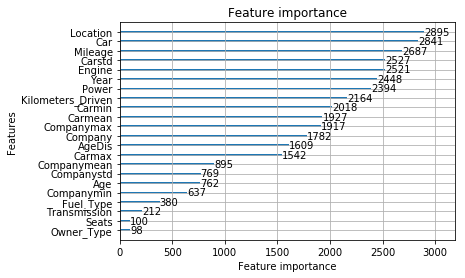

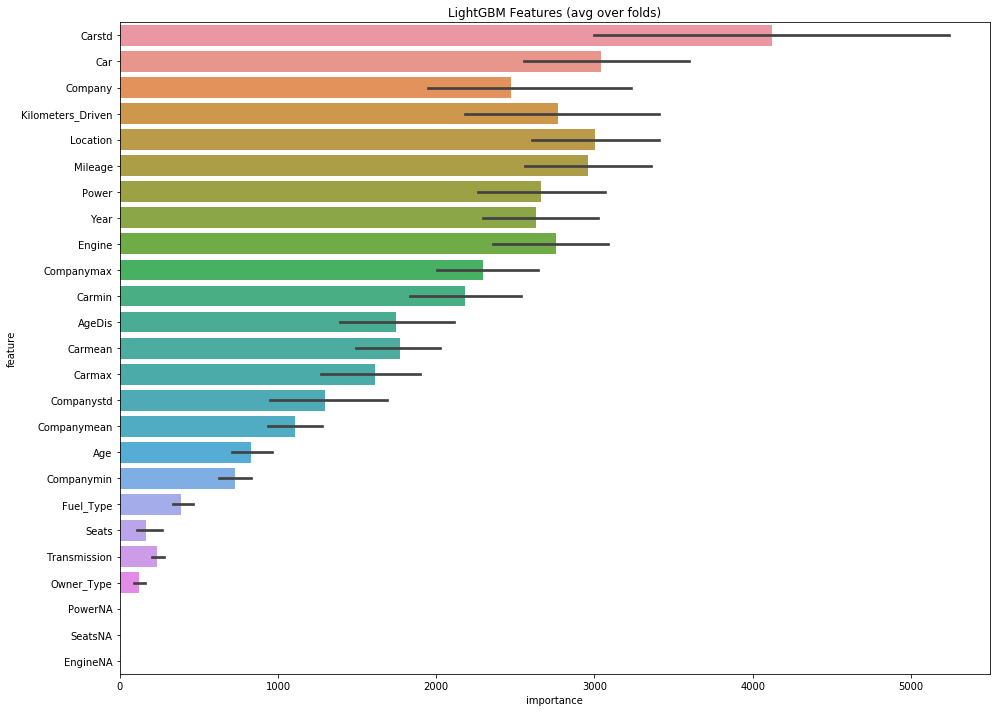

In [244]:
#Fitting the model
from sklearn.model_selection import KFold, StratifiedKFold
FOLDs = KFold(n_splits=5, shuffle=True, random_state=7)

oof_lgb = np.zeros(len(X))
predictions_lgb = np.zeros(len(test))

features_lgb = list(X.columns)
feature_importance_df_lgb = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(FOLDs.split(X, y)):
    trn_data = lgb.Dataset(X.iloc[trn_idx], label=y.iloc[trn_idx])
    val_data = lgb.Dataset(X.iloc[val_idx], label=y.iloc[val_idx])

    print("LGB " + str(fold_) + "-" * 50)
    num_round = 20000
    clf = lgb.train(param1,trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 400)
    oof_lgb[val_idx] = clf.predict(X.iloc[val_idx], num_iteration=clf.best_iteration)
    predictions_lgb += clf.predict(test, num_iteration=clf.best_iteration) / FOLDs.n_splits
    fold_importance_df_lgb = pd.DataFrame()
    fold_importance_df_lgb["feature"] = features_lgb
    fold_importance_df_lgb["importance"] = clf.feature_importance()
    fold_importance_df_lgb["fold"] = fold_ + 1
    feature_importance_df_lgb = pd.concat([feature_importance_df_lgb, fold_importance_df_lgb], axis=0)
    
lgb.plot_importance(clf, max_num_features=30)    
cols = feature_importance_df_lgb[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:50].index
best_features_lgb = feature_importance_df_lgb.loc[feature_importance_df_lgb.feature.isin(cols)]
plt.figure(figsize=(14,10))
sns.barplot(x="importance", y="feature", data=best_features_lgb.sort_values(by="importance", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')


In [245]:
#Saving submission file
lol=pd.DataFrame(predictions_lgb)
lol.to_csv("sub3.csv")